# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Álvaro Rodríguez Gallardo</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

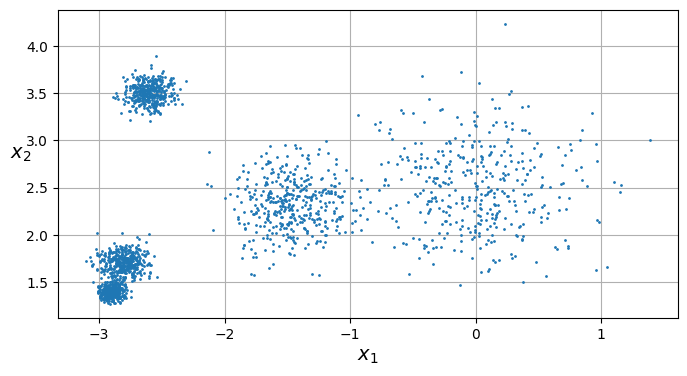

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Los centros de los clusters son:  [[ 0.0783778   2.16451394]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [-0.0207084   2.89114195]
 [-1.44785999  2.31813847]]


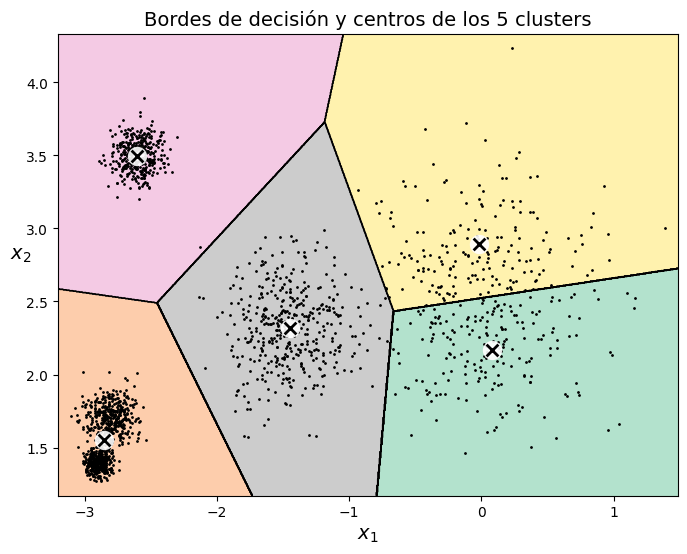

In [ ]:
# Apartado 1
k = 5
kmeans = KMeans(n_clusters=k,n_init=1)
kmeans.fit(X)

print("Los centros de los clusters son: ",kmeans.cluster_centers_)

# Ver los datos y centros de los cluster en cuestión
#plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis',marker='o')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',marker='x')
#plt.title(f'KMeans con {k} clusters')
#plt.show()


#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8,6))
plot_decision_boundaries(kmeans,X)
plt.title(f'Bordes de decisión y centros de los {k} clusters')
plt.show()

En este apartado, la función principal es `KMeans`, usada para entrenar un modela con la mayoría de hiperparámetros por defecto a excepción del número de clúster (se pone a $K=5$) y `n_init`a $1$, indicando solo una ejecución del modelo, quedándose los centroides calculados en este único inicio.
Observando las separaciones generadas, se comienza a pensar que el número de clústeres adecuado podría ser $4$ (se puede observar que las regiones coloreadas en amarillo y verde podrían ser solo una, ya que no se observa algún patrón entre ambas nubes de puntos que las separe claramente, indicando que tuviesen relaciones distintas). Sin embargo, si se mantiene a $5$ el número de clústeres, las dos nubes de puntos que aparecen en la región naranja podrían separarse en dos regiones, uniendo la amarilla y la verde en un mismo clúster.

A continuación, se explican los hiperparámetros posibles de `KMeans`, de la biblioteca `scikit-learn`:

- `n_cluster`: Indica el número de clústeres en los que se va a separar el espacio de puntos. Por defecto, está a $8$.

- `init`: Forma de inicializar los centroides. Puede tomar como valores `k-means++` (selecciona los centroides iniciales de manera que se acelera la convergencia del entrenamiento), `random` (escoge $K=$`n_cluster` puntos del espacio aleatoriamente para ser los centroides iniciales) y un vector para indicar explícitamente los valores iniciales de los centroides.

- `n_init`: Número de veces que se ejecutará el algoritmo con diferentes semillas para los centroides. El que proporcione mejores resultados es el que se usará. Por defecto, está a $10$. Como inciso, es recomendable tener un valor mayor a $1$ para alta dimensionalidad, pero en este caso se usa $1$ por no tener gran dimensión.

- `max_iter`: Por defecto a $300$, es el número de ejecuciones máximas del algoritmo para una sola ejecucióm.

- `tol`: Por defecto a $10^{-4}$, es la tolerancia para la convergencia.

- `precompute_distances`: Determina si se deben precalcular las distancias (más rápido pero consume más memoria). Los posibles valores son `auto` (por defecto, no precalcula las distancias y usa la versión más eficiente según el tamaño de los datos), `True`, para precalcular las distancias y `False` para no precalcular las distancias.

- `verbose`: A mayor valor, mayor número de mensajes se muestra en el proceso. Por defecto, está a $0$.

- `copy_x`: Por defecto a True, si lo es, los datos originales no son modificados. En otro caso, los datos pueden ser modificados, aumentando posiblemente ligeramente la velocidad de convergencia.

- `algorithm`: Algoritmo para hacer KMeans. Puede ser `auto` (valor por defecto, según el tipo de los datos se escoge un algoritmo u otro), `full` (usa el algoritmo clásico de Lloyd) y `elkan` (usa el algoritmo de Elkam, más eficiente para datos con dimensión no muy alta, pero no compatible con métricas distintas a la euclídea).

- `random_state`: Semilla para generar números aleatorios. Por defecto a `None`.

- `n_jobs`: Por defecto a `None`, aunque está obsoleto. Indica el número de hilos para ejecutar en paralelo.

A grandes rasgos, el algoritmo KMeans inicializa los $K$ centroides según como se indique a la clase y se asignan clústeres a todos los puntos según el centroide más cercano que tenga. Estos centroides se recalculan en cada iteración como la media de todos los puntos de clúster hasta que se cumple la condición de parada.

Predicciones duras de clustering:  [0 0 2 1]
Predicciones suaves de clustering:  [[0.18223039 2.88604435 3.00245465 0.89138253 1.48240029]
 [2.92625035 5.86829444 5.79854651 3.14941474 4.45922309]
 [3.18974087 1.45428401 0.63877213 2.98127968 1.69530934]
 [3.09660472 0.95827092 1.07572208 3.00485781 1.56275789]]


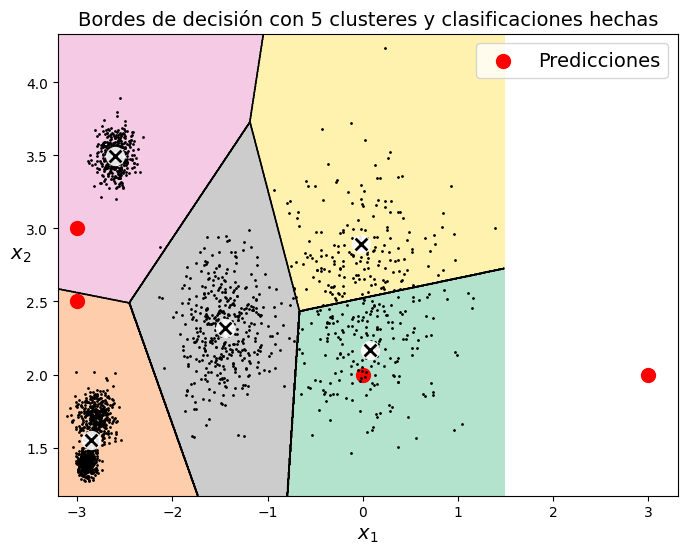

In [ ]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

predicciones_duras = kmeans.predict(X_new)
predicciones_suaves = kmeans.transform(X_new)

print("Predicciones duras de clustering: ",predicciones_duras)
print("Predicciones suaves de clustering: ",predicciones_suaves)

# Vamos a ver dónde han caido las predicciones hechas hasta ahora
plt.figure(figsize=(8,6))
plot_decision_boundaries(kmeans,X)
plt.scatter(X_new[:,0],X_new[:,1],color='red',marker='o',s=100,label='Predicciones')
plt.legend()
plt.title(f'Bordes de decisión con {k} clusteres y clasificaciones hechas')
plt.show()

Tal y como se esperaba, según las características de cada punto, caerá en un clúster u otro en función de la distancia entre su posición y los centroides, siendo clasificado en el clúster del centroide con el que tenga menor distancia. Sin embargo, especial mención merece el punto $(3,2)$, el cual no se asigna a ningún clúster. Esto podría deberse a un error en la visualización. Se podría intuir que el punto clasificaría en el región verde por dos razones: el centroide de dicha región es el más cercano al punto, y se podría intuir por el comportamiento de la frontera entre las regiones verde y amarilla que podría caer en la región verde. Si se comprueban las predicciones, se puede comprobar que todos los puntos que han caido en regiones están clasificados tal y como se indica en la figura, y el punto que no cae en ninguna región es clasificado en la región verde, tanto por su predicción "dura" (el índice correspondiente es el mismo que el del dato que ha clasificado en la región verde) como por su prediccióm "suave" (el menor valor corresponde a la posición del centroide con región verde).

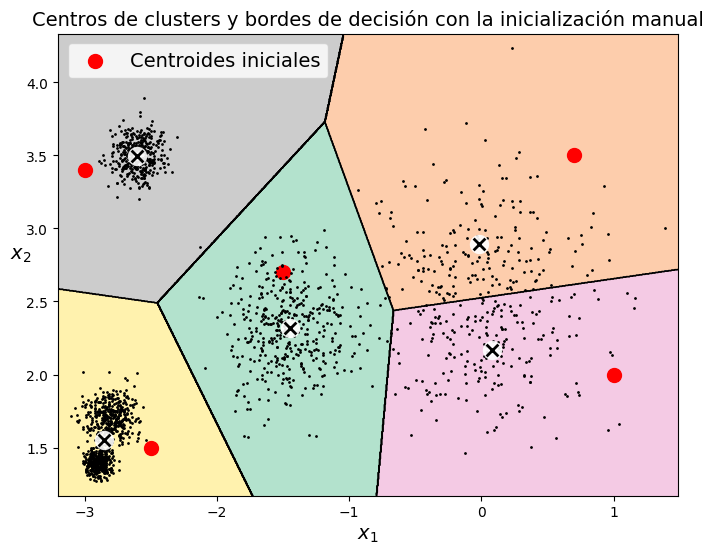

Centros finales de los clusters:  [[-1.44612564  2.31879258]
 [-0.01682889  2.8927971 ]
 [ 0.0783778   2.16451394]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]]


In [ ]:
#Apartado 4
# Elección manual de los centroides, de forma aproximada según las gráficas
good_init = np.array([[-1.5,2.7],[0.7,3.5],[1.0,2.0],[-2.5,1.5],[-3,3.4]])

# Se vuelve a entrenar KMeans con los centroides escogidos
kmeans = KMeans(n_clusters=k,init=good_init,n_init=1)
kmeans.fit(X)

# Visualización de los clústeres con la nueva inicialización
plt.figure(figsize=(8,6))
plot_decision_boundaries(kmeans,X)
plt.scatter(good_init[:,0],good_init[:,1],color='red',marker='o',s=100,label='Centroides iniciales')
plt.legend()
plt.title(f'Centros de clusters y bordes de decisión con la inicialización manual')
plt.show()

# Clusters dados tras el entrenamiento
print("Centros finales de los clusters: ",kmeans.cluster_centers_)



Tras inicializar los centroides de forma manual, se observa que han convergido a posiciones que son distintas, pero han formado las mismas regiones que en el caso anterior. Esto lleva a pensar que, aunque los resultados gráficos sean casi iguales, los centroides iniciales tienden a converger a ser el centroide de la aglomeración más cercana (en este ejemplo, la forma de las regiones son las mismas, pero cada centroide inicial se ha puesto cerca de aglomeraciones distintas de las que se podrían haber puesto en la inicialización aleatoria).

En conclusión, en función de donde se situen los centroides iniciales, el modelo tenderá a converger a una situación en la que las fronteras de decisión son similares, pero las regiones en las que clasifica son distintas pese a que la posición de los centroides es similar.

Dada la hipótesis de que las dos nubes de puntos en la región inferior izquierda se podrían separar en dos clústeres, si inicializan de nuevo los centroides, buscando que el modelo converja según la misma.

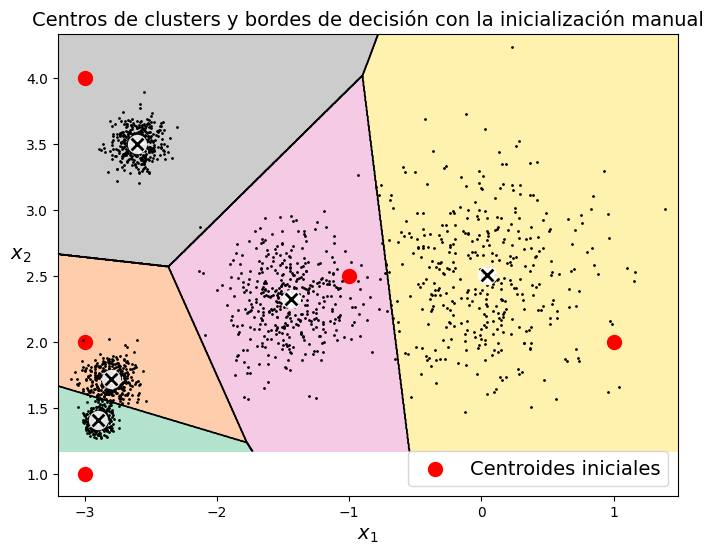

Centros finales de los clusters:  [[-2.89613756  1.40395196]
 [-2.80242208  1.71599211]
 [-1.43985943  2.32299308]
 [ 0.04182943  2.50782834]
 [-2.60140129  3.49914817]]


In [ ]:
#Apartado 4
# Elección manual de los centroides, de forma aproximada según las gráficas
good_init = np.array([[-3,1],[-3,2],[-1,2.5],[1,2],[-3,4]])

# Se vuelve a entrenar KMeans con los centroides escogidos
kmeans = KMeans(n_clusters=k,init=good_init,n_init=1)
kmeans.fit(X)

# Visualización de los clústeres con la nueva inicialización
plt.figure(figsize=(8,6))
plot_decision_boundaries(kmeans,X)
plt.scatter(good_init[:,0],good_init[:,1],color='red',marker='o',s=100,label='Centroides iniciales')
plt.legend()
plt.title(f'Centros de clusters y bordes de decisión con la inicialización manual')
plt.show()

# Clusters dados tras el entrenamiento
print("Centros finales de los clusters: ",kmeans.cluster_centers_)

Gráficamente se puede observar que la hipótesis es cierta. La gráfica anterior parece representar de mejor manera una separación en $5$ clústeres, llevando a pensar que en función de donde se sitúen los centroides iniciales, el algoritmo tenderá a converger a un modelo que represente de mejor o peor manera la relación entre los datos, no siendo el modelo final único independientemente de la inicialización hecha. Esto podría deberse a la forma de recalcular centroides en KMeans, haciendo la media aritmética con los puntos más cercanos, haciendo que cada centroide converja a la nube de puntos (densa) más cercana.

In [ ]:
#Apartado 5
kmeans = KMeans(n_clusters=k,n_init=10)
kmeans.fit(X)

print("Inercia del modelo:", kmeans.inertia_)
print("Score del modelo (inercia negativa):", kmeans.score(X))

Inercia del modelo: 182.413835600808
Score del modelo (inercia negativa): -182.41383560080806


La función `score` devuelve inercia negativa por dos razones: la implementación en `scikit-learn` del algoritmo KMeans busca minimizar la inercia (suma de los cuadrados de las distancias de los puntos al centroide, que es positiva) por ser un indicador de cuán dispersos están los clústeres. En segundo lugar, para mantener la consistencia con el enfoque de maximización de funciones como la validación cruzada.

La intercia también podría pensarse como un indicador de qué tan compactos son los clústeres formados, aunque no es un indicador de qué tan bueno es el modelo, puesto que a mayor número de clústeres, un menor valor de inercia podría implicar sobreajuste. El algoritmo KMeans la usa para escoger, de entre todas las ejecuciones del algoritmo (`n_init`=$10$ en este caso), la mejor de todas (seleccionando el modelo con clústeres más compactos, esto es, menor valor de inercia). Con todo lo explicado, es normal que aproximadamente en valor absoluto ambos valores valgan lo mismo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super().

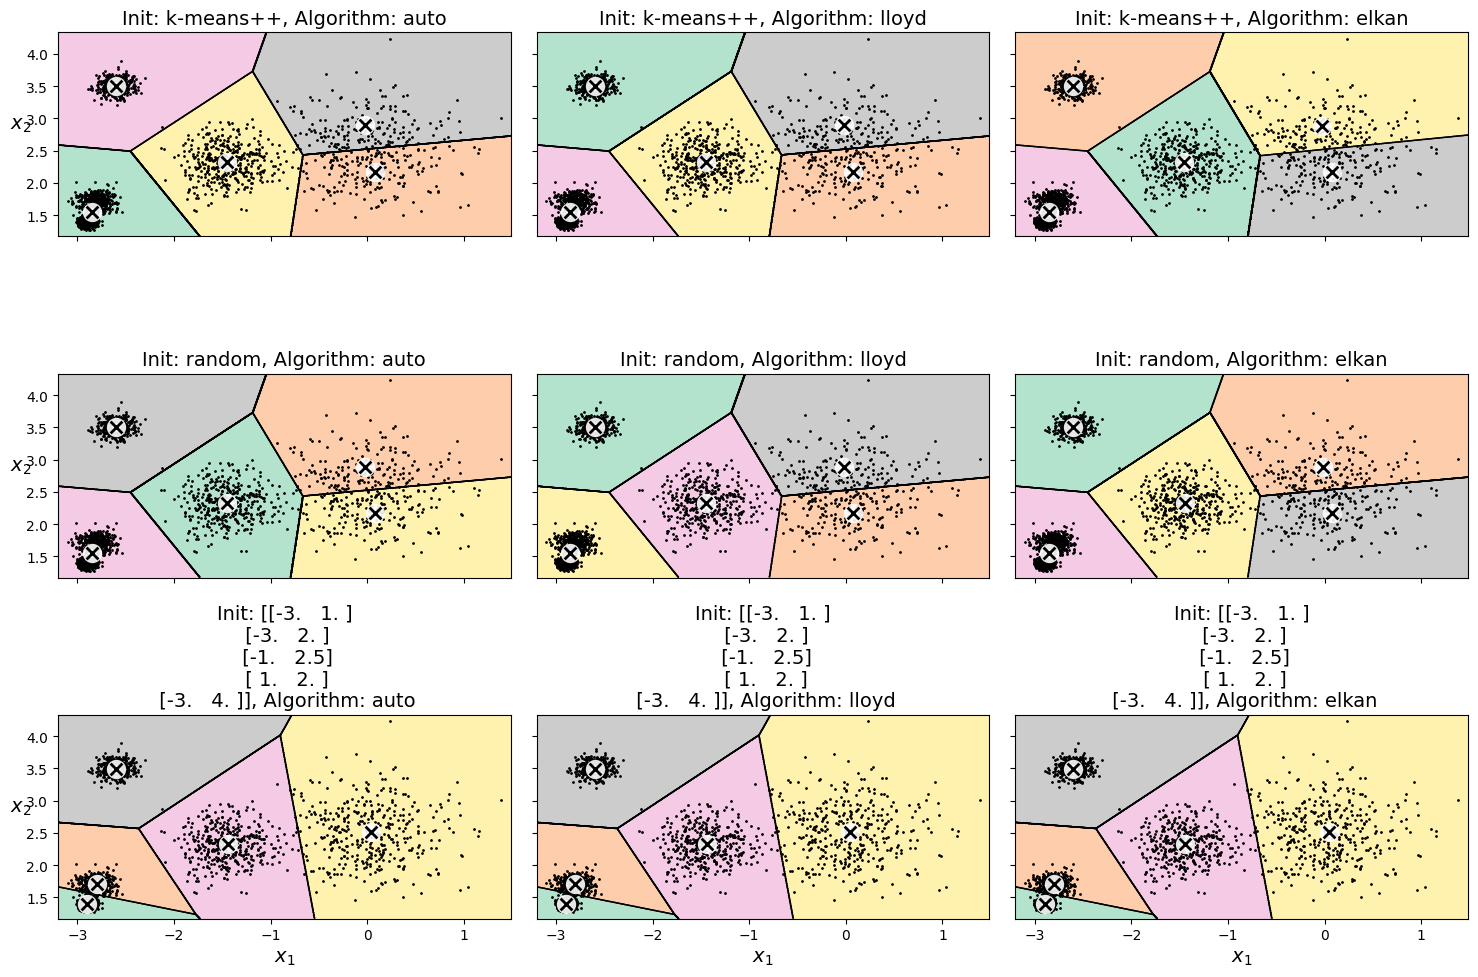

In [ ]:
#Apartado 6
# Formas de inicialización y algoritmos a probar
inits = ['k-means++','random',good_init]
algoritmos = ['auto','lloyd','elkan']
figs,axs = plt.subplots(len(inits),len(algoritmos),figsize=(15,10), sharex=True, sharey=True)

for i,init in enumerate(inits):
  for j, alg in enumerate(algoritmos):
    kmeans = KMeans(n_clusters=k,init=init,n_init=10,algorithm = alg)
    #if isinstance(init,np.darray):
    #  kmeans = KMeans(n_clusters=k,init=init,n_init=1, algorithm=alg)
    kmeans.fit(X)
    plt.sca(axs[i,j])
    plot_decision_boundaries(kmeans,X,show_centroids=True,show_xlabels=(i == 2), show_ylabels=(j == 0))
    axs[i,j].set_title(f'Init: {init}, Algorithm: {alg}')

plt.tight_layout()
plt.show()

Se han probado con todos los posibles hiperparátros para `init` y `algorithm`, dejando `n_init` a su valor por defecto que es $10$.

A grandes rasgos, la posición de los centroides finales y la forma de las fronteras de decisión son prácticamente idénticas, variando las regiones, a diferencia de la inicialización manual, que ha convergido a otra situación. Esto lleva a pensar que aunque KMeans pueda ser un algoritmo consistente, es sensible a la inicialización que se haga y, como en un problema real no siempre es posible tener una representación de las nubes de puntos, el modelo obtenido no necesariamente es el mejor.

Se desglosa cada caso:

- `init=k-means++`: Aplica el algoritmo mencionado para seleccionar centroides iniciales de tal manera que se busca la convergencia más rápida posible, además de que en la selección de nuevos centroides pueden elegirse puntos más alejados de lo que se haría en un algoritmo KMeans normal.

- `init=random`: Dado a que la inicialización de los centroides ha sido aleatoria, no podría conocerse si el algoritmo especificado ha tenido mucha relevancia más allá de la velocidad de convergencia y eficiencia. Arroja las mismas fronteras de decisión que la inicialización `k-means++`.

- `init=good_init`: Se ha usado como inicialización manual la misma que la usada anteriormente para poder comparar mejor los resultados. En general, las fronteras de decisión y regiones son las mismas independientemente del valor de `algorithm`. Esto podría deberse a que la forma de inicializar los centroides ha hecho que el algoritmo usado en `algorithm` solo sea determinante para la eficiencia y velocidad de convergencia, no para el resultado final.

Con respecto a los algoritmos usados para la optimización de los centroides y asignación de puntos a los clústeres en cada iteración:

- `algorithm=auto`: Escoge entre `full` o `elkan` en función de los datos.

- `full`: Desarrollado por Lloyd, es un método versátil compatible con cualquier métrica, por lo que si los datos son muy dispersos puede dar buenos resultados, aunque para datos grandes puede ser más lento.

- `elkan`: Desarrollado por Elkan, es una variación del algoritmo de Lloyd. Es más eficiente para datos densos y distancia euclídeas. Usa la desigualdad triangular para reducir cálculos de forma limitada a distancias euclídeas y datos no dispersos.

Como comentario a los resultados anteriores, se puede observar que la manera en que se inicializan los centroides es determinante en el modelo obtenido, siendo la probabilidad de que converja a un modelo parecido al dado por la inicialización aleatoria mayor a que converja a un modelo parecido al de la inicialización manual. No parece ser que el hiperparáemtro `algorithm` haya podido afectar en gran medida al modelo final, dado que aunque las fronteras de decisión tienen la misma geometría, los clústeres están distribuidos de distinta manera, sobre todo teniendo en cuenta la inicialización `k-means++`, pues la inicialización `random` puede deber su situación a una inicialización aleatoria.

Para 2 clusters el Silhouette score es de 0.525293361639191
Para 3 clusters el Silhouette score es de 0.704162914507071
Para 4 clusters el Silhouette score es de 0.7502950206907029
Para 5 clusters el Silhouette score es de 0.717314760221725
Para 6 clusters el Silhouette score es de 0.7146692783280846
Para 7 clusters el Silhouette score es de 0.6139361948582216
Para 8 clusters el Silhouette score es de 0.5509387147212677
Para 9 clusters el Silhouette score es de 0.5551776074811041
Para 10 clusters el Silhouette score es de 0.5517462459316105
Para 11 clusters el Silhouette score es de 0.5483506725417748
Para 12 clusters el Silhouette score es de 0.5535395400305012
Para 13 clusters el Silhouette score es de 0.5507878569043446
Para 14 clusters el Silhouette score es de 0.5498107080619437
Para 15 clusters el Silhouette score es de 0.5521005430897703


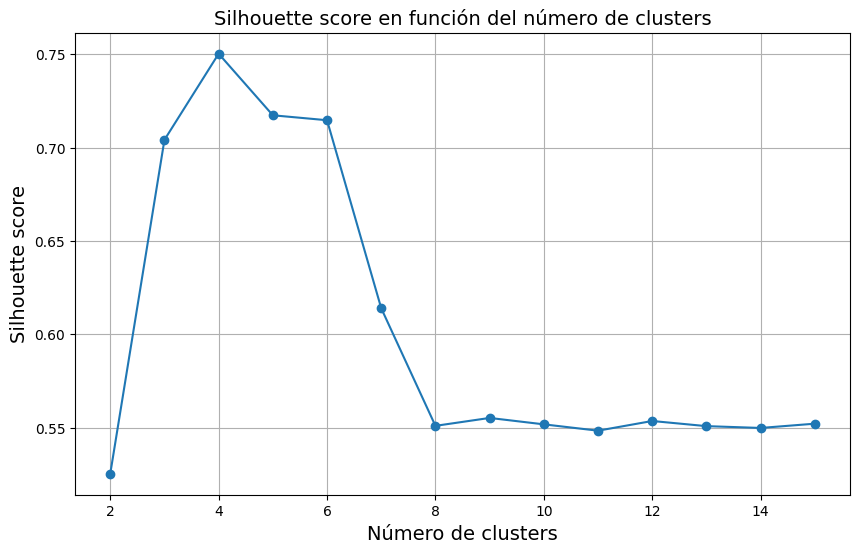

In [ ]:
#Apartado 7
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Almacenamiento de cada resultado
silhouette_scores = []

# Cálculo de cada score
for n_clust in n_clusters:
  kmeans = KMeans(n_clusters=n_clust,n_init=10)
  etiquetas = kmeans.fit_predict(X)
  silh_media = silhouette_score(X,etiquetas)
  silhouette_scores.append(silh_media)

  print(f'Para {n_clust} clusters el Silhouette score es de {silh_media}')

# Mostrar las gráficas de cada caso
plt.figure(figsize=(10,6))
plt.plot(n_clusters,silhouette_scores,marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score en función del número de clusters')
plt.grid(True)
plt.show()

El Silhouette Score es una métrica usada para evaluar la calidad de los clústeres, bastante útil cuando se quiere encontrar el número óptimo de clústeres para un dataset. Mide qué tan bien están agrupados los puntos en un clúster y qué tan separados están estos clústeres entre si, siendo un valor en el intervalo $[-1,1]$, donde $1$ implica que los clústeres están bien separados y los datos bien agrupados, $0$ significa que los clústeres se solapan y $-1$ indica que los clústeres están asignados de forma incorrecta.

La forma de calcular esta métrica es la siguiente: se obtienen dos medidas en cada caso, $a$ la distancia media entre una muestra y todas las muestras del mismo clúster, y $b$, la distancia media entre una muestra y todas las muestras del clúster más cercano distinto al que se encuentra la muestra. Se aplica la fórmula

$$\frac{b-a}{\max(a,b)}$$

Los resultados arrojados en este caso indican que la métrica toma mayor valor para $4$ clústeres, por lo que esta configuración podría ser la más adecuada para el dataset. Al usarse $5$ clústeres, se obtiene un Silhouette Score algo más bajo, pero siendo el segundo de mayor valor, por lo que pese a no ser el mejor, el modelo obtenido seguiría siendo bueno. A continuación se muestra la situación usando solo $4$ clústeres, dejando el resto de hiperparámetros por defecto.

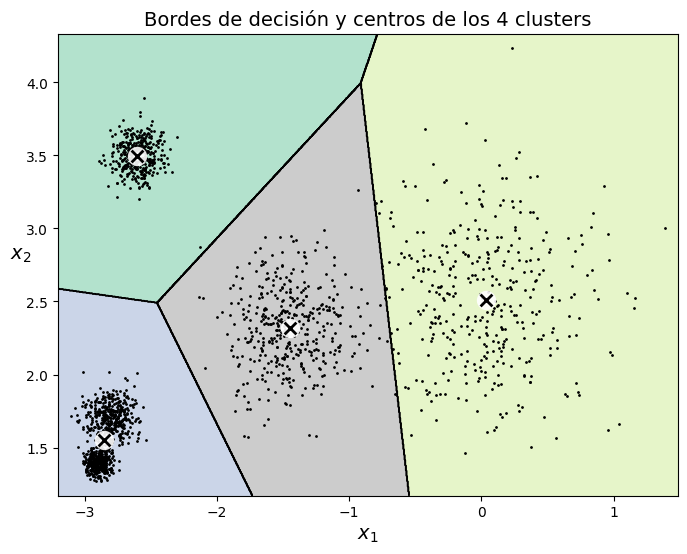

Inercia del modelo: 233.25346583975107
Score del modelo (inercia negativa): -233.25346583975113


In [ ]:
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(X)

plt.figure(figsize=(8,6))
plot_decision_boundaries(kmeans,X)
plt.title(f'Bordes de decisión y centros de los 4 clusters')
plt.show()
print("Inercia del modelo:", kmeans.inertia_)
print("Score del modelo (inercia negativa):", kmeans.score(X))

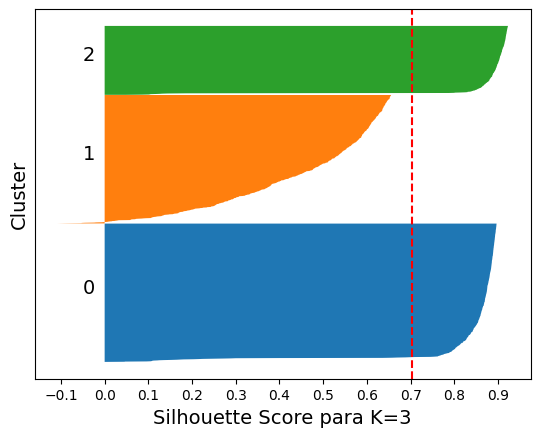

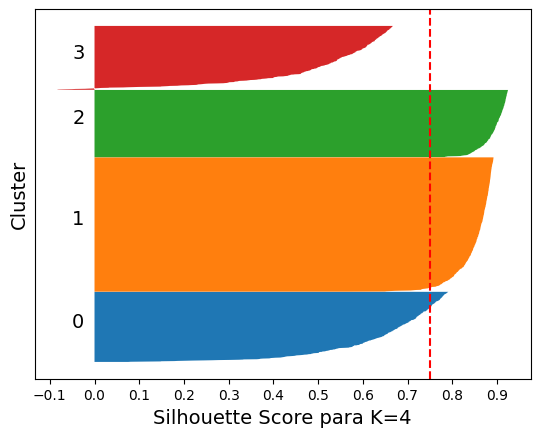

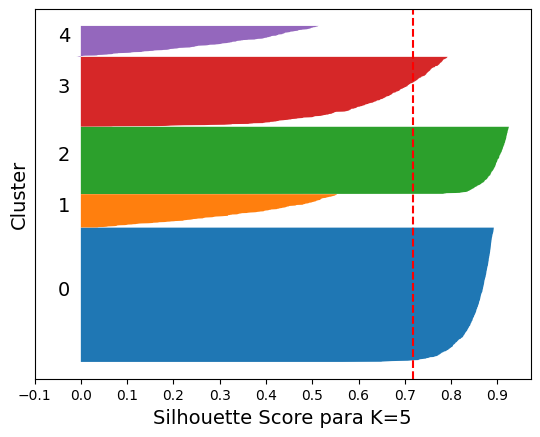

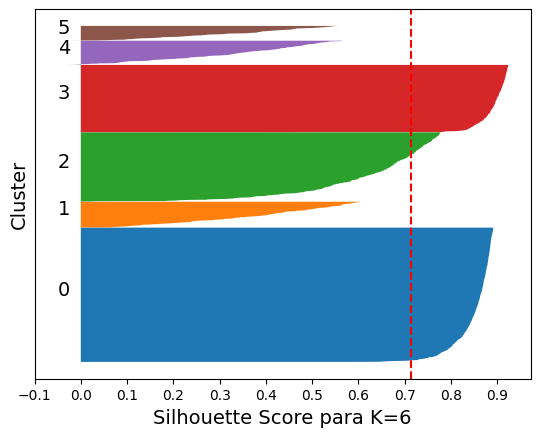

In [ ]:
#Apartado 8

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
#from matplotlib import cm

ks = [3, 4, 5, 6]

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=10)
    y_pred = kmeans.fit_predict(X)
    silhouette_valores = silhouette_samples(X, y_pred)

    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(y_pred)):
        cluster_silhouette_valores = silhouette_valores[y_pred == cluster]
        cluster_silhouette_valores.sort()
        y_upper += len(cluster_silhouette_valores)

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_valores)
        plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_valores), str(i))
        y_lower += len(cluster_silhouette_valores)

    plt.axvline(np.mean(silhouette_valores), color="red", linestyle="--")
    plt.yticks([])
    plt.xticks(np.arange(-0.1, 1, 0.1))
    plt.ylabel("Cluster")
    plt.xlabel(f'Silhouette Score para K={k}')
    plt.show()

A continuación se explica el código para resolver el apartado:

1- Se importan las funciones necesarias desde $\textit{sklearn}$ y $\textit{matplotlib}$.

2- Se itera sobre una lista de posibles valores para $K$.

3- Apoyado en `silhouette_samples`, se obtiene un valor de Silhouette Score para cada muestra, midiendo qué tan bien cada punto ha sido clasificado en su correspondiente clúster.

4- Se dibuja el diagrama. El relleno de cada figura genera un "cuchillo", mostrando la distribución de los valores de Silhouette Score para las muestras dentro del clúster. Además, se marca con una discontinua roja vertical el valor medio de todos los valores, dando una referencia rápida para evaluar la cohesión y separación de los clústeres.

La interpretación de los distintos elementos es la siguiente:

- Ancho de cada figura: Una figura más ancha implica mayor Silhouette Score, indicando que las muestras en ese clúster están mejor agrupadas y más lejos del resto de clústeres.

- Altura de cada figura: Representa el número de muestras en el clúster, dando una idea del tamaño de la distribución.

- Línea roja: Da el valor medio de los Silhouette Score. Si la línea se acerca a $1$, hay una buena separación y cohesión en general. Si está más cerca de $0$ o es negativa, podría ocurrir que la asignación sea más pobre.

Para cada $K$ se tiene lo siguiente:

- $K=3$: El valor medio se encuentra más cerca de $1$, siendo un buen indicativo. La cantidad de muestras es mayor en clústeres, aunque uno de ellos tiene ligeramente mejor Silhouette Score.

- $K=4$: El valor medio se encuentra aún más cerca de $1$. Además, la distribución de las muestras entre clústeres está más balanceada en general (un clúster tiene mayor cantidad de muestras). A excepción de un clúster, el resto tiene mayor Silhouette Score que la media, que como ya era buena, esto es buen indicativo en cuanto a la cohesión y separación de clústeres.

- $K=5$: El valor medio ha descendido levemente respecto al caso $K=4$. Además, la distribución de muestras entre clústeres no parece estar muy balanceada, agrupando gran parte de las muestras en un único clúster. Aunque los valores parecen ser buenos, son algo peores que el caso $K=4$.

- $K=6$: El valor medio es el mismo que el caso anterior, aunque la distribución de muestras es bastante más desbalanceada que el caso anterior. Gran cantidad de muestras se agrupan en un único clúster, que tampoco es el que mejor Silhouette Score presenta.

En general, los resultados son acordes a los expuestos en el apartado 7. El que mejor Silhouette Score medio tiene es del de $4$ clústeres, y aunque el valor medios de los de $5$ y $6$ clústeres es aparentemente el mismo, tiene mayor valor que el de $3$ clústeres. Nótese además que los Silhouette Scores medios en la gráfica coincide con los valores del eje Y en el apartado anterior.

In [ ]:
#Apartado 9

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Obtenemos primero los datos
X = olivetti.data
y = olivetti.target

# Divisiones entre entrenamiento y test con StratifiedShuffleSplit
stratShuSp = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
train_id, test_id = next(stratShuSp.split(X,y))
X_train,X_test = X[train_id], X[test_id]
y_train,y_test = y[train_id], y[test_id]

print(pd.DataFrame(X).describe())
print(pd.DataFrame(y).describe())

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
             0           1           2           3           4           5     \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     0.400134    0.434236    0.476281    0.518481    0.554845    0.588729   
std      0.180695    0.189504    0.194742    0.193313    0.188593    0.178481   
min      0.086777    0.066116    0.090909    0.041322    0.107438    0.107438   
25%      0.243802    0.267562    0.314050    0.383264    0.446281    0.515496   
50%      0.392562    0.458678    0.512397    0.545455    0.584711    0.615702   
75%      0.528926    0.575413    0.636364    0.666322    0.702479    0.714876   
max      0.805785    0.822314    0.871901    0.892562    0.871901    0.871901   

             6           7           8           9     ...        4086  \
count  400.000000  400.000000  400.000000  400.000000  ...  400.000000   
mean     0.62142

Debido a la baja cantidad de muestras existentes, no se aplicará ningún algoritmo de disminución de la dimensionalidad, pues se intuye que el algoritmo no tardará demasiado tiempo en entrenar.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 20 clusters el Silhouette score es de 0.11474625021219254


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 21 clusters el Silhouette score es de 0.1033327579498291


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 22 clusters el Silhouette score es de 0.1096070259809494


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 23 clusters el Silhouette score es de 0.11950645595788956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 24 clusters el Silhouette score es de 0.11391685903072357


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 25 clusters el Silhouette score es de 0.11663665622472763


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 26 clusters el Silhouette score es de 0.11740420013666153


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 27 clusters el Silhouette score es de 0.11015961319208145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 28 clusters el Silhouette score es de 0.12174532562494278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 29 clusters el Silhouette score es de 0.134718656539917


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 30 clusters el Silhouette score es de 0.12728692591190338


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 31 clusters el Silhouette score es de 0.12973573803901672


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 32 clusters el Silhouette score es de 0.1307930201292038


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 33 clusters el Silhouette score es de 0.13469336926937103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 34 clusters el Silhouette score es de 0.13203081488609314


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 35 clusters el Silhouette score es de 0.13415293395519257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 36 clusters el Silhouette score es de 0.13415393233299255


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 37 clusters el Silhouette score es de 0.14132025837898254


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 38 clusters el Silhouette score es de 0.14077326655387878


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 39 clusters el Silhouette score es de 0.13751506805419922


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 40 clusters el Silhouette score es de 0.14348401129245758


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 41 clusters el Silhouette score es de 0.14805689454078674


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 42 clusters el Silhouette score es de 0.14979179203510284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 43 clusters el Silhouette score es de 0.14745748043060303


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 44 clusters el Silhouette score es de 0.1513044834136963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 45 clusters el Silhouette score es de 0.15396125614643097


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 46 clusters el Silhouette score es de 0.14877599477767944


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 47 clusters el Silhouette score es de 0.14448216557502747


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 48 clusters el Silhouette score es de 0.15697936713695526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 49 clusters el Silhouette score es de 0.15579694509506226


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 50 clusters el Silhouette score es de 0.16222961246967316


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 51 clusters el Silhouette score es de 0.16185441613197327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 52 clusters el Silhouette score es de 0.16109657287597656


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 53 clusters el Silhouette score es de 0.1631532609462738


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 54 clusters el Silhouette score es de 0.16702193021774292


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 55 clusters el Silhouette score es de 0.16479766368865967


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 56 clusters el Silhouette score es de 0.16914984583854675


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 57 clusters el Silhouette score es de 0.179326593875885


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 58 clusters el Silhouette score es de 0.16735613346099854


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 59 clusters el Silhouette score es de 0.17497798800468445


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 60 clusters el Silhouette score es de 0.17861680686473846


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 61 clusters el Silhouette score es de 0.17368720471858978


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 62 clusters el Silhouette score es de 0.17074543237686157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 63 clusters el Silhouette score es de 0.18017563223838806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 64 clusters el Silhouette score es de 0.1792120337486267


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 65 clusters el Silhouette score es de 0.18324020504951477


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 66 clusters el Silhouette score es de 0.18299201130867004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 67 clusters el Silhouette score es de 0.18155746161937714


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 68 clusters el Silhouette score es de 0.18219885230064392


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 69 clusters el Silhouette score es de 0.1728740930557251


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 70 clusters el Silhouette score es de 0.18883001804351807


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 71 clusters el Silhouette score es de 0.17897698283195496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 72 clusters el Silhouette score es de 0.19347414374351501


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 73 clusters el Silhouette score es de 0.17504462599754333


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 74 clusters el Silhouette score es de 0.18242505192756653


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 75 clusters el Silhouette score es de 0.1795085072517395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 76 clusters el Silhouette score es de 0.19027724862098694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 77 clusters el Silhouette score es de 0.183445006608963


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 78 clusters el Silhouette score es de 0.18646779656410217


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 79 clusters el Silhouette score es de 0.18585118651390076


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 80 clusters el Silhouette score es de 0.17854897677898407


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 81 clusters el Silhouette score es de 0.18065105378627777


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 82 clusters el Silhouette score es de 0.18962883949279785


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 83 clusters el Silhouette score es de 0.19982478022575378


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 84 clusters el Silhouette score es de 0.18945172429084778


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 85 clusters el Silhouette score es de 0.19477838277816772


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 86 clusters el Silhouette score es de 0.193196639418602


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 87 clusters el Silhouette score es de 0.1905670166015625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 88 clusters el Silhouette score es de 0.18232223391532898


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 89 clusters el Silhouette score es de 0.20628122985363007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 90 clusters el Silhouette score es de 0.18728062510490417


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 91 clusters el Silhouette score es de 0.19569745659828186


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 92 clusters el Silhouette score es de 0.19581949710845947


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 93 clusters el Silhouette score es de 0.19316230714321136


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 94 clusters el Silhouette score es de 0.19591635465621948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 95 clusters el Silhouette score es de 0.19526070356369019


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 96 clusters el Silhouette score es de 0.19273939728736877


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 97 clusters el Silhouette score es de 0.1955333948135376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 98 clusters el Silhouette score es de 0.19154638051986694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para 99 clusters el Silhouette score es de 0.19433988630771637


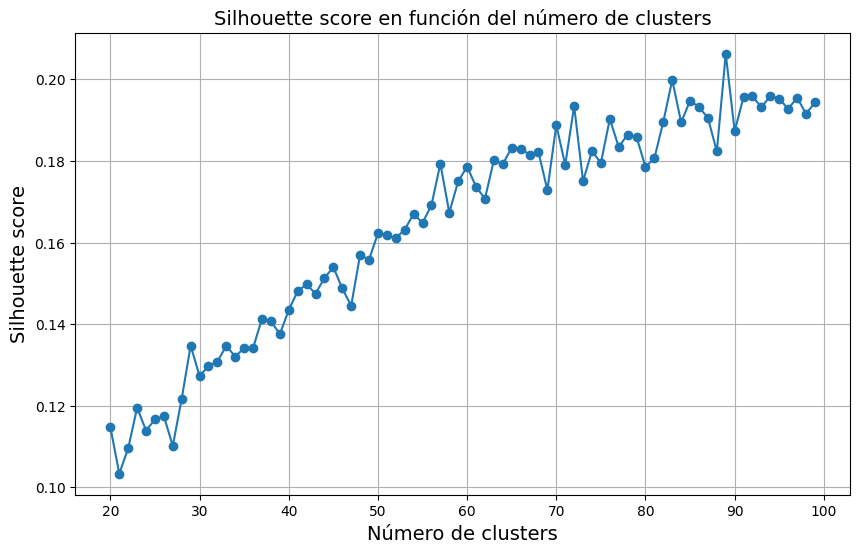

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Se empieza sabiendo que hay 40 personas registradas
n_clusters = [i for i in range(20,100)]

silhouette_scores = []

for n_clust in n_clusters:
    kmeans = KMeans(n_clusters=n_clust, random_state=42)
    etiquetas = kmeans.fit_predict(X_train)

    silh_score = silhouette_score(X_train, etiquetas)
    silhouette_scores.append(silh_score)

    print(f'Para {n_clust} clusters el Silhouette score es de {silh_score}')

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score en función del número de clusters')
plt.grid(True)
plt.show()

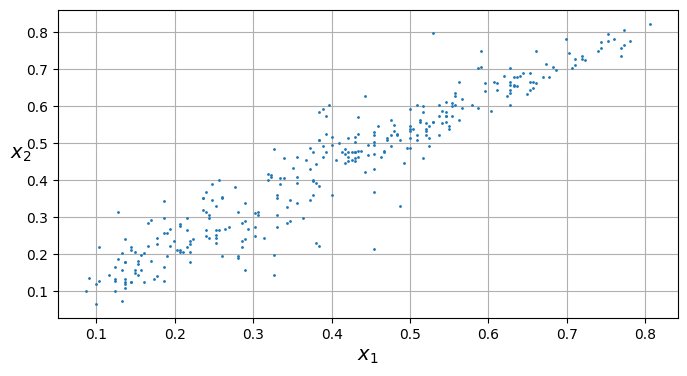

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X_train)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

Para valores como $1$ clúster, se ha arrojado un error asociado a que el número de clústeres no es bueno para los datos con los que se entrena. Por ello, se empeza calculando el Silhouette Score para $20$ clústeres, hasta $100$ clústeres, dado que hay $400$ muestras en total (en el dataset, aunque se entrena con una partición) y se registran los datos de $40$ personas.

Observando la gráfica de Silhouette Score medio, se comprueva que en general los valores medios no son muy buenos, por lo que para el conjunto de datos sobre el que trabaja tal vez no se pueda obtener una buena separación y coherencia en los clústeres. Sin embargo, el máximo (dígase relativo, pues no es seguro que no haya un punto que mejore el valor, aunque parezca que se va a quedar oscilando) es para $K=82$ aproximadamente. Por lo tanto, se continuará para dicho $K$, aunque la eficiencia puede ser menor que en modelos como los entrenados con los datos sintéticos de los apartados anteriores.


Dado a que algunos valores parecen salirse mucho del patrón que siguen los puntos (una aglomeración creciente con pendiente positiva constante), se intentan detectar valores perdidos y tratar los posibles outliers sustituyendo con la mediana pues en el análisis exploratorio se comprobó que eran variables numéricas.

In [ ]:
print("Valores perdidos en total en X_train:")
print(pd.DataFrame(X_train)[1].isnull().sum())
print("Valores perdidos en total en X_test:")
print(pd.DataFrame(X_test)[1].isnull().sum())

Valores perdidos en total en X_train:
0
Valores perdidos en total en X_test:
0


In [ ]:
print("Cantidad de outliers en X_train")
Q1 = pd.DataFrame(X_train).quantile(0.25)
Q3 = pd.DataFrame(X_train).quantile(0.75)
IQR = Q3 - Q1

outliers = (pd.DataFrame(X_train) < (Q1 - 1.5 * IQR)) | (pd.DataFrame(X_train) > (Q3 + 1.5 * IQR))
print(outliers.sum(axis=0))
outliers

Cantidad de outliers en X_train
0       0
1       0
2       0
3       0
4       7
       ..
4091    1
4092    1
4093    2
4094    6
4095    9
Length: 4096, dtype: int64


0      1      2      3      4      5      6      7      8      9     \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
315  False  False  False  False  False  False  False  False  False  False   
316  False  False  False  False  False  False  False  False  False  False   
317  False  False  False  False  False  False  False  False  False  False   
318  False  False  False  False  False  False  False  False  False  False   
319  False  False  False  False  False  False  False  False  False  False   

     ...   4086   4087   4088   4089   4090   4091   4092   4093   4094   4095  
0    ...  False  False  False  False  False  False  False  False  False  False  
1    ...  False  False  False  False  False  False  False  False  False  False  
2    ...  False  False  False  False  False  False  False  False  False  False  
3    ...  False  False  False  False  False  False  False  False  False  False  
4    ...  False  False  False  False  False  False  False  False  False  False  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
315  ...  False  False  False  False  False  False  False  False  False  False  
316  ...  False  False  False  False  False  False  False  False  False  False  
317  ...  False  False  False  False  False  False  False  False  False  False  
318  ...  False  False  False  False  False  False  False  False  False  False  
319  ...  False  False  False  False  False  False  False  False  False  False  

[320 rows x 4096 columns]

In [ ]:
# Sustituir outliers por la mediana de cada columna
X_train_pd = pd.DataFrame(X_train)
medians = X_train_pd.median()
for column in X_train_pd.columns:
    X_train_pd[column].where(~outliers[column], medians[column], inplace=True)

In [ ]:
print("Cantidad de outliers en X_test")
Q1 = pd.DataFrame(X_test).quantile(0.25)
Q3 = pd.DataFrame(X_test).quantile(0.75)
IQR = Q3 - Q1

outliers = (pd.DataFrame(X_test) < (Q1 - 1.5 * IQR)) | (pd.DataFrame(X_test) > (Q3 + 1.5 * IQR))
print(outliers.sum(axis=0))
outliers

Cantidad de outliers en X_test
0       0
1       0
2       0
3       0
4       0
       ..
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64


0      1      2      3      4      5      6      7      8      9     ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False   True   True   True  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
75  False  False  False  False  False  False  False  False  False  False  ...   
76  False  False  False  False  False  False   True   True   True   True  ...   
77  False  False  False  False  False  False  False  False  False  False  ...   
78  False  False  False  False  False  False  False  False  False  False  ...   
79  False  False  False  False  False  False  False   True   True  False  ...   

     4086   4087   4088   4089   4090   4091   4092   4093   4094   4095  
0   False  False  False  False  False  False  False  False  False  False  
1   False  False  False  False  False  False  False  False  False  False  
2   False  False  False  False  False  False  False  False  False  False  
3   False  False  False  False  False  False  False  False  False  False  
4   False  False  False  False  False  False  False  False  False  False  
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
75  False  False  False  False  False  False  False  False  False  False  
76  False  False  False  False  False  False  False  False  False  False  
77  False  False  False  False  False  False  False  False  False  False  
78  False  False  False  False  False  False  False  False  False  False  
79  False  False  False  False  False  False  False  False  False  False  

[80 rows x 4096 columns]

In [ ]:
# Sustituir outliers por la mediana de cada columna
X_test_pd = pd.DataFrame(X_test)
medians = X_test_pd.median()
for column in X_test_pd.columns:
    X_test_pd[column].where(~outliers[column], medians[column], inplace=True)

Se escogen varias configuraciones con las que entrenar el modelo y poder seleccionar el mejor de ellos. No se inicializan manualmente los centroides debido a que la nube de puntos no da de forma intuitiva una separación clara entre distintas regiones, por lo que se deja la inicialización preferentemente como aleatoria o la que pueda converger más rápido según `k-means++`. Además, dado a que la cantidad de altos es significativamente más alta que en los casos anteriores, y el número de características es alto, se pondrá como número de ejecuciones del algoritmo por entrenamiento a $10$ para posteriormente escoger el mejor caso de las $10$.

Se procede a calcular la gráfica de los Silhouette Score para cada configuración de KMeans, haciendo variar también el número de clústeres, buscando encontrar al mejor modelo.

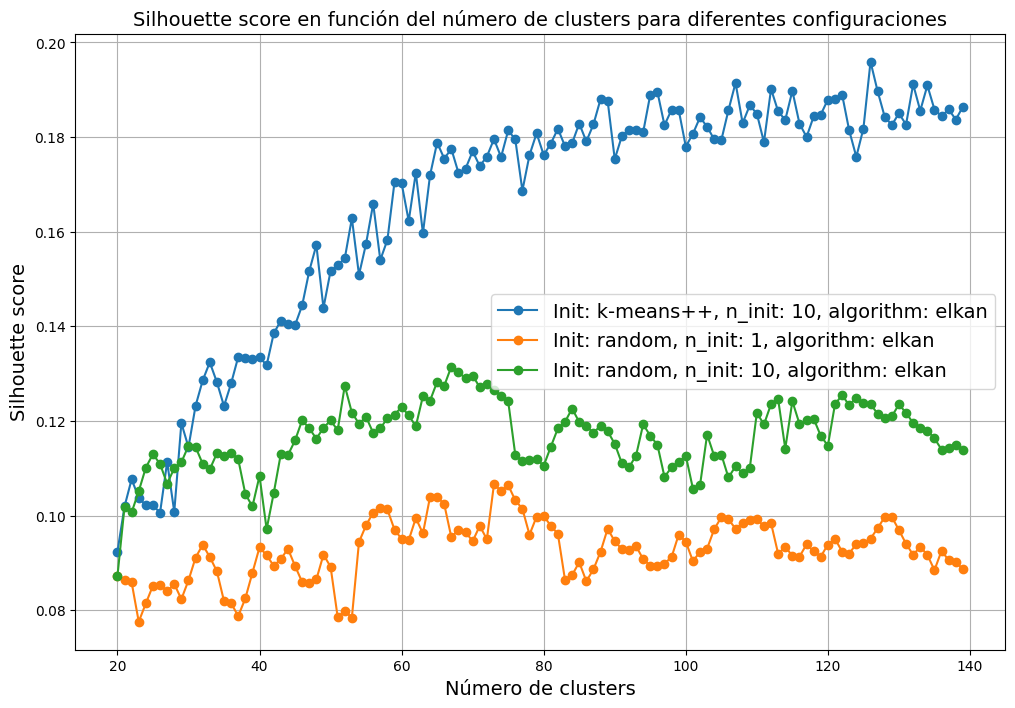

In [ ]:
configs = [
    ("k-means++", 10, "elkan"),
    ("random", 1, "elkan"),
    ("random", 10, "elkan")
]

n_clusters = range(20, 140)
silhouette_scores = {config: [] for config in configs}

for config in configs:
    init, n_init, algorithm = config
    for n_clust in n_clusters:
        kmeans = KMeans(n_clusters=n_clust, init=init, n_init=n_init, algorithm=algorithm, random_state=42)
        etiquetas = kmeans.fit_predict(X_train)

        silh_score = silhouette_score(X_train, etiquetas)
        silhouette_scores[config].append(silh_score)

       # print(f'Config {config}, para {n_clust} clusters: Silhouette score es de {silh_score}')

# Creación de la figura y graficación de los resultados
plt.figure(figsize=(12, 8))
for config in configs:
    plt.plot(n_clusters, silhouette_scores[config], marker='o', label=f'Init: {config[0]}, n_init: {config[1]}, algorithm: {config[2]}')

plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score en función del número de clusters para diferentes configuraciones')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Tras las separaciones oportunas, se configura y entrena KMeans para el mejor clúster por configuración
n_clusters = [120,65,75]

# Configuraciones de KMeans
configs = [
    ("k-means++", 10, "elkan"),
    ("random", 1, "elkan"),
    ("random", 10, "elkan")
]

# Diccionario para almacenar los modelos
modelos = {}

# Bucle que itera sobre las configuraciones y sus respectivos números de clústeres
for (init, n_init, alg), n_clust in zip(configs, n_clusters):
    kmeans = KMeans(n_clusters=n_clust, init=init, n_init=n_init, algorithm=alg, random_state=42)
    kmeans.fit(X_train_pd)
    modelos[(init, n_init, alg)] = kmeans
    score = silhouette_score(X_train_pd, kmeans.labels_)
    print(f'init={init}, n_init={n_init}, algorithm={alg}, n_clusters={n_clust} --> Silhouette score: {score}')

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()




# Tras el entrenamiento, se escoge mejor modelo según una función lambda que obtiene el modelo
# con mayor Silhouette Score
best_model = max(modelos.items(),key=lambda item: silhouette_score(X_train,item[1].labels_))

init=k-means++, n_init=10, algorithm=elkan, n_clusters=120 --> Silhouette score: 0.18794265389442444
init=random, n_init=1, algorithm=elkan, n_clusters=65 --> Silhouette score: 0.10396313667297363
init=random, n_init=10, algorithm=elkan, n_clusters=75 --> Silhouette score: 0.12415413558483124


Dadas las tres configuraciones dadas en el enunciado, se escogería la de `init=k-means++`, `n_init=10` y `algorithm=elkan`, pues da un Silhouette Score algo mejor que el resto de configuraciones, dando a entender que, aunque los valores son bajos, para $120$ clústeres es aquel que implica una mayor cohesión (qué tan cercanos están los puntos en el mismo clúster) y mayor separación (qué tan diferentes son los clústeres entre si).

Se comprobará si el mejor modelo seleccionado por el alumno coincide con el mejor modelo según la librería, habiendo tomado como referencia el Silhouette Score.

In [ ]:
print(best_model)

(('k-means++', 10, 'elkan'), KMeans(algorithm='elkan', n_clusters=120, n_init=10, random_state=42))


In [ ]:
kmeans = KMeans(n_clusters=120,init="k-means++",n_init=10,algorithm="elkan")
kmeans.fit(X_train_pd)

KMeans(algorithm='elkan', n_clusters=120, n_init=10)

Finalmente, se escogen $25$ caras del conjunto de entrenamiento, además de las etiquetas dadas por el mejor modelo. Se pintan las caras con las etiquetas y se muestran los clústeres.

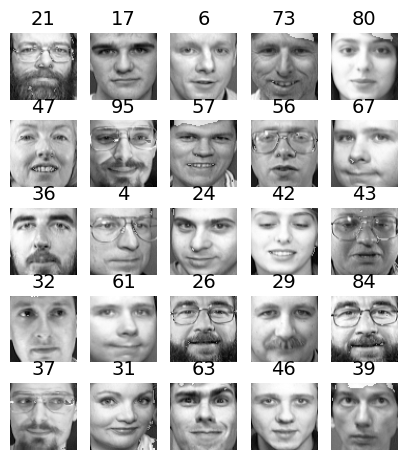

Los centros de los clusters son:  [[0.38567492 0.45867768 0.5798898  ... 0.14049587 0.16253443 0.17768595]
 [0.21570249 0.21157025 0.2586777  ... 0.33636364 0.3181818  0.30165288]
 [0.2964876  0.3429752  0.35847107 ... 0.24690083 0.30061984 0.35640496]
 ...
 [0.6363636  0.6528926  0.6694215  ... 0.26859504 0.24380165 0.17768595]
 [0.3553719  0.25206614 0.24173555 ... 0.18801653 0.18595041 0.18595041]
 [0.39256197 0.4752066  0.661157   ... 0.11570248 0.11157024 0.11983472]]
Cada centroide tiene 4096 coordenadas


In [ ]:
# Visualización
size = 25
caras_escogidas = X_train[:size]
etiquetas_escogidas = best_model[1].labels_[:size]

plot_faces(caras_escogidas,etiquetas_escogidas)

print("Los centros de los clusters son: ",kmeans.cluster_centers_)
print("Cada centroide tiene "+str(len(kmeans.cluster_centers_[0]))+" coordenadas")

En primer lugar, el número de coordenadas de los centroides coincide con la dimensionalidad del problema (número de características), lo cual era esperable.

Se encuentran caras que son iguales pero están clasificadas en clústeres distintos. Por ejemplo, la cara $26$ y $84$ son la misma cara pero con distinta iluminación. También ocurre con las caras marcadas con $43$ y $56$. Podría llevar a pensar que el modelo es bastante malo y no ha aprendido características robustas. Sin embargo, esto es en entrenamiento. Se verá qué ocurre en test y la precisión tanto en entrenamiento como en test (por ahora, no es fiable mirar esta clasificación solamente por ser solo un subconjunto, no el conjunto completo).

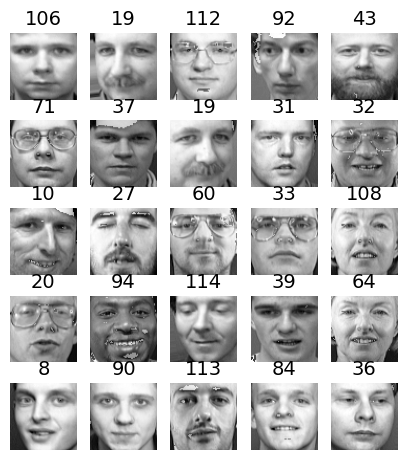

Precisión en identificar personas en el conjunto de entrenamiento: 0.93
Precisión en identificar personas en el conjunto de test: 0.82


In [ ]:
test_labels = kmeans.predict(X_test_pd)
plot_faces(X_test[:size], test_labels[:size])
plt.show()

from scipy.stats import mode

# Asegurarse de extraer correctamente la identidad más común para cada cluster
cluster_to_identity = {i: mode(y_train[kmeans.labels_ == i])[0] for i in range(kmeans.n_clusters)}

# Predecir identidades en el conjunto de entrenamiento
etiquetas_escogidas = kmeans.predict(X_train_pd)
predicted_train_identities = np.array([cluster_to_identity[label] for label in etiquetas_escogidas])

# Predecir identidades en el conjunto de prueba
predicted_test_identities = np.array([cluster_to_identity[label] for label in test_labels])

# Calcular la precisión en el conjunto de entrenamiento
train_accuracy = np.mean(predicted_train_identities == y_train)
print(f'Precisión en identificar personas en el conjunto de entrenamiento: {train_accuracy:.2f}')

# Calcular la precisión en el conjunto de prueba
test_accuracy = np.mean(predicted_test_identities == y_test)
print(f'Precisión en identificar personas en el conjunto de test: {test_accuracy:.2f}')


Al contrario que en el caso anterior, hay caras en distintas posiciones como la marcada como $43$ (misma persona pero con la foto transformada por simetría respecto un eje Y situado en el centro de la imagen). De todas formas, sigue habiendo caras en distintas posiciones pero clasificación distinta (véase la cara marcada como $20$ y $32$).

Obviando las imágenes, se puede observar por la precisión calculada que el modelo sí es bastante bueno en general. Hay una precisión muy alta en fase de entrenamiento, y gracias a la precisión en test (aunque levemente más baja, sigue siendo alta), se concluye que el modelo no se ha sobreajustado a los datos de entrenamiento.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



Las coordenadas de los core points son:
[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]
Se detectaron 1000 puntos core de un total de 1000


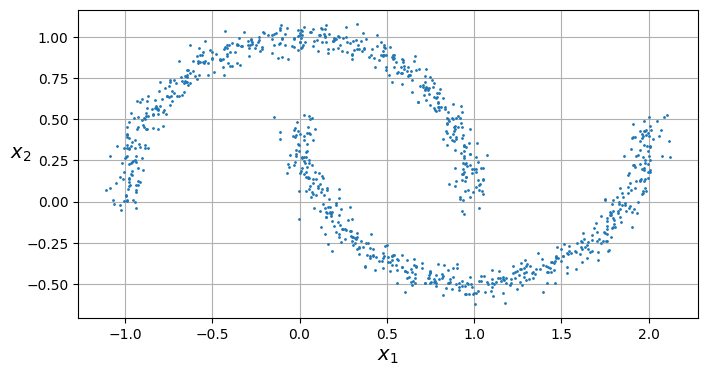

In [ ]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Ajustar el DBSCAN con los hiperparámetros por defecto
dbscan = DBSCAN()
dbscan.fit(X)

# Obtener los core points
core_indices = dbscan.core_sample_indices_

# Se obtienen los puntos asociados
core_points = X[core_indices]

print("Las coordenadas de los core points son:")
print(core_points)
print("Se detectaron "+str(len(core_points))+" puntos core de un total de "+str(len(X)))

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

El algoritmo *DBSCAN* es un algoritmo de clustering bastante efectivo para detectar clústeres de formas arbitrarias y maenjar puntos con ruido. A diferencia de KMeans, el número de clústeres no necesita ser especificado, teniendo en cuenta para ello las zonas de densidad. Hay dos conceptos clave:

- Épsilon: Hiperparámetro que define el radio del vecindario en torno al punto. A mayor valor, mayor cantidad de vecinos tendrá un punto.

- Puntos mínimos: Número mínimo de puntos que debe haber dentro de un vecindario para que dicho punto pueda ser considerado punto core.

En este algoritmo hay tres tipos de puntos:

- Puntos core: Punto que en su vecindario generado tiene al menos cierto número mínimo de puntos.

- Puntos frontera. Punto que no es punto core, pero está dentro del vecindario de un punto core.

- Punto ruido: Punto que no es ninguno de los dos anteriores.

El algoritmo sigue el siguiente proceso:

1- Se inicializa el algoritmo tomando un punto no visitado.

2- Si el punto tiene las características de punto core, se forma un clúster en torno a este punto. En otro caso, se marca temporalmente como ruido (aunque puede cambiar más adelante si se encuentra en el vecindario de un punto core).

3- Tras seleccionar un punto como core y generar su clúster, cada punto dentro del clúster que no sea él mismo es explorado: si fue clasificado como core, se exploran sus vecinos y se añaden al clúster si no han sido asignados a ningún clúster, proceso que continua hasta que no se encuentren más vecinos candidatos para añadir al clúster.

4- El proceso termina cuando todos los puntos han sido clasificados.

Este algoritmo cuenta con varias ventajas como no necesitar indicar explícitamente el número de clústeres del modelo, la buena gestión de outliers y ser versátil para diferentes formas y tamaños de los clústeres. Sin embargo, es sensible a los hiperparámetros escogidos (es muy importante el épsilon escogido) y presenta ciertas dificultades con densidades variadas.

La clase de $scikit-learn$ que implementa el algoritmo es $DBSCAN$, que entre todos los hiperparámetros que pueda tener, se destacan los hiperparámetros asociados a los dos valores antes remarcados:

- `eps`: Valor de épsilon, por defecto a $0.5$.

- `min_samples`: Mínimo de vecinos que debe haber en el vecindario de un punto para ser considerado core. Por defecto a $5$. Un menor número implica mayor probabilidad de que un punto sea core, mientras que según aumente este valor, la probabilidad disminuye, como norma general.

- `metric`: Métrica usada para la distancia entre puntos. Por defecto la euclídea.

- `algorithm`: Algoritmo usado para calcular distancias y encontrar vecinos más próximos. Por defecto a `auto`, que selecciona automáticamente el algoritmo más adecuado basado en los valores pasados. Otros valores son `ball_tree`,`kd_tree` y `brute`.

- `leaf_size`: Por defecto a $30$, afecta a la velocidad de construcción y consulta del árbol de puntos si se especifica algún algoritmo de árbol.

- `n_jobs`: Por defecto a None, es el número de trabajos a ejecutar en una ejecución paralela.

Respecto a los resultados dados, para los valores por defecto se han detectado tantos puntos core como puntos hay en el dataset. Esto es un indicativo de que habrá que experimentar con otros hiperparámetros para obtener un mejor modelo, ya que este es demasiado "permisivo" (teniendo en cuenta lo comentado anteriormente, se podría aumentar el número de puntos mínimos para ser considerado punto core, ajustando de forma correcta el épsilon).

Gráficamente se puede comprobar que los datos forman un vórtice. Ello puede deberse a cómo los datos se encuentran distribuidos, aunque también es un indicador de que el algoritmo puede estar teniendo dificultades para separar los clústeres debido a la elección de los dos hiperparámetros más importantes: épsilon y mínimo de vecinos.

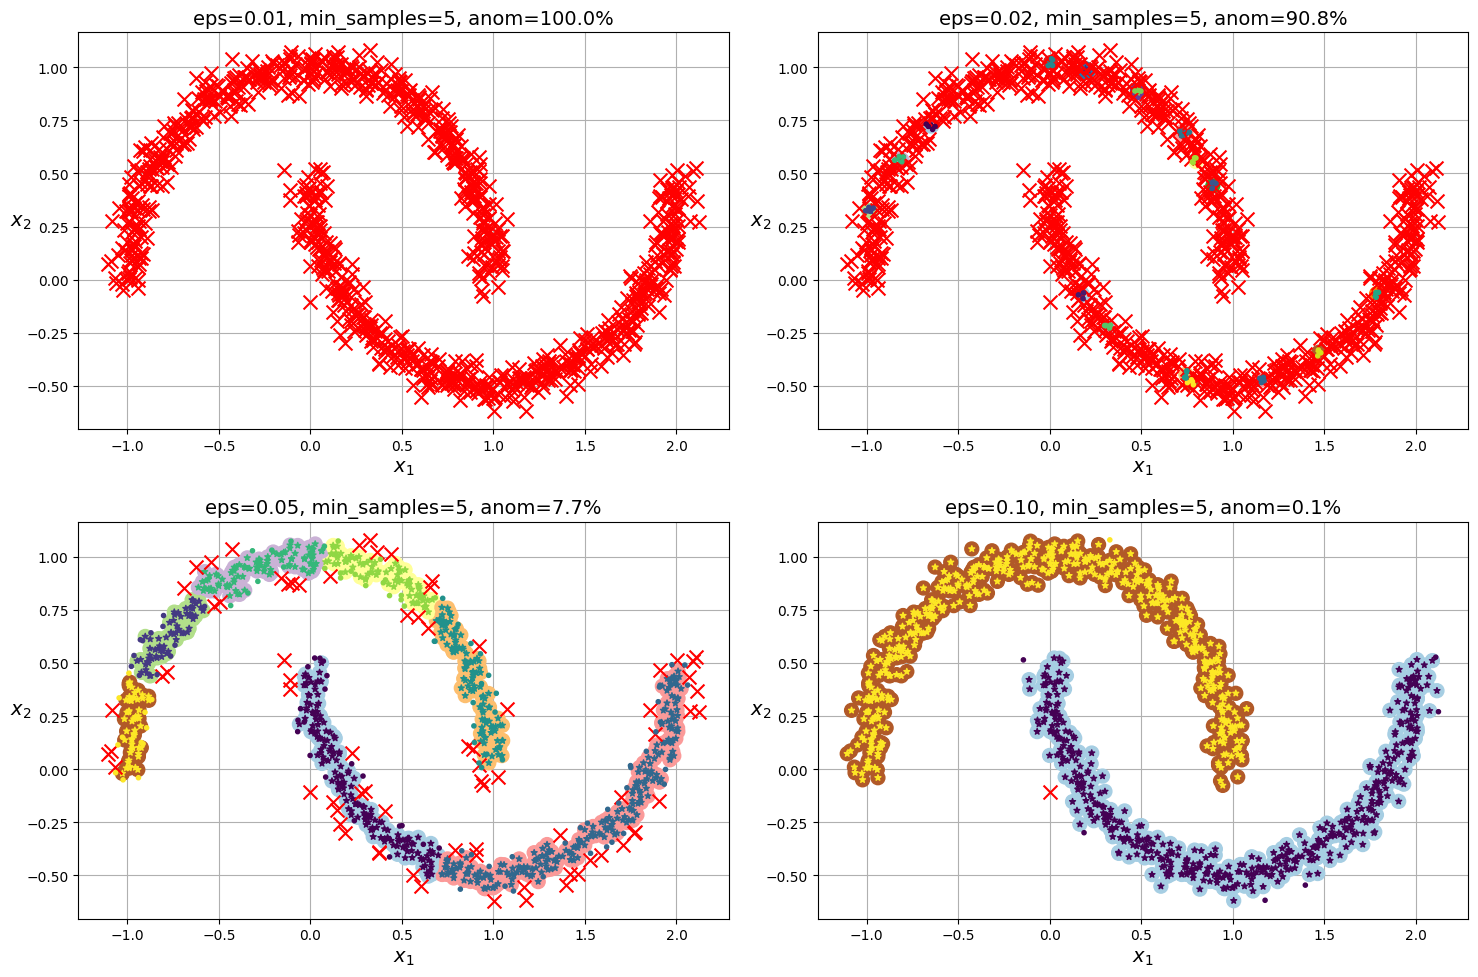

eps=0.01: Porcentaje de anomalías = 100.0%
eps=0.02: Porcentaje de anomalías = 90.8%
eps=0.05: Porcentaje de anomalías = 7.7%
eps=0.10: Porcentaje de anomalías = 0.1%


In [ ]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

eps_valores = [0.01,0.02,0.05,0.1]
ratios_anomalias = []

plt.figure(figsize=(15,10))
for i, eps in enumerate(eps_valores,start=1):
  dbscan = DBSCAN(eps=eps)
  dbscan.fit(X)
  ratio_anom = np.round(np.sum(dbscan.labels_ == -1) / len(X) * 100,2)
  ratios_anomalias.append(ratio_anom)

  plt.subplot(2,2,i)
  plot_dbscan(dbscan,X,size=100,anom_rate=ratio_anom)

plt.tight_layout()
plt.show()

# Impresión de los porcentajes de anomalías
for eps, ratio_anom in zip(eps_valores,ratios_anomalias):
  print(f'eps={eps:.2f}: Porcentaje de anomalías = {ratio_anom}%')

En $DBSCAN$ una anomalía es cualquier punto que no forma parte de un clúster (se podría decir que son puntos ruido). El hiperparámetro épsilon es muy importante en la clasificación de un punto como anomalía, pues si es muy pequeño, un punto puede no tener vecinos, y que esto se siga cumpliendo para el resto de puntos, haciendo que no sean puntos core (por no llegar al mínimo número de vecinos) ni puntos frontera (pues ningún punto es core para que haya cabida de estos puntos). A continuación se explica cada resultado según épsilon:

- `eps=0.1`: Prácticamente todos los puntos han sido clasificados como anomalías, aunque al ver el porcentaje de anomalías, $100%$, se entiende que todos los puntos son puntos ruido. Esto ha podido ocurrir por lo indicado anteriormente, por lo que se podría solucionar aumentando el valor del hiperparámetro o disminuyendo el número mínimo de vecinos (sin embargo, por defecto está a $5$, por lo que bajar más el valor podría no ser bueno para conseguir un buen modelo).

- `eps=0.02`: La situación es parecida al caso anterior. Sin mirar los resultados gráficos (que se puede vislumbrar algún punto que no es ruido), el gran porcentaje de anomalías da a entender que aún no se ha solucionado el problema de que pocos puntos puedan llegar a ser cores. Sin embargo, ciertos puntos han podido ser clasificados como core y, consecuentemente, otros son puntos frontera, debido a que el porcentaje de anomalías es menor al $100%$.

- `eps=0.05`: La situación es la inversa que las anteriores. Gráficamente la mayoría de los puntos están asociándose a clústeres, y pocos son clasificados como ruido, debido también a que el porcentaje de anomalías es bastante pequeño en comparación a los vistos hasta el momento.

- `eps=0.1`: El porcentaje de anomalías es prácticamente nulo, y se consiguen dos clústeres, lo cual era intuitivo por la forma en que se presentaban los datos (se pueden vislumbrar dos alas de una hélice).

En resumen, un modelo DBSCAN que arroja resultados bien balanceados entre porcentaje de anomalías y número de clústeres generados es `eps=0.1`, con el mínimo número de vecinos para ser punto core a $5$, el valor por defecto. La diferencia con el caso anterior (`eps=0.05`), es que los clústeres formados tienen sentido (en el caso `eps=0.05`, dos puntos prácticamente seguidos han sido clasificados en clústeres distintos).

Ejemplos predichos: 
Ejemplo: [-0.5  0. ], cluster: 1, probabilidad: [0.1 0.9]
Ejemplo: [0.  0.5], cluster: 0, probabilidad: [1. 0.]
Ejemplo: [ 1.  -0.1], cluster: 1, probabilidad: [0. 1.]
Ejemplo: [2. 1.], cluster: 0, probabilidad: [1. 0.]


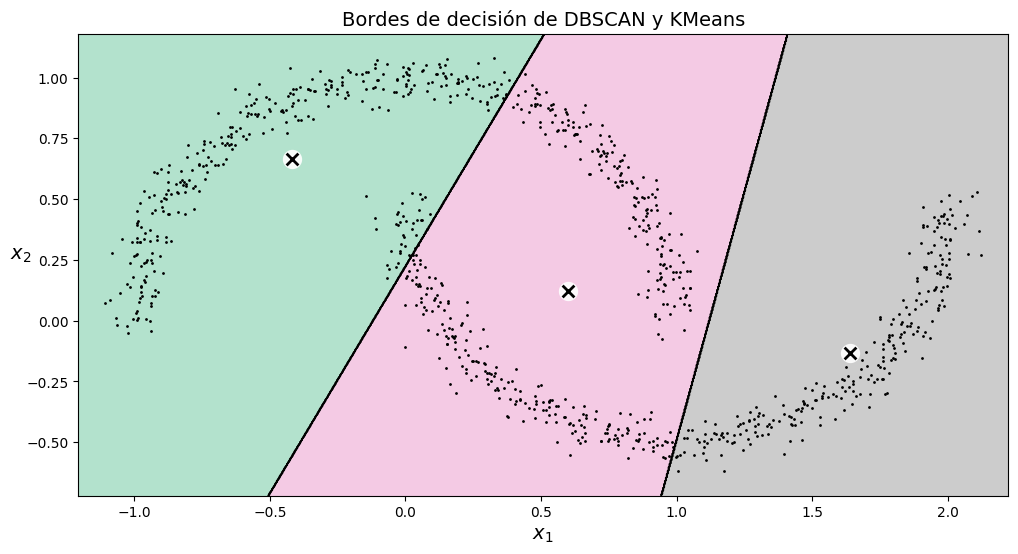

In [ ]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier

# Se usará el DBSCAN obtenido antes. Consigo el epsilon con el que parece haber una separación mejor
mejor_eps_indice = ratios_anomalias.index(min(ratios_anomalias))
mejor_eps = eps_valores[mejor_eps_indice]
mejor_dbscan = DBSCAN(eps=mejor_eps)
mejor_dbscan.fit(X)

# Obtención de core points para el mejor modelo DBSCAN
puntos_core_mask = np.zeros_like(mejor_dbscan.labels_,dtype=bool)
puntos_core_mask[mejor_dbscan.core_sample_indices_] = True
etiquetas = mejor_dbscan.labels_

# Ahora se entrena un KNN
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X[puntos_core_mask],etiquetas[puntos_core_mask])

# Genero algunos ejemplos a predecir
nuevos_ejemplos = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

# Predicciones y la probabilidad asociada
predicciones_clust = knn.predict(nuevos_ejemplos)
probs = knn.predict_proba(nuevos_ejemplos)

print("Ejemplos predichos: ")
for ejemplo, cluster, prob in zip(nuevos_ejemplos, predicciones_clust,probs):
  print(f'Ejemplo: {ejemplo}, cluster: {cluster}, probabilidad: {prob}')

# Pintar bordes de decisión y usar KMeans
plt.figure(figsize=(12,6))
plot_clusters(X)

kmeans = KMeans(n_clusters=len(np.unique(etiquetas)))
kmeans.fit(X)
plot_decision_boundaries(kmeans,X,show_centroids=True)

plt.title("Bordes de decisión de DBSCAN y KMeans")
plt.show()

En primer lugar, es necesario repasar la naturaleza de los algoritmos KMeans y DBSCAN:

- DBSCAN agrupa los puntos basándose en regiones de alta densidad, separadas por regiones de baja densidad, por lo que los clústeres pueden ser de formas y tamaños distintos. Además, las fronteras de decisión no son claras, pues no está diseñado para predecir pertenencia a clústeres de nuevos datos, sino identificar los clústeres en función de la densidad (razón por la que la clase correspondiente no tiene un método `predict()`).

- Por le contrario, KMeans supone que los clústeres tienden a ser esféricos y a tener un tamaño similar, minimizando la varianza dentro de cada clúster. Las fronteras son lineales, y tal y como se observa en la gráfica anterior, no se ajusta muy bien a posibles clústeres con un patrón irregular (puede ser mejor si las zonas de densidad son agrupamientos que forman figuras geométricas simples como círculos o cuadrados). En general, no es bueno para distribuciones de puntos complejas.

Con respecto a los resultados obtenidos con KNN usando los puntos core para entrenar, se muestra cómo se puede inferir fronteras de decisión a partir de datos de entrenamiento. Las probabilidades obtenidos significan qué tan bien un KNN puede imitar la lógica de la densidad. Por ello, los puntos cercanos a las regiones de alta densidad son clasificados con alta probabilidad, mientras que los otros dos lo son con baja probabilidad. Un ejemplo serían los puntos $(-0.5,0)$ y $(1,-0.1)$. Las probabilidades son, respectivamente, $(0.1,0.9)$ y $(0,1)$, por lo que los puntos han sido asignados por KNN al clúster $1$ (mayor probabilidad en el par). Gráficamente, los puntos están más cercanos al clúster marcado como $1$ (el ala superior de la hélice). Sin embargo, los otros dos están más cerca del clúster marcado como $0$ (el ala inferior de la hélice), por lo que la probabilidad dada por KNN para clasificar en dicho clúster es mayor que en el otro.

Interpretando las separaciones en la gráfica mostradas por KMeans se puede observar que, efectivamente, para distribuciones de puntos complejas la separación por fronteras lineales no da un buen resultado (puntos muy cercanos entre si son separados por una frontera lineal, y se entiende que tendrían que pertenecer al mismo clúster). Además, respecto a la posición final de los centroides, no han convergido a posiciones cercanas a zonas de densidad (el centroide de la región central está entre las dos alas de la hélice), por lo que tampoco se consigue el objetivo de KMeans de situar el centroide final como la media de los puntos del clúster, que se entiende debe estar relativamente centrado en la región que separa.

Como conclusión, para elegir entre DBSCAN o KMeans es importante intuir la distribución que siguen los puntos en el espacio. Podría ser de ayuda proyectar los puntos de un espacio de dimensión $N>3$ a un espacio de dimensión $2$ para pensar si las distribuciones son figuras geométricas simples o puntos dispersos (en tal caso, KMeans puede dar buenos resultados) o por el contrario los patrones son complejos (como el caso de la hélice de dos alas, por lo que DBSCAN podría dar mejores resultados, haciendo las predicciones oportunas con KNN por ejemplo).

Un breve inciso sería el uso de $30$ vecinos para KNN. Esta decisión podría estar orientada a conseguir una buena generalización y robustez en las predicciones del modelo, tratando de equilibrar la complejidad del modelo con la precisión práctica, mientras se intenta mantener la estructura de densidad identificada por DBSCAN inicialmente.

## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [ ]:
import numpy as np
import pandas as pd

df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

Se comienza con `.describe()` para realizar un primer acercamiento al problema.

In [ ]:
print(df_frogs.describe())

          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.989885     0.323584     0.311224     0.445997     0.127046   
std       0.069016     0.218653     0.263527     0.160328     0.162722   
min      -0.251179    -0.673025    -0.436028    -0.472676    -0.636012   
25%       1.000000     0.165945     0.138445     0.336737     0.051717   
50%       1.000000     0.302184     0.274626     0.481463     0.161361   
75%       1.000000     0.466566     0.430695     0.559861     0.222592   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000  ...   
mean      0.097939    -0.001397    -0.000370     0.128213     0.055998  ...   
std       0.120412     0.171404     0.116302     0.179008     0.127099  ...   
min      -0.41041

Se observa que, en total, hay $23$ características por muestra (siendo el total de muestras de $7195$. Si se comprueban los estadísticos del máximo y tercer cuartil, da a entender que podría haber bastantes outliers (tal y como se indicaba). Por ejemplo, las distancias entre estos dos estadísticos en la característica $MFCCs\_19$ es bastante más grande que la distancia entre el primer y el tercer cuartil. Puede observarse que esto se cumple para otras características, por lo que será importante tratar estos outliers más adelante.

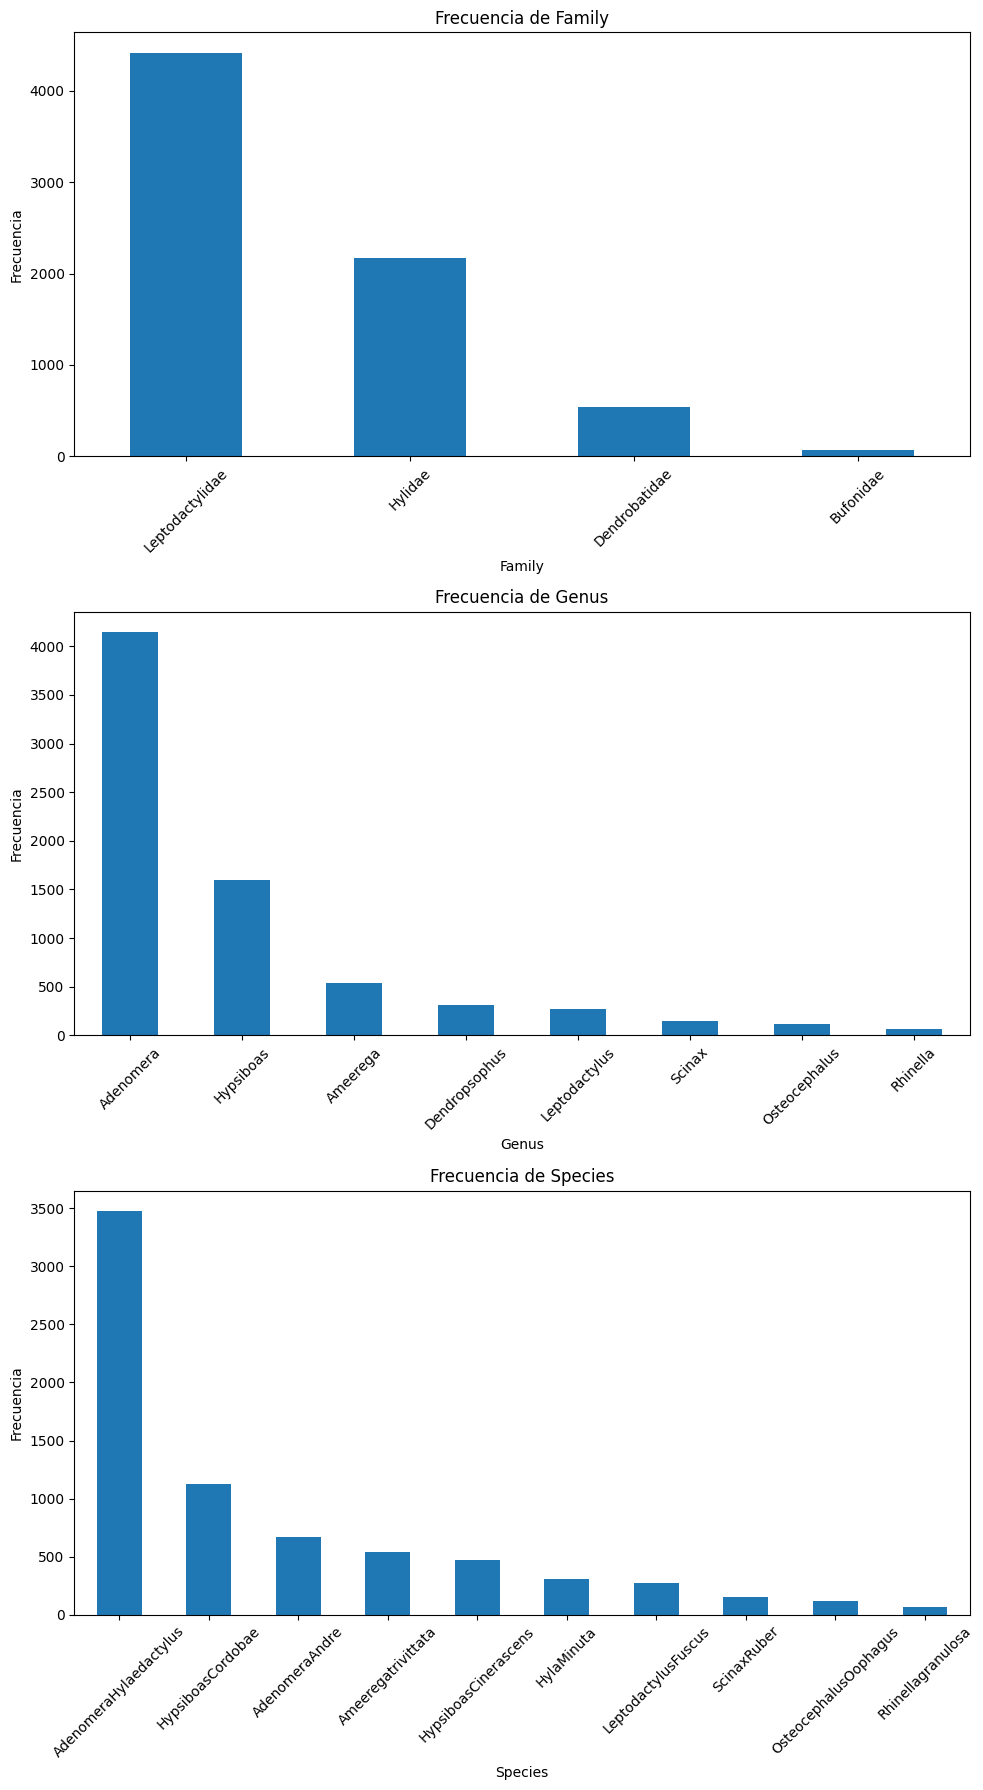

In [ ]:
import matplotlib.pyplot as plt

# Lista de las categorías que se desea pintar
categories = ['Family', 'Genus', 'Species']

# Crear una figura y un conjunto de subplots
fig, axes = plt.subplots(nrows=len(categories), figsize=(10, 18))

# Iterar sobre las categorías y pintar la frecuencia de cada una
for ax, category in zip(axes, categories):
    frequencies = df_frogs[category].value_counts()
    frequencies.plot(kind='bar', ax=ax)
    ax.set_title(f'Frecuencia de {category}')
    ax.set_xlabel(f'{category}')
    ax.set_ylabel('Frecuencia')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

En primer lugar, las distribuciones están bastante desbalanceadas, independientemente de la etiqueta observada. Por ejemplo, en la frecuencia por especie, $AdenomeraHylaedactylus$ aparece mucho más que $Rhinellagranulosa$. Para poder evitar sesgo en el modelo final, se utlizará la técnica de $oversampling$ (añadir muestras sintéticas, pues si se decidiese eliminarse, la cantidad de muestras podría no ser buena para entrenar un modelo fiable).

Se intuye que no habrá valores perdidos. Sin embargo, se comprueba.

In [ ]:
print("Cantidad de valores perdidos en el dataset: ", df_frogs.isna().sum().sum())

Cantidad de valores perdidos en el dataset:  0


No hay valores perdidos en el conjunto de datos. A continuación se hace una visualización gráfica de la distribución de las características.

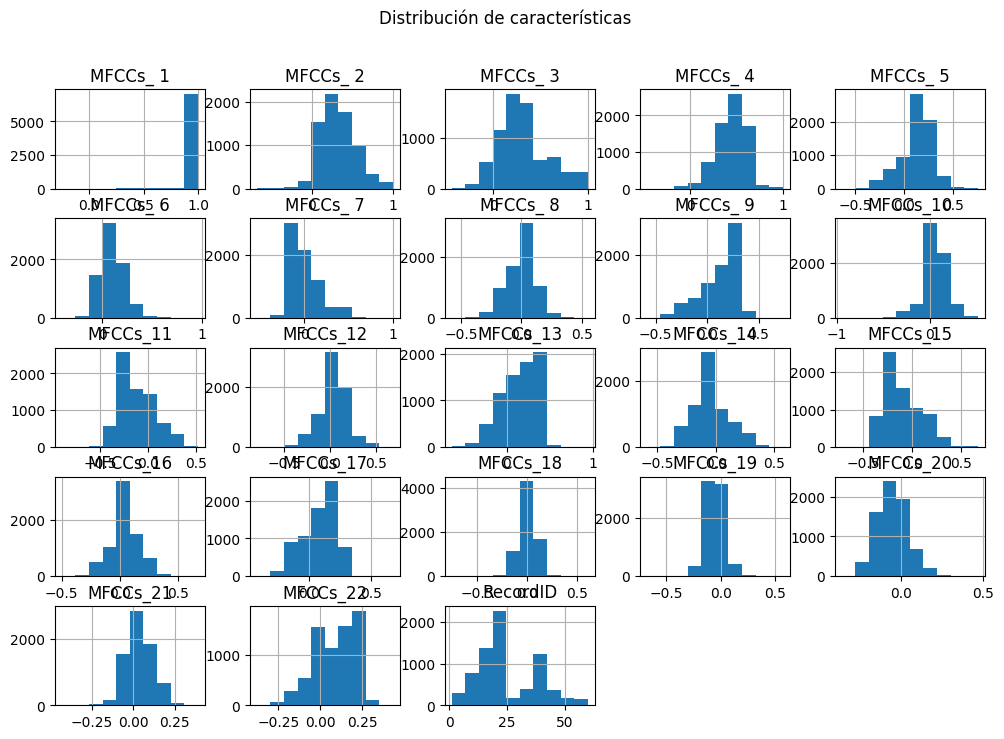

In [ ]:
df_frogs.hist(figsize=(12,8))
plt.suptitle('Distribución de características')
plt.show()

A primera vista, sin observar la distribución de RecordID, se puede comprobar que en general hay características que parecen estar distribuidos según una normal (con varianza bastante alta y a veces desplazada según cierta media). Hay otras características como MFCCs_7 que presentan una distribución no centrada, y pueden dar problemas de sesgo o de poca capacidad de generalización cuando se trabaje con los modelos. Se intentará solucionar esto con técnicas de reducción de dimensionalidad para ver si son eliminadas, o pueden balancearse usando otras técnicas.

Aunque la columna RecordID sea adicional y para entrenar modelos de aprendizaje no supervisado no sea necesario tenerla en cuenta como característica (pues no dice nada sobre el canto de la rana, solo sirve para identificar el canto, por lo que sería útil en algoritmos de aprendizaje supervisado), se puede desprender que el conjunto de datos está desbalanceado (hay cantos que presentan una frecuencia mayor que otros). Sería interesante entonces usar técnicas de $oversampling$.

Tras comprobar que no hay datos perdidos y haber hecho el análisis exploratorio pertinente hasta el momento, se procede a tratar los outliers. Para ello, se hace la separación entre entrenamiento y test y se comienza con el preprocesamiento.

Como es un problema multietiqueta, en la variable a predecir se incluye la tupla (Family,Genus,Species), y en el conjunto de características se eliminan las antes mencionadas y la columna RecordID, pues se indica que es una columna adicional para identificar cada canto, pero como se está haciendo frente a un problema de aprendizaje no supervisado, no se tiene en cuenta ni para el conjunto multietiqueta ni para el conjunto de características.

In [ ]:
X = df_frogs.drop(['Family','Genus','Species','RecordID'],axis=1)
y = df_frogs[['Family','Genus','Species']]

Antes de continuar se visualiza la matriz de correlaciones de las características (en este caso las variables numéricas que suponen cierto interés en el problema).

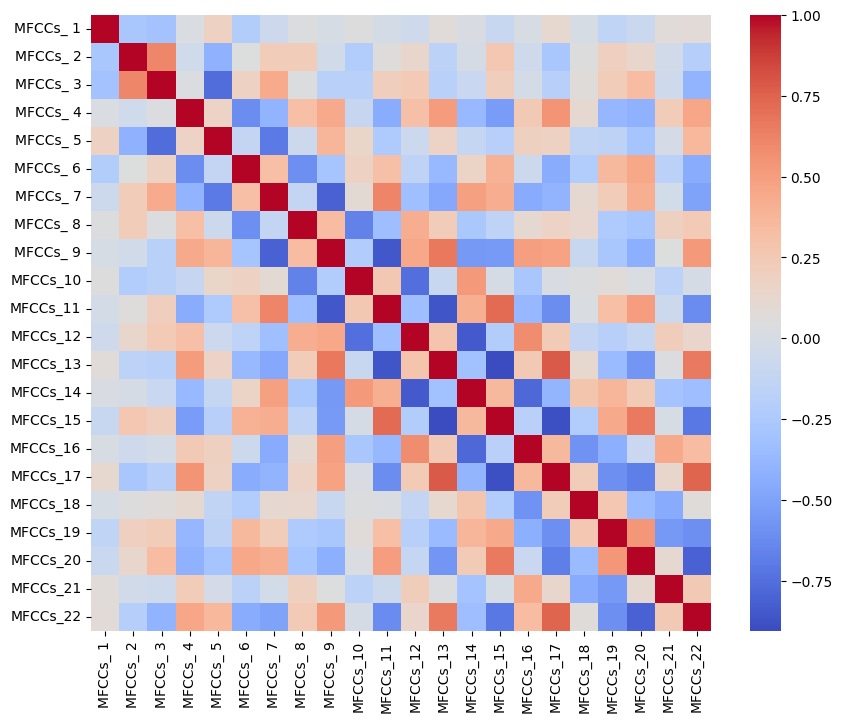

In [ ]:
corr_matrix = pd.DataFrame(X).corr()

# Uso de heatmap para visualizarla
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,fmt=".2f",cmap="coolwarm")
plt.show()

Obviando la correlación perfecta entre una característica consigo misma, la correlación entre dos características da las siguientes situaciones:

- Un color cálido fuera de la diagonal: Un valor de correlación entre $]0,1]$: Existe cierta correlación entre las características, por lo que pueden presentar dependencias. Con un análisis de componentes principales podrían eliminarse. Es una correlación positiva, lo que implica que las funciones que las representan tienen mismo comportamiento monótono (son directamente proporcionales bajo cierta constante de proporción).

- Color neutro: No hay correlación entre las características, y son independientes, por lo que un algoritmo de reducción de dimensionalidad debería dejar estas características tras su aplicación.

- Un colo frío: Valor de correlación en $[-1,0[$. Son variables dependientes entre si, aumentando la dependencia cuanto más frío sea el color (más se acerca a $-1$). Una correlación negativa implica que son inversamente proporcionales (si una aumenta, la otra disminuye según cierta constante de proporcionalidad).

Se hace la separación entre entrenamiento y test (o dos conjuntos distintos).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(pd.DataFrame(X_train).describe())
print(pd.DataFrame(X_test).describe())

          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000   
mean      0.989024     0.325073     0.312922     0.446578     0.127709   
std       0.072413     0.220003     0.264642     0.160242     0.162872   
min      -0.251179    -0.673025    -0.436028    -0.351358    -0.566960   
25%       1.000000     0.166270     0.140062     0.336991     0.052151   
50%       1.000000     0.304533     0.275280     0.481701     0.162776   
75%       1.000000     0.467556     0.432064     0.560234     0.222243   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000  ...   
mean      0.097728    -0.003644    -0.000177     0.130394     0.056485  ...   
std       0.120664     0.169222     0.116530     0.177268     0.126764  ...   
min      -0.41041

Los conjuntos han sido separados en entrenamiento y test. Además, al tratarse de un problema de clasificación multietiqueta, se han separado las variables que eran independientes (las características) de las columnas Family,Genus y Species, asociadas a las etiquetas. Como en el enunciado se especifica que RecordID es una columna de más, que no tiene que ver con el problema de clasificar ranas, se elimina.

Antes de tratar los outliers (siguen presentes por la razón expuesta antes), se comprueba que en `X_train` y `X_test` todas las variables son numéricas.

In [ ]:
print(df_frogs.dtypes)

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object


Aunque se ha aplicado al dataframe original, las características de los conjuntos mencionados son todas numéricas. A continuación se hace una visualización de una gráfica scatter para ambos conjuntos numéricos.

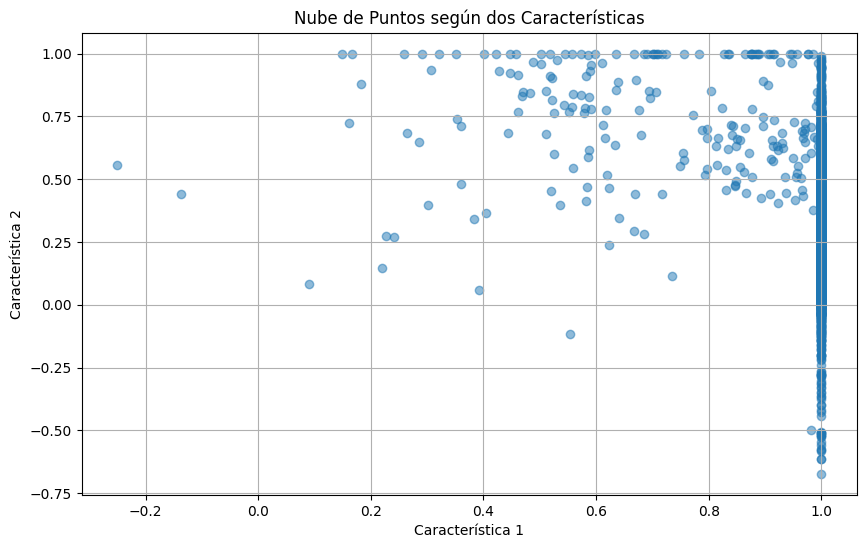

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(X_train).iloc[:, 0], pd.DataFrame(X_train).iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

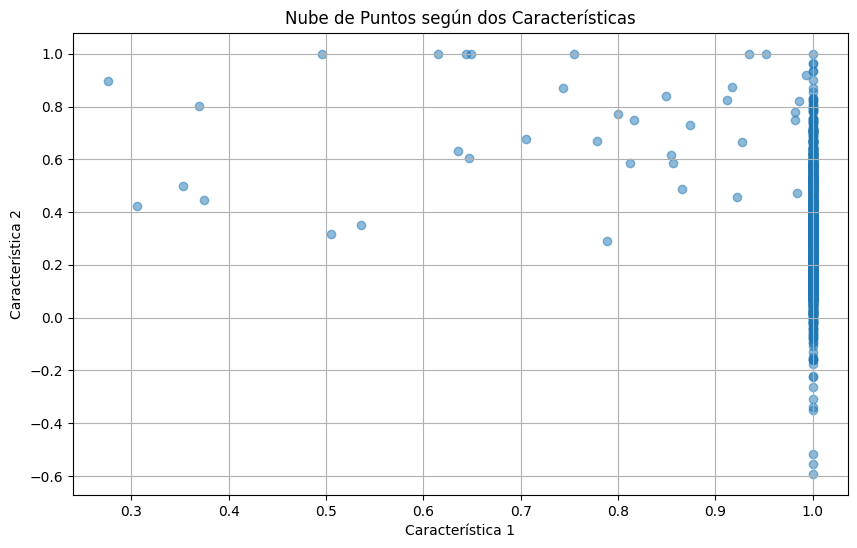

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.DataFrame(X_test).iloc[:, 0], pd.DataFrame(X_test).iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

Dada la clara presencia de outliers, no se puede interpretar correctamente cuántos clústeres podría haber. Por ello, se tratan y, tras el preprocesado de datos, se volverá a consultar.

 Ahora se creará un boxplot para sendos conjuntos para comprobar, de forma más efectiva, la existencia de outliers.

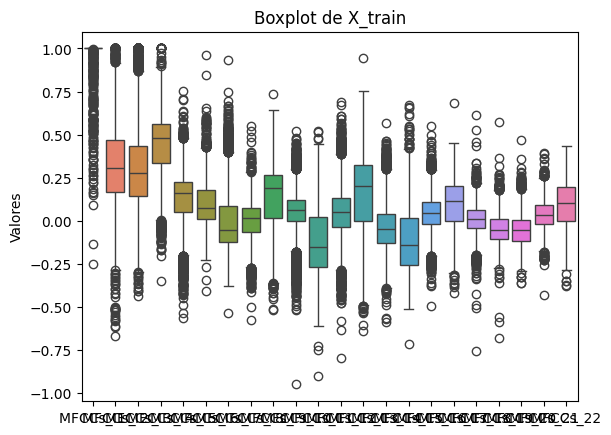

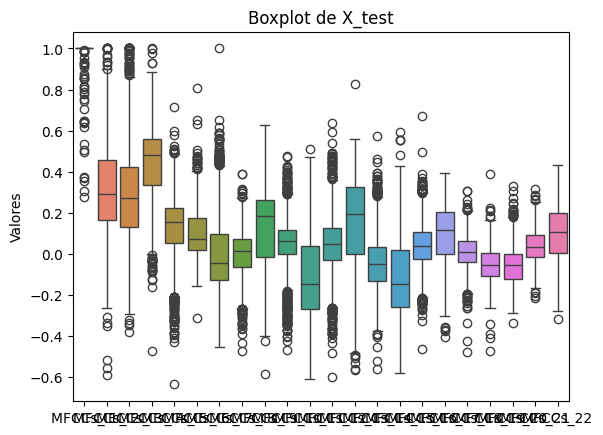

In [ ]:
import seaborn as sns

sns.boxplot(data=pd.DataFrame(X_train))
plt.title('Boxplot de X_train')
plt.ylabel('Valores')
plt.show()

sns.boxplot(data=pd.DataFrame(X_test))
plt.title('Boxplot de X_test')
plt.ylabel('Valores')
plt.show()

A grandes rasgos, en gran parte de las características los mínimos y máximos están bastante lejos del rectángulo (que va desde el primer cuartil hasta el tercer cuartil). Se confirma entonces la existencia de bastantes outliers.

Se puede entonces proceder a tratar los outliers, previa identificación con el método del rango intercuartílico por lo visto en los boxplots.

In [ ]:
outliers_contar_train = {}
i=1

for column in pd.DataFrame(X_train).select_dtypes(include=[np.number]).columns:
  Q1 = pd.DataFrame(X_train)[column].quantile(0.25)
  Q3 = pd.DataFrame(X_train)[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  # Contar outliers
  outliers_contar_train[column] = ((pd.DataFrame(X_train)[column] < lim_inf) | (pd.DataFrame(X_train)[column] > lim_sup)).sum()
  print(f'Característica {i} presenta {outliers_contar_train[column]} outliers')
  i=i+1

Característica 1 presenta 211 outliers
Característica 2 presenta 115 outliers
Característica 3 presenta 266 outliers
Característica 4 presenta 108 outliers
Característica 5 presenta 351 outliers
Característica 6 presenta 64 outliers
Característica 7 presenta 269 outliers
Característica 8 presenta 123 outliers
Característica 9 presenta 25 outliers
Característica 10 presenta 462 outliers
Característica 11 presenta 7 outliers
Característica 12 presenta 273 outliers
Característica 13 presenta 13 outliers
Característica 14 presenta 124 outliers
Característica 15 presenta 26 outliers
Característica 16 presenta 248 outliers
Característica 17 presenta 12 outliers
Característica 18 presenta 105 outliers
Característica 19 presenta 51 outliers
Característica 20 presenta 67 outliers
Característica 21 presenta 49 outliers
Característica 22 presenta 5 outliers


Todas las características presentan outliers en el conjunto de entrenamiento. Se han almacenado en una variable para tratarlos después.

In [ ]:
outliers_contar_test = {}
i=1

for column in pd.DataFrame(X_test).select_dtypes(include=[np.number]).columns:
  Q1 = pd.DataFrame(X_test)[column].quantile(0.25)
  Q3 = pd.DataFrame(X_test)[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  # Contar outliers
  outliers_contar_test[column] = ((pd.DataFrame(X_test)[column] < lim_inf) | (pd.DataFrame(X_test)[column] > lim_sup)).sum()
  print(f'Característica {i} presenta {outliers_contar_test[column]} outliers')
  i=i+1

Característica 1 presenta 37 outliers
Característica 2 presenta 20 outliers
Característica 3 presenta 59 outliers
Característica 4 presenta 30 outliers
Característica 5 presenta 73 outliers
Característica 6 presenta 23 outliers
Característica 7 presenta 58 outliers
Característica 8 presenta 39 outliers
Característica 9 presenta 2 outliers
Característica 10 presenta 133 outliers
Característica 11 presenta 1 outliers
Característica 12 presenta 84 outliers
Característica 13 presenta 7 outliers
Característica 14 presenta 47 outliers
Característica 15 presenta 5 outliers
Característica 16 presenta 64 outliers
Característica 17 presenta 5 outliers
Característica 18 presenta 30 outliers
Característica 19 presenta 10 outliers
Característica 20 presenta 18 outliers
Característica 21 presenta 9 outliers
Característica 22 presenta 1 outliers


En el conjunto de test también hay outliers, pero bastantes menos que en el conjunto de entrenamiento.

Se recuerdan los estadísticos tantos de entrenamiento como test para comprobar para relacionar mayor cantidad de outliers en una característica con estadísticos más dispersos.

In [ ]:
print(".describe() de X_train")
print(pd.DataFrame(X_train).describe())

.describe() de X_train
          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000   
mean      0.989024     0.325073     0.312922     0.446578     0.127709   
std       0.072413     0.220003     0.264642     0.160242     0.162872   
min      -0.251179    -0.673025    -0.436028    -0.351358    -0.566960   
25%       1.000000     0.166270     0.140062     0.336991     0.052151   
50%       1.000000     0.304533     0.275280     0.481701     0.162776   
75%       1.000000     0.467556     0.432064     0.560234     0.222243   
max       1.000000     1.000000     1.000000     1.000000     0.752246   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000  ...   
mean      0.097728    -0.003644    -0.000177     0.130394     0.056485  ...   
std       0.120664     0.169222     0.116530     0.177268     0.126764  .

In [ ]:
print(".describe() de X_test")
print(pd.DataFrame(X_test).describe())

.describe() de X_test
          MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000   
mean      0.993328     0.317628     0.304433     0.443673     0.124395   
std       0.053187     0.213140     0.258998     0.160706     0.162152   
min       0.276079    -0.591520    -0.378308    -0.472676    -0.636012   
25%       1.000000     0.164539     0.133029     0.334657     0.051463   
50%       1.000000     0.290769     0.272806     0.479878     0.155608   
75%       1.000000     0.458866     0.425127     0.558819     0.224937   
max       1.000000     1.000000     1.000000     1.000000     0.712662   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000  ...   
mean      0.098782     0.007591    -0.001143     0.119491     0.054051  ...   
std       0.119435     0.179646     0.115424     0.185614     0.128460  ..

La hipótesis anterior es cierta: en las características con estadísticos más dispersos y/o distancias más anormales (por ejemplo, mediana con tercer cuartil comparado con mínimo con primer cuartil o tercer cuartil y máximo). Se hace hincapié en el uso de cuartiles como referencia debido al método usado para detectar outliers.

Usando las variables destinadas a guardar la posición de los outliers, se procede a tratarlos, sabiendo que son todas las características numéricas. Se pueden tratar de varias formas:

- Eliminando las muestras con outliers. Sin embargo, no parece ser buen método por la gráfica de frecuencias mostrada antes (hay $3$-uplas con poca frecuencia de aparición).

- Limitar todos los valores máximos, por ejemplo, al percentil $95$.

- Transformaciones como la logarítmica (no se usará por haber valores menores a $0$), raíz cuadrada (tampoco se usará) o raíz cúbica (aunque puede ser buena idea, dada la manera de crecer o decrecer de dicha función, los valores que no son outliers no van a tomar valores muy distintos).

- Sustitución por estadísticos como la media o la mediana. Dado que la mediana está menos influenciada por los outliers que la media, si se usa, se sustituirá por la mediana.

Finalmente, se escoge sustituir los outliers por la mediana. Transformar los valores por encima del percentil $95$ a que el máximo pase a ser dicho valor puede no solucionar los outliers por valor en exceso, pero tampoco corrige los outliers "por debajo".

In [ ]:
# Sustitución de outliers en X_test por mediana
X_train_df = pd.DataFrame(X_train)

for column in X_train_df.select_dtypes(include=[np.number]).columns:
  mediana = X_train_df[column].median()
  Q1 = X_train_df[column].quantile(0.25)
  Q3 = X_train_df[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  outliers_indices = X_train_df[(X_train_df[column] < lim_inf) | (X_train_df[column] > lim_sup)].index

  X_train_df.loc[outliers_indices,column] = mediana

In [ ]:
# Sustitución de outliers en X_train por mediana
X_test_df = pd.DataFrame(X_test)

for column in X_test_df.select_dtypes(include=[np.number]).columns:
  mediana = X_test_df[column].median()
  Q1 = X_test_df[column].quantile(0.25)
  Q3 = X_test_df[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  outliers_indices = X_test_df[(X_test_df[column] < lim_inf) | (X_test_df[column] > lim_sup)].index

  X_test_df.loc[outliers_indices,column] = mediana


A continuación se muestran cuántos outliers considera el método de rango intercuartílico.

In [ ]:
outliers_contar_train = {}
i=1

for column in X_train_df.select_dtypes(include=[np.number]).columns:
  Q1 = X_train_df[column].quantile(0.25)
  Q3 = X_train_df[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  # Contar outliers
  outliers_contar_train[column] = ((X_train_df[column] < lim_inf) | (X_train_df[column] > lim_sup)).sum()
  print(f'Característica {i} presenta {outliers_contar_train[column]} outliers')
  i=i+1

Característica 1 presenta 0 outliers
Característica 2 presenta 22 outliers
Característica 3 presenta 116 outliers
Característica 4 presenta 21 outliers
Característica 5 presenta 443 outliers
Característica 6 presenta 11 outliers
Característica 7 presenta 132 outliers
Característica 8 presenta 73 outliers
Característica 9 presenta 12 outliers
Característica 10 presenta 250 outliers
Característica 11 presenta 0 outliers
Característica 12 presenta 195 outliers
Característica 13 presenta 0 outliers
Característica 14 presenta 106 outliers
Característica 15 presenta 2 outliers
Característica 16 presenta 252 outliers
Característica 17 presenta 0 outliers
Característica 18 presenta 22 outliers
Característica 19 presenta 7 outliers
Característica 20 presenta 10 outliers
Característica 21 presenta 16 outliers
Característica 22 presenta 0 outliers


In [ ]:
outliers_contar_test = {}
i=1

for column in pd.DataFrame(X_test).select_dtypes(include=[np.number]).columns:
  Q1 = X_test_df[column].quantile(0.25)
  Q3 = X_test_df[column].quantile(0.75)
  IQR = Q3-Q1
  lim_inf = Q1 - 1.5*IQR
  lim_sup = Q3 + 1.5*IQR

  # Contar outliers
  outliers_contar_test[column] = ((X_test_df[column] < lim_inf) | (X_test_df[column] > lim_sup)).sum()
  print(f'Característica {i} presenta {outliers_contar_test[column]} outliers')
  i=i+1

Característica 1 presenta 0 outliers
Característica 2 presenta 3 outliers
Característica 3 presenta 38 outliers
Característica 4 presenta 3 outliers
Característica 5 presenta 81 outliers
Característica 6 presenta 2 outliers
Característica 7 presenta 32 outliers
Característica 8 presenta 21 outliers
Característica 9 presenta 0 outliers
Característica 10 presenta 79 outliers
Característica 11 presenta 0 outliers
Característica 12 presenta 72 outliers
Característica 13 presenta 1 outliers
Característica 14 presenta 60 outliers
Característica 15 presenta 0 outliers
Característica 16 presenta 51 outliers
Característica 17 presenta 1 outliers
Característica 18 presenta 5 outliers
Característica 19 presenta 0 outliers
Característica 20 presenta 6 outliers
Característica 21 presenta 1 outliers
Característica 22 presenta 0 outliers


Como se puede observar, ha bajado bastante el número de outliers considerado por el método de rango intercuartílico. Se almacenan los valores para seguir trabajando y se comprueban las estadísticas por característica para ver que, efectivamente, las distancias entre algunos estadísticas son más equitativas.

In [ ]:
print(".describe() de X_train_df")
print(X_train_df.describe())

.describe() de X_train_df
       MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count    5756.0  5756.000000  5756.000000  5756.000000  5756.000000   
mean        1.0     0.319787     0.284550     0.451767     0.147515   
std         0.0     0.196525     0.221996     0.143502     0.128342   
min         1.0    -0.285501    -0.296560     0.003445    -0.202665   
25%         1.0     0.168957     0.141625     0.344825     0.086946   
50%         1.0     0.304533     0.275280     0.481701     0.162776   
75%         1.0     0.456306     0.397823     0.559044     0.220110   
max         1.0     0.916370     0.869444     0.890478     0.477381   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000  ...   
mean      0.093299    -0.027767     0.003640     0.132758     0.065197  ...   
std       0.111990     0.132793     0.105964     0.173753     0.085373  ...   
min      -0.231343

In [ ]:
print(".describe() de X_test_df")
print(X_test_df.describe())

.describe() de X_test_df
       MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count    1439.0  1439.000000  1439.000000  1439.000000  1439.000000   
mean        1.0     0.314058     0.279649     0.451632     0.139926   
std         0.0     0.196903     0.220229     0.141442     0.131623   
min         1.0    -0.262690    -0.291428    -0.000671    -0.207980   
25%         1.0     0.167513     0.134586     0.347566     0.073834   
50%         1.0     0.290769     0.272806     0.479878     0.155608   
75%         1.0     0.449038     0.393169     0.558520     0.222400   
max         1.0     0.897759     0.860142     0.883163     0.484908   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000  ...   
mean      0.092792    -0.014463     0.003709     0.120453     0.064211  ...   
std       0.108316     0.147504     0.102800     0.184127     0.081796  ...   
min      -0.154778 

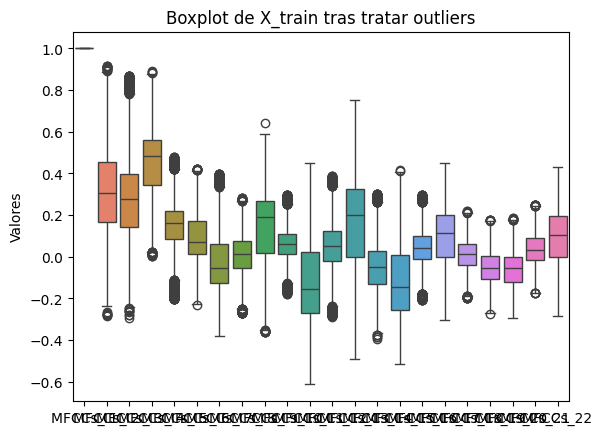

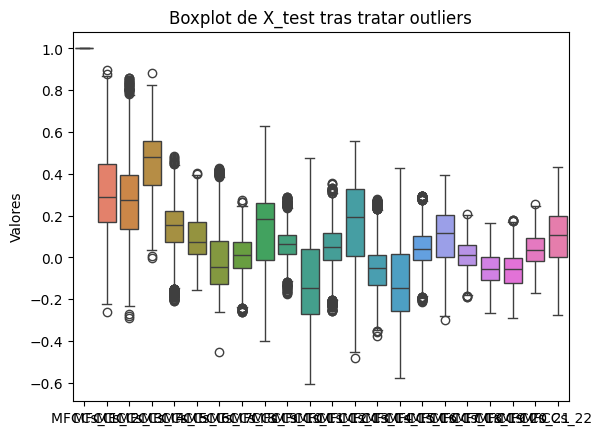

In [ ]:
sns.boxplot(data=X_train_df)
plt.title('Boxplot de X_train tras tratar outliers')
plt.ylabel('Valores')
plt.show()

sns.boxplot(data=X_test_df)
plt.title('Boxplot de X_test tras tratar outliers')
plt.ylabel('Valores')
plt.show()

A continuación se comprobará si es necesaría normalizar los datos al intervalor $[0,1]$. Esto es, se comprueba si la distancia entre el máximo y el mínimo por característica es aproximadamente la misma para todas. Esto se debe a que algoritmos de clustering como KMeans son sensibles a los cambios de escala.

In [ ]:
min_values = X_train_df.min()
max_values = X_train_df.max()

print("Distancia entre mínimo y máximo por característica en X_train")
print(max_values-min_values)

Distancia entre mínimo y máximo por característica en X_train
MFCCs_ 1    0.000000
MFCCs_ 2    1.201871
MFCCs_ 3    1.166004
MFCCs_ 4    0.887033
MFCCs_ 5    0.680046
MFCCs_ 6    0.654974
MFCCs_ 7    0.778518
MFCCs_ 8    0.556559
MFCCs_ 9    1.005370
MFCCs_10    0.474763
MFCCs_11    1.061246
MFCCs_12    0.673934
MFCCs_13    1.240907
MFCCs_14    0.693478
MFCCs_15    0.929022
MFCCs_16    0.502413
MFCCs_17    0.754185
MFCCs_18    0.416347
MFCCs_19    0.449564
MFCCs_20    0.477700
MFCCs_21    0.425833
MFCCs_22    0.718468
dtype: float64


In [ ]:
min_values = X_test_df.min()
max_values = X_test_df.max()

print("Distancia entre mínimo y máximo por característica en X_test")
print(max_values-min_values)

Distancia entre mínimo y máximo por característica en X_test
MFCCs_ 1    0.000000
MFCCs_ 2    1.160448
MFCCs_ 3    1.151570
MFCCs_ 4    0.883834
MFCCs_ 5    0.692888
MFCCs_ 6    0.557781
MFCCs_ 7    0.881910
MFCCs_ 8    0.537009
MFCCs_ 9    1.028369
MFCCs_10    0.466991
MFCCs_11    1.082155
MFCCs_12    0.614825
MFCCs_13    1.038898
MFCCs_14    0.653830
MFCCs_15    1.004985
MFCCs_16    0.507498
MFCCs_17    0.695705
MFCCs_18    0.397798
MFCCs_19    0.429356
MFCCs_20    0.467911
MFCCs_21    0.422395
MFCCs_22    0.706646
dtype: float64


Dada la clara diferencia de distancias, se procede a normalizar valores al $[0,1]$.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_df_norm = pd.DataFrame(scaler.fit_transform(X_train_df),columns=X_train_df.columns)

In [ ]:
print(".describe() de X_train_df tras llevar a [0,1]")
print(X_train_df_norm.describe())

.describe() de X_train_df tras llevar a [0,1]
       MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count    5756.0  5756.000000  5756.000000  5756.000000  5756.000000   
mean        0.0     0.503621     0.498378     0.505418     0.514936   
std         0.0     0.163516     0.190391     0.161777     0.188726   
min         0.0     0.000000     0.000000     0.000000     0.000000   
25%         0.0     0.378125     0.375800     0.384857     0.425871   
50%         0.0     0.490929     0.490428     0.539164     0.537376   
75%         0.0     0.617210     0.595524     0.626357     0.621686   
max         0.0     1.000000     1.000000     1.000000     1.000000   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  5756.000000  5756.000000  5756.000000  5756.000000  5756.000000  ...   
mean      0.495656     0.455858     0.495656     0.492744     0.511321  ...   
std       0.170985     0.170571     0.190391     0.172825     0.179821  ...  

In [ ]:
X_test_df_norm = pd.DataFrame(scaler.fit_transform(X_test_df),columns=X_test_df.columns)

In [ ]:
print(".describe() de X_test_df tras llevar a [0,1]")
print(X_test_df_norm.describe())

.describe() de X_test_df tras llevar a [0,1]
       MFCCs_ 1     MFCCs_ 2     MFCCs_ 3     MFCCs_ 4     MFCCs_ 5  \
count    1439.0  1439.000000  1439.000000  1439.000000  1439.000000   
mean        0.0     0.497004     0.495911     0.511750     0.502110   
std         0.0     0.169679     0.191242     0.160033     0.189962   
min         0.0     0.000000     0.000000     0.000000     0.000000   
25%         0.0     0.370721     0.369942     0.394007     0.406725   
50%         0.0     0.476936     0.489969     0.543709     0.524743   
75%         0.0     0.613321     0.594490     0.632687     0.621140   
max         0.0     1.000000     1.000000     1.000000     1.000000   

          MFCCs_ 6     MFCCs_ 7     MFCCs_ 8     MFCCs_ 9     MFCCs_10  ...  \
count  1439.000000  1439.000000  1439.000000  1439.000000  1439.000000  ...   
mean      0.443848     0.496753     0.497639     0.507587     0.517075  ...   
std       0.194190     0.167255     0.191430     0.179048     0.175156  ...   

También se normalizarán las características a media nula y varianza (o desviación típica) uno

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_normal = StandardScaler()

X_train_df_norm_y_estandar = pd.DataFrame(scaler_normal.fit_transform(X_train_df_norm),columns=X_train_df_norm.columns)

In [ ]:
print("X_train_df tras normalizar y estandarizar")
print(X_train_df_norm_y_estandar.describe())

X_train_df tras normalizar y estandarizar
       MFCCs_ 1      MFCCs_ 2      MFCCs_ 3      MFCCs_ 4      MFCCs_ 5  \
count    5756.0  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03   
mean        0.0 -3.024374e-16 -1.864002e-16 -2.382466e-16  8.980539e-17   
std         0.0  1.000087e+00  1.000087e+00  1.000087e+00  1.000087e+00   
min         0.0 -3.080223e+00 -2.617886e+00 -3.124427e+00 -2.728728e+00   
25%         0.0 -7.675524e-01 -6.438768e-01 -7.452931e-01 -4.719726e-01   
50%         0.0 -7.762625e-02 -4.176117e-02  2.086129e-01  1.189136e-01   
75%         0.0  6.947285e-01  5.102892e-01  7.476286e-01  5.656856e-01   
max         0.0  3.035929e+00  2.634928e+00  3.057444e+00  2.570429e+00   

           MFCCs_ 6      MFCCs_ 7      MFCCs_ 8      MFCCs_ 9      MFCCs_10  \
count  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03   
mean   1.913380e-16  1.635631e-16  5.369807e-17 -2.197300e-16 -1.512187e-16   
std    1.000087e+00  1.000087e+00  1.000087e+

In [ ]:
X_test_df_norm_y_estandar = pd.DataFrame(scaler_normal.fit_transform(X_test_df_norm),columns=X_test_df_norm.columns)

In [ ]:
print("X_test_df tras normalizar y estandarizar")
print(X_test_df_norm_y_estandar.describe())

X_test_df tras normalizar y estandarizar
       MFCCs_ 1      MFCCs_ 2      MFCCs_ 3      MFCCs_ 4      MFCCs_ 5  \
count    1439.0  1.439000e+03  1.439000e+03  1.439000e+03  1.439000e+03   
mean        0.0  4.937754e-17  1.135683e-16 -2.117062e-16 -8.023850e-17   
std         0.0  1.000348e+00  1.000348e+00  1.000348e+00  1.000348e+00   
min         0.0 -2.930105e+00 -2.594010e+00 -3.198899e+00 -2.644130e+00   
25%         0.0 -7.445042e-01 -6.589195e-01 -7.359994e-01 -5.023050e-01   
50%         0.0 -1.183137e-01 -3.108045e-02  1.997716e-01  1.191831e-01   
75%         0.0  6.857515e-01  5.156436e-01  7.559661e-01  6.268145e-01   
max         0.0  2.965433e+00  2.636784e+00  3.052001e+00  2.621902e+00   

           MFCCs_ 6      MFCCs_ 7      MFCCs_ 8      MFCCs_ 9      MFCCs_10  \
count  1.439000e+03  1.439000e+03  1.439000e+03  1.439000e+03  1.439000e+03   
mean   2.715764e-17  1.765247e-16  5.925304e-17 -2.987341e-16  1.580081e-16   
std    1.000348e+00  1.000348e+00  1.000348e+0

Se ha terminado la normalización a $[0,1]$ y estandarizado a media nula y desviación típica uno.

Además, se puede observar que hay algunas características que no tienen ninguna varianza entre sus datos (por ser todos iguales). Por ello, aunque las características no sean demasiadas, se aplicará análisis de componentes principales para reducir dimensionalidad. Se intuye que características como la antes mencionada se eliminarán.

A continuación se realiza ACP para reducir dimensionalidad. Antes de aplicárselo a cada conjunto, se ajusta al mismo para conocer cuánta varianza explicada acumulada debe mantenerse. Se comienza con `X_train_df_norm_y_estandar`.

In [ ]:
from sklearn.decomposition import PCA

# Inicializo PCA
pca = PCA()

# Ajusto PCA al primer conjunto
pca.fit(X_train_df_norm_y_estandar)

PCA()

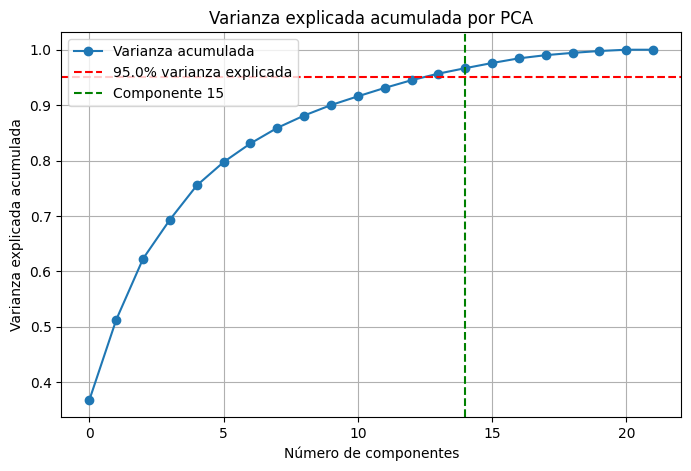

In [ ]:
# Cálculo de la varianza explicada acumulada
varianza_expl_acum = np.cumsum(pca.explained_variance_ratio_)

# Gráfica de la varianza explicada acumulada que corta según un porcentaje
umbral_varianza = 0.95
componentes = np.where(varianza_expl_acum >= umbral_varianza)[0][0] + 1

plt.figure(figsize=(8, 5))
plt.plot(varianza_expl_acum, marker='o', label='Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.axhline(y=umbral_varianza, color='r', linestyle='--', label=f'{umbral_varianza*100}% varianza explicada')
plt.axvline(x=componentes, color='g', linestyle='--', label=f'Componente {componentes+1}')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Inicializo PCA
pca = PCA()

# Ajusto PCA al primer conjunto
pca.fit(X_test_df_norm_y_estandar)

PCA()

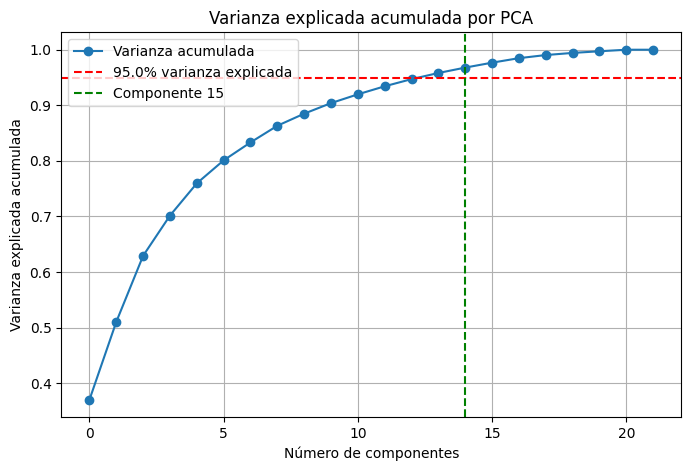

In [ ]:
# Cálculo de la varianza explicada acumulada
varianza_expl_acum = np.cumsum(pca.explained_variance_ratio_)

# Gráfica de la varianza explicada acumulada que corta según un porcentaje
umbral_varianza = 0.95
componentes = np.where(varianza_expl_acum >= umbral_varianza)[0][0] + 1

plt.figure(figsize=(8, 5))
plt.plot(varianza_expl_acum, marker='o', label='Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.axhline(y=umbral_varianza, color='r', linestyle='--', label=f'{umbral_varianza*100}% varianza explicada')
plt.axvline(x=componentes, color='g', linestyle='--', label=f'Componente {componentes+1}')
plt.legend()
plt.grid(True)
plt.show()

Para mantener el $95$% de la varianza explicada acumulada basta con mantener solo $15$ características. Por ello, se aplica PCA a cada dataframe, esperando obtener solo $15$ características.

In [ ]:
# Aplicar PCA a entrenamiento
pca = PCA(n_components=15)
X_train_df_tras_apc = pd.DataFrame(pca.fit_transform(X_train_df_norm_y_estandar))

# Aplicar PCA a test
pca = PCA(n_components=15)
X_test_df_tras_apc = pd.DataFrame(pca.fit_transform(X_test_df_norm_y_estandar))

Obsérvese que, efectivamente, cada conjunto tiene muestras de $15$ características.

In [ ]:
print("X_train_df preprocesado con ACP")
print(X_train_df_tras_apc.describe())

X_train_df preprocesado con ACP
                 0             1             2             3             4   \
count  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03   
mean  -3.456427e-17 -4.937754e-18  2.468877e-18  3.209540e-17 -3.641593e-17   
std    2.782206e+00  1.742669e+00  1.520279e+00  1.215813e+00  1.137965e+00   
min   -5.118599e+00 -5.434713e+00 -4.539967e+00 -4.192313e+00 -4.042125e+00   
25%   -2.703539e+00 -1.110009e+00 -8.925475e-01 -8.071381e-01 -5.888226e-01   
50%    2.551912e-02 -1.362932e-01 -1.278030e-01 -1.821138e-01 -3.946474e-02   
75%    2.590001e+00  1.015752e+00  7.881982e-01  5.628567e-01  6.452520e-01   
max    5.918709e+00  5.605438e+00  5.637161e+00  4.446770e+00  4.064545e+00   

                 5             6             7             8             9   \
count  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03  5.756000e+03   
mean   1.851658e-18 -3.332984e-17 -4.320534e-18 -5.554973e-18  9.566898e-18   
std    9.410056e-01

In [ ]:
print("X_test_df preprocesado con ACP")
print(X_test_df_tras_apc.describe())

X_test_df preprocesado con ACP
                 0             1            2             3             4   \
count  1.439000e+03  1.439000e+03  1439.000000  1.439000e+03  1.439000e+03   
mean  -5.925304e-17  1.481326e-17     0.000000  1.975101e-17 -3.086096e-17   
std    2.788743e+00  1.716352e+00     1.580929  1.232915e+00  1.104268e+00   
min   -5.175474e+00 -4.675642e+00    -4.779487 -3.261424e+00 -3.456589e+00   
25%   -2.561002e+00 -1.190986e+00    -0.901083 -8.152430e-01 -7.004625e-01   
50%   -3.490971e-01 -1.877849e-01    -0.065070 -2.589945e-01 -5.438786e-03   
75%    2.650890e+00  1.021807e+00     0.920103  6.545328e-01  6.028481e-01   
max    6.071055e+00  4.912433e+00     5.424175  4.073301e+00  4.168620e+00   

                 5             6             7             8             9   \
count  1.439000e+03  1.439000e+03  1.439000e+03  1.439000e+03  1.439000e+03   
mean  -1.234438e-17  6.665967e-17 -2.468877e-18 -3.703315e-17 -2.654043e-17   
std    9.321852e-01  8.235006

Nótese que la característica mencionada antes, que siempre valía igual, ha desaparecido. El resto de características eliminadas eran prescindibles para mantener el $95$% de varianza explicada acumulada, considerándose que no se pierde información si se sigue explicando tal valor de varianza.

Se vuelven a comprobar las nubes de puntos.

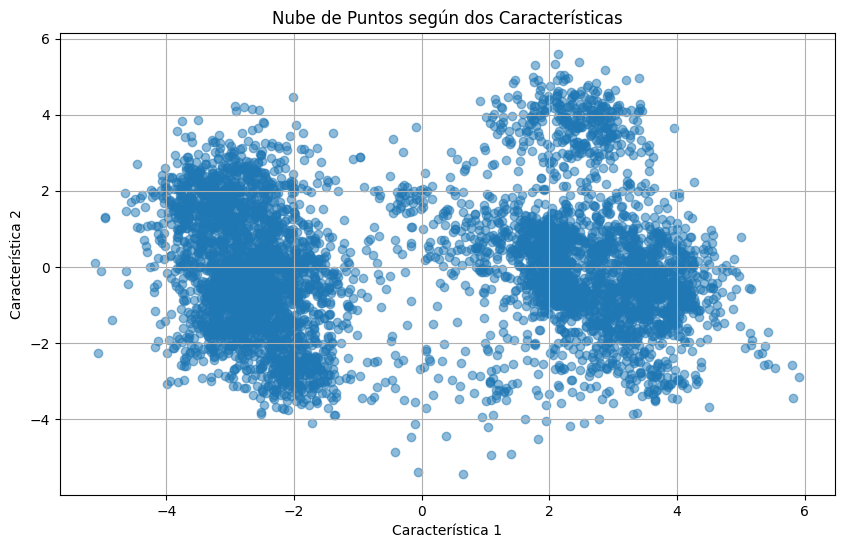

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_df_tras_apc.iloc[:, 0], X_train_df_tras_apc.iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

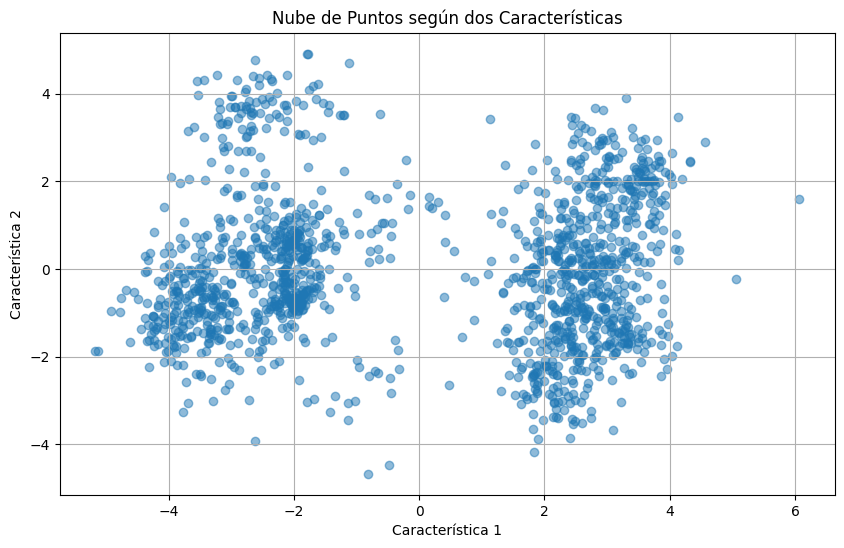

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_df_tras_apc.iloc[:, 0], X_test_df_tras_apc.iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

Pese a haber puntos que aún no se tendría muy claro si pertenecen a un clúster u otro, las nubes ahora son bastante más interpretables. Visualmente se estima que hay $3$ clústeres.

Cabe mencionar que las nubes entre un conjunto y otro no parecen compartir un patrón similar en cuanto a la posición (por ejemplo, la nube de puntos más densa en el primer conjunto parece ser trasladada mediante una simetría respecto un eje vertical en el segundo conjunto). Por ello, podría ocurrir que para algunos conjuntos los modelos de aprendizaje no supervisado puedan tener mejor comportamiento que para otros.

Para acabar el preprocesado, dado que las clases estaban bastante desbalanceadas, se aplica $oversampling$, en especial el método $SMOTE$ usado en la práctica anterior, pero al tratarse de un problema de clasificación, ya hay funciones en bibliotecas que lo hacen.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

Se aplica solo a entrenamiento porque se busca evitar el sesgo en esta fase.

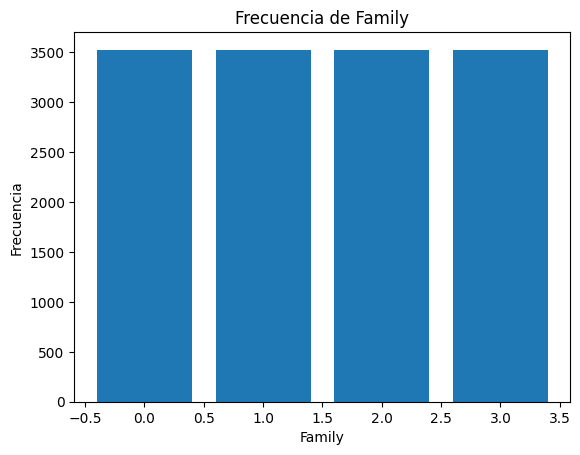

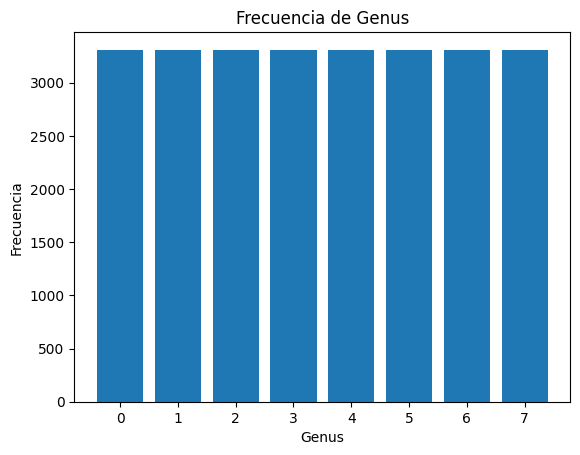

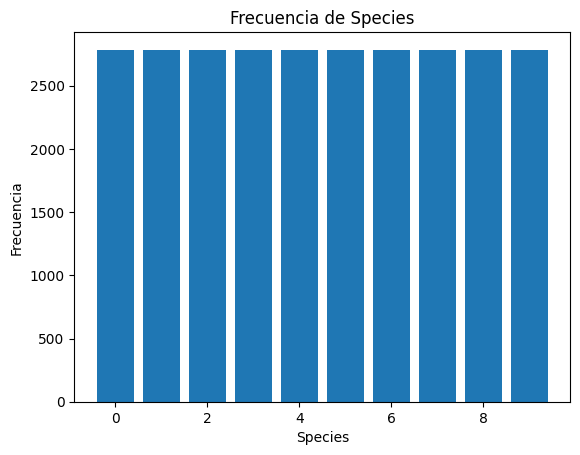

In [ ]:
# Inicializar SMOTE y el codificador de etiquetas
smote = SMOTE()
label_encoders = {}

# Diccionario para almacenar los resultados sobremuestreados
resampled_data = {}

# Columnas de etiquetas
label_columns = ['Family', 'Genus', 'Species']

for label in label_columns:
    # Codificar las etiquetas
    le = LabelEncoder()
    y_encoded = le.fit_transform(y_train[label])
    label_encoders[label] = le

    # Aplicar SMOTE
    X_resampled, y_resampled = smote.fit_resample(X_train_df_tras_apc, y_encoded)
    resampled_data[label] = (X_resampled, y_resampled)
  #  print(pd.DataFrame(y_resampled))
    frecs = pd.DataFrame(y_resampled)[0].value_counts()

    # Crear gráfico de frecuencias por etiqueta
    plt.bar(frecs.index,frecs.values)
    plt.xlabel(label)
    plt.ylabel('Frecuencia')
    plt.title(f'Frecuencia de {label}')
    plt.show()


Obsérvese que en general se ha balanceado más la distribución de las etiquetas. Para seguir trabajando, se necesita unir en un mismo conjunto.

In [ ]:
# Encontrar el tamaño máximo de los conjuntos sobremuestreados
max_size = max(len(data[0]) for data in resampled_data.values())

# Expandir X_train_df_tras_apc para coincidir con max_size si es necesario
X_expanded = pd.DataFrame(index=range(max_size))
X_expanded = X_expanded.join(X_train_df_tras_apc, how='left').fillna(method='ffill')

# Sincronizar las etiquetas sobremuestreadas con X_expanded
final_y_resampled = {label: label_encoders[label].inverse_transform(data[1]) for label, data in resampled_data.items()}

# Crear DataFrames de etiquetas que coincidan con X_expanded
for label in label_columns:
    y_size = len(final_y_resampled[label])
    extra_rows = max_size - y_size
    # Extender etiquetas usando 'ffill' si hay menos muestras que en X_expanded
    if extra_rows > 0:
        extended_labels = np.concatenate([final_y_resampled[label], np.full(extra_rows, final_y_resampled[label][-1])])
    else:
        extended_labels = final_y_resampled[label]
    final_y_resampled[label] = extended_labels

# Crear un único DataFrame para las etiquetas
y_combined = pd.DataFrame(final_y_resampled)

El procedimiento seguido para *oversampling* ha sido el siguiente:

1- Se parte del conjunto de características `X_train_df_tras_apc` y el conjunto multietiqueta `y_train`, con tres etiquetas o clases, por lo que se preparan para aplicar *SMOTE* (separar las etiquetas).

2- Uso de la clase *SMOTE* dada por la biblioteca *imbalanced-learn* para aplicar *oversampling*. La forma de trabajar de la clase es la razón por la que se separan las etiquetas.

3- Dado que las etiquetas ya han sido *oversampleadas*, se busca combinar los conjuntos de entrenamiento por etiqueta y las etiquetas *oversampleadas*. Para resolver esto, se expanden todas las estructuras de datos `X_resampled` al de mayor tamaño, rellenando los datos faltantes con cuidado, pues puede introducir sesgo.

Los hiperparámetros de *SMOTE* son:

- `sampling_strategy`: Determina la forma de hacer *oversampling*. Si es un número flotante se corresponde a la proporción deseada de la cantidad de muestras en la clase minoritaria sobre la cantidad de muestras en la clase mayoritaria tras el algoritmo. Si es una cadena, puede valer `minority` (aplica solo a la clase minoritaria), `not majority` (aplica a todas las clases menos la mayoritaria), `not minority` (igual que el anterior, pero no aplica a la minoritaria), `all` (aplica a todas las clases). Si es un diccionario, las claves son las clases mientras que los valores son las cantidades deseadas de muestras. Por defecto, se aplica el algoritmo a todos menos a la clase mayoritaria.

- `random_state`: Controla la aleatoriedad de los resultados. Por defecto a `None`.

- `k_neighbors`: Por defecto a $5$, es el número de vecinos más cercanos para generar los puntos sintéticos,

- `n_jobs`: Por defecto a `None` (solo usa un procesador), es el valor de la cantidad de procesadores a usar en la paralelización. Si vale $-1$ se usan todos los procesadores disponibles.

A continuación se ve la nueva situación.

In [ ]:
print("Nuevo X_train_df")
print(X_expanded.describe())

print("Nuevo y_train_df")
print(y_combined)

Nuevo X_train_df
                 0             1             2             3             4   \
count  27840.000000  27840.000000  27840.000000  27840.000000  27840.000000   
mean       3.408464     -2.331101      0.846720     -1.145898      2.235970   
std        2.151355      1.429750      0.815267      0.804882      1.253331   
min       -5.118599     -5.434713     -4.539967     -4.192313     -4.042125   
25%        4.296850     -2.938682      1.067410     -1.444566      2.818756   
50%        4.296850     -2.938682      1.067410     -1.444566      2.818756   
75%        4.296850     -2.938682      1.067410     -1.444566      2.818756   
max        5.918709      5.605438      5.637161      4.446770      4.064545   

                 5             6             7             8             9   \
count  27840.000000  27840.000000  27840.000000  27840.000000  27840.000000   
mean      -1.517028      0.491325      0.225539      0.491763     -0.290853   
std        0.884820      0.457017 

In [ ]:
X_train_df = X_expanded
y_train_df = y_combined

In [ ]:
print(X_train_df.iloc[:,0].describe())

count    27840.000000
mean         3.408464
std          2.151355
min         -5.118599
25%          4.296850
50%          4.296850
75%          4.296850
max          5.918709
Name: 0, dtype: float64


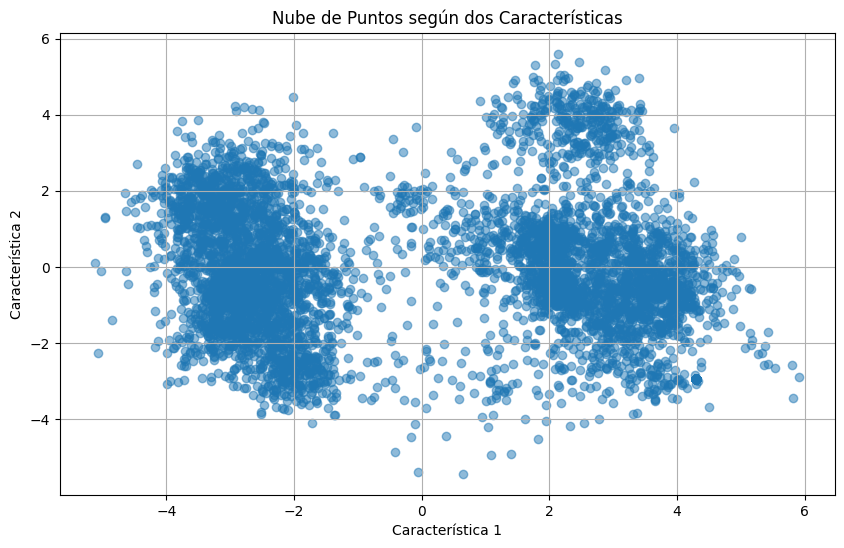

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

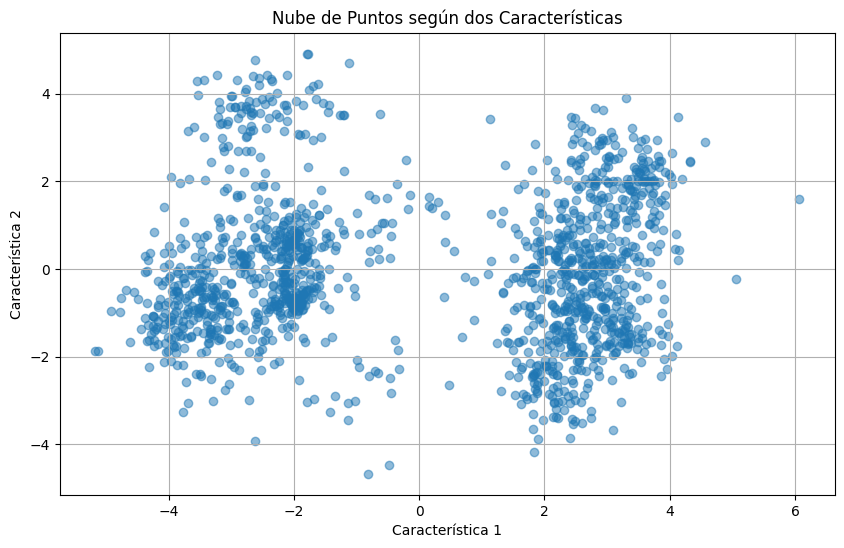

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_df_tras_apc.iloc[:, 0], X_test_df_tras_apc.iloc[:, 1], alpha=0.5)
plt.title('Nube de Puntos según dos Características')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.grid(True)
plt.show()

Tras aplicar $oversampling$, solo aumenta la cantidad de muestras. La distribución de los puntos por el espacio sigue siendo prácticamente idéntica, por lo que gráficamente se siguen distinguiendo $3$ clústeres.

Si se representa la nube con el resto de características, la distribución de los puntos no variaría en exceso.

Se está en condiciones de comenzar a elegir modelos para entrenar con los nuevos datos.

In [ ]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.cluster import AgglomerativeClustering,MeanShift # Otros algoritmos de clustering

A continuación se explican los algoritmos seleccionados que no son KMeans o DBSCAN (pues se explicó en el ejercicio anterior).

- AgglomerativeClustering: Clustering jerárquico que construye clústeres basándose en un enfoque "de abajo arriba". Inicialmente cada punto de datos se considera como clúster e iterativamente los pares de clústeres se fusionan según su distancia o similitud, hasta alcanzar el número deseado de clústeres. Es bastante útil para ver estructuras de datos jerárquicas y se puede adaptar a distintas definiciones de la distancia, dando flexibilidad en cómo se forman los clústeres. Los hiperparámetros de la implementación en `scikit-learn` son:

  - `n_cluster`: Número de clústeres buscados, por defecto a $2$.

  - `affinity`: Por defecto `euclidean`, es la métrica usada para calcular la matriz de distancias entre puntos. Puede tener valores como `euclidean`,`l1`,`l2`,`manhattan`,`cosine` o `precomputed` (si vale este último, se esperar que se proporcione la matriz de distancias).
  
  - `memory`: Por defecto a `None`, es opcional. Es útil cuando se tienen grandes conjuntos de datos y se ejecuta el algoritmo varias veces sobre el mismo conjunto de datos.

  - `connectivity`: Por defecto a `None`. Es la matriz de conectividad entre puntos. Si no se indica, el algoritmo asume que las conexiones entre datos siguen un grafo completamente conectado.

  - `compute_full_tree`: Por defecto a `auto`. Si vale `auto` y `n_clusters` es menor que el número de muestras entre $2$, no se calcula todo el árbol. Es una manera de optimizar y ahorrar tiempo.

  - `linkage`: Puede ser `ward` (por defecto), `complete`, `average` o `single`. Es el criterio de enlace a usar. Si es `warm` minimiza la suma de las diferencias cuadradas dentro de los clústeres, `complete` y `average` enlazan los clústeres en función de las distancias entre los clústeres más distantes o promedio de pares de clústeres, y `single` usa la mínima distancia entre pares de clústeres.


- MeanShift: Es un algoritmo de clustering basado en la densidad, identificando los clústeres como regiones de alta densidad (parecido a KMeans). Es un algoritmo iterativo que empieza en unos centroides iniciales y, haciendo la media, se van desplazando. Se diferencia de KMeans en el hiperparámetro principal, `bandwidth` (se explicará a continuación), además de tener una complejidad computacional mayor y no se necesita especificar el número de clústeres buscado. Se implementa en la clase `MeanShift` de scikit-learn. Los hiperparámetros son:

. `bandwidth`: Por defecto a `None`, es el hiperparámetro más importante. Define el radio del kernel usado en el proceso. Un mayor valor puede resultar en menor número de clústeres (cubre áreas más grandes al calcular la media de desplazamiento). Si se deja a `None`, la clase intenta estimar el valor más adecuado según los datos.

- `seeds`: Por defecto a `None`, son los puntos iniciales de los centroides. Si no se indica, todos los puntos de los datos se usan como centroides iniciales.

- `bin_seeding`: Por defecto a `False`, se usa para acelerar el algoritmo utilizando una cuadrícula discretizada para colocar los centroides iniciales. Puede afectar notablemente a la precisión del resultado final.

- `min_bin_freq`: A $1$ por defecto, es el número mínimo de puntos de datos que deben estar en la región para ser considerados como semillas iniciales si `bin_seeding=True`. Mayor valor de `min_bin_freq` puede implicar en reducir el número de semillas, pudiendo disminuir la precisión del modelo final pero aumentando la eficiencia.

- `cluster_all`: A `True` por defecto, determina si los puntos deben ser incluidos en algún clúster o si, por el contrario, al estar en puntos de baja densidad deben ser considerados como outliers. Si está a `False`, estos puntos son etiquetados con $-1$ en los resultados finales.

- `n_jobs`: Por defecto a `None`, es el número de hilos para ejecutar en paralelo. Si vale $-1$, todos los procesadores serán usados.

Antes de entrenar cada algoritmo, se define una función para evaluar el rendimiento de cada modelo.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

def validationModel(model,X,y_true=None):
  etiquetas = model.fit_predict(X)

  print("Evaluación de métricas propias de X")
  print("Silhouette Score:", silhouette_score(X, etiquetas) if len(set(etiquetas)) > 1 else "No aplicable")
  print("Calinski-Harabasz Index:", calinski_harabasz_score(X, etiquetas) if len(set(etiquetas)) > 1 else "No aplicable")
  print("Davies-Bouldin Score:", davies_bouldin_score(X, etiquetas) if len(set(etiquetas)) > 1 else "No aplicable")

  if y_true is not None:
    print("\nEvaluación de Métricas Extrínsecas:")
    print("Homogeneity:", homogeneity_score(y_true, etiquetas))
    print("Completeness:", completeness_score(y_true, etiquetas))
    print("V-Measure:", v_measure_score(y_true, etiquetas))
    print("Adjusted Rand Index:", adjusted_rand_score(y_true, etiquetas))
    print("Adjusted Mutual Information:", adjusted_mutual_info_score(y_true, etiquetas))
  else:
    print("\nNo se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.")

**KMeans**

Primero se buscan los mejores hiperparámetros para KMeans. En este caso, se busca el mejor número de clústeres.

In [ ]:
n_clusteres = [i for i in range(2,23)]
best_sc = -1
best_clust = -1

for clust in n_clusteres:
  kmeans = KMeans(n_clusters=clust, n_init=10)
  kmeans.fit(X_train_df)

  labels_train = kmeans.labels_
  sc = silhouette_score(X_train_df,labels_train)
  print(f'Silhouette score con {clust} clústeres: {sc}')
  if sc > best_sc:
    best_sc = sc
    best_clust = clust

print(f'Mejor hiperparámetros: n_clusters={best_clust}-->Silhouette Score:{best_sc}')

Silhouette score con 2 clústeres: 0.8430228537132295
Silhouette score con 3 clústeres: 0.8561077259455083
Silhouette score con 4 clústeres: 0.8351443821052987
Silhouette score con 5 clústeres: 0.8376738294247086
Silhouette score con 6 clústeres: 0.8416919982619222
Silhouette score con 7 clústeres: 0.8457631048073423
Silhouette score con 8 clústeres: 0.8455634045444494
Silhouette score con 9 clústeres: 0.8374839087349466
Silhouette score con 10 clústeres: 0.8353164458612256
Silhouette score con 11 clústeres: 0.8358068922542644
Silhouette score con 12 clústeres: 0.8343588309269772
Silhouette score con 13 clústeres: 0.8353868199195343
Silhouette score con 14 clústeres: 0.833693466673143
Silhouette score con 15 clústeres: 0.8353497219990248
Silhouette score con 16 clústeres: 0.8360631579228857
Silhouette score con 17 clústeres: 0.837160831354845
Silhouette score con 18 clústeres: 0.8338274721194882
Silhouette score con 19 clústeres: 0.8344890182964713
Silhouette score con 20 clústeres: 0.8

Con los resultados anteriores (mejor Silhouette Score en entrenamiento), se ajusta un modelo KMeans y se valida.

In [ ]:
mejor_clust = 3
best_kmeans = KMeans(n_clusters=mejor_clust,n_init=10)
print("El mejor modelo es: ")
print(best_kmeans)
best_kmeans.fit(X_train_df)

El mejor modelo es: 
KMeans(n_clusters=3, n_init=10)


KMeans(n_clusters=3, n_init=10)

El número de clústeres buscado va desde $2$ hasta $22$. No tendría sentido un clúster dado que se busca distinguir, y el máximo es $22$ porque se ha contado dicho número de clases distintas (aunque luego puedan aparecer combinadas, dado a que el problema es multietiqueta).

Como se puede ver, el mejor modelo (tras $10$ ejecuciones de cada caso) es el de $3$ clústeres. Puede tener sentido, pues los estadísticos en función de cada combinación de etiquetas varían bastante, lo que hace que cada nube de puntos se asocie a una posible combinación, y el centro de cada clúster se encuentre dentro de dicha nube. Sin embargo, puede guardar cierta relación con que el problema sea de clasificación de tuplas de $3$ dimensiones.

Los centroides calculados son

In [ ]:
print(best_kmeans.cluster_centers_)

[[ 2.54894523e+00  4.27217682e-01 -2.10761939e-01 -4.29837826e-03
  -2.97273151e-01  1.56689148e-01 -5.02332602e-02 -4.89902167e-02
   1.56819659e-02  2.41664892e-03  2.28441180e-03 -1.12758296e-02
  -4.93639641e-03  2.79519329e-02 -2.45905384e-02]
 [ 4.28479012e+00 -2.93054852e+00  1.07851443e+00 -1.43393515e+00
   2.81160604e+00 -1.90012661e+00  6.17797842e-01  2.81823390e-01
   6.12569101e-01 -3.61342929e-01 -2.02065068e-01  1.03116191e+00
   7.57961077e-01  1.37993915e-01  4.99955957e-01]
 [-2.65421160e+00 -1.58805489e-01 -1.54772749e-03  6.51275804e-02
   4.48562849e-02 -4.76767707e-02 -3.74958334e-03  3.57145835e-02
  -1.86306152e-02 -7.12869522e-03  4.21047257e-03 -1.24601011e-03
   6.52020246e-03 -2.90682959e-02  1.22888706e-02]]


Las coordenadas son distantes entre los centroides, por lo que parece que los puntos de una misma multiclase forman una nube, explicando el valor del número óptimo de clústeres.

Finalmente, se evalua el modelo.

In [ ]:
validationModel(best_kmeans,X_train_df)

Evaluación de métricas propias de X
Silhouette Score: 0.8561077259531723
Calinski-Harabasz Index: 47641.195222531416
Davies-Bouldin Score: 1.0704083349984017

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


In [ ]:
validationModel(best_kmeans,X_test_df_tras_apc)

Evaluación de métricas propias de X
Silhouette Score: 0.3089006749489042
Calinski-Harabasz Index: 526.7426343892682
Davies-Bouldin Score: 1.8288816159633339

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


Aunque algunas de las propiedades de los clústeres parecen ser buenas (relativo alto valor de Calinski-Harabasz, que indica la relación entre la dispersión entre clústeres y la dispersión total, o relativo bajo valor de Davies-Bouldin, que mide la dispersión media dentro de un clúster y la distancia entre clústeres). Son aquellas dadas por:

- Calinski-Harabasz:
$$CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{n-k}{k-1}$$
    - $Tr(B_k)$: Traza de la matriz de dispersión entre clústeres.
    
    - $Tr(W_k)$: Traza de la matriz de dispersión dentro de los clústeres.

    - $n$: Número total de muestras.

    - $k$: Número de clústeres.

A mayor valor, mayor valor tiene $Tr(B_k)$, por lo que los clústeres están densamente agrupados y bien separados entre si.

- Davies-Bouldin:
$$DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)$$
    - $\sigma_i$: Dispersión del clúster $i$.
    - $d_{ij}$: Distancia entre los centros de los clústeres $i$, $j$.
    - k: Número de clústeres.

A menor valor, entonces menor valor tiene $\sigma_i + \sigma_j$ para todo $i \neq j$, luego los clústeres estarán mejor formados, dando a entender que los clústeres son más compactos y están bien separados.

Respecto a los resultados, se observa que Silhouette Score en validación es bastante menor que en entrenamiento, sugiriendo que el modelo tiende a "sobreajustarse" al conjunto de entrenamiento (no generaliza bien a datos distintos, o no para los hiperparámetros buscados según cierto conjunto). El resto de propiedades medidas por las demás métricas también da a entender que la capacidad de generalización del modelo no es buena, pues la diferencia de valores entre entrenamiento y test (o un conjunto y otro conjunto) es bastante grande.

**DBSCAN**

Se hará la selección de hiperparámetros, justificando su elección, de forma experimental

In [ ]:
epsilons = [0.01,0.02,0.08,0.1,0.3,0.5,0.7,1.0]
min_vecinos = [10,20,30,40,50,60,100]
best_score = -1
best_eps = None
best_min_samples = None

for eps in epsilons:
  for min_neighbors in min_vecinos:
    dbscan = DBSCAN(eps=eps,min_samples=min_neighbors)
    clusters = dbscan.fit_predict(X_train_df)

    unique_clusters = set(clusters)
    if -1 in unique_clusters:
      unique_clusters.remove(-1)

    n_clusters = len(unique_clusters)
    n_noise = list(clusters).count(-1)
    # Evaluación del modelo para más de un clúster
    if n_clusters > 1 and n_noise < len(clusters):
      score = silhouette_score(X_train_df[clusters != -1],clusters[clusters != -1])
      print(f'eps: {eps}, min_samples: {min_neighbors}, Silhouette Score: {score:.4f}')

      # Almacenar mejor resultado
      if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_neighbors
    else:
      print(f'eps: {eps}, min_samples: {min_neighbors}, no válido para Silhouette Score')

print(f'Hiperparámetros del mejor modelo. Eps: {best_eps}, min_samples: {best_min_samples}. Silhouette Score asociado: {best_score}')

eps: 0.01, min_samples: 10, no válido para Silhouette Score
eps: 0.01, min_samples: 20, no válido para Silhouette Score
eps: 0.01, min_samples: 30, no válido para Silhouette Score
eps: 0.01, min_samples: 40, no válido para Silhouette Score
eps: 0.01, min_samples: 50, no válido para Silhouette Score
eps: 0.01, min_samples: 60, no válido para Silhouette Score
eps: 0.01, min_samples: 100, no válido para Silhouette Score
eps: 0.02, min_samples: 10, no válido para Silhouette Score
eps: 0.02, min_samples: 20, no válido para Silhouette Score
eps: 0.02, min_samples: 30, no válido para Silhouette Score
eps: 0.02, min_samples: 40, no válido para Silhouette Score
eps: 0.02, min_samples: 50, no válido para Silhouette Score
eps: 0.02, min_samples: 60, no válido para Silhouette Score
eps: 0.02, min_samples: 100, no válido para Silhouette Score
eps: 0.08, min_samples: 10, no válido para Silhouette Score
eps: 0.08, min_samples: 20, no válido para Silhouette Score
eps: 0.08, min_samples: 30, no válido 

DBSCAN se ajusta con los mejores hiperparámetros encontrados y se visualiza la distribución de dos características para entender cómo podría ser la agrupación.

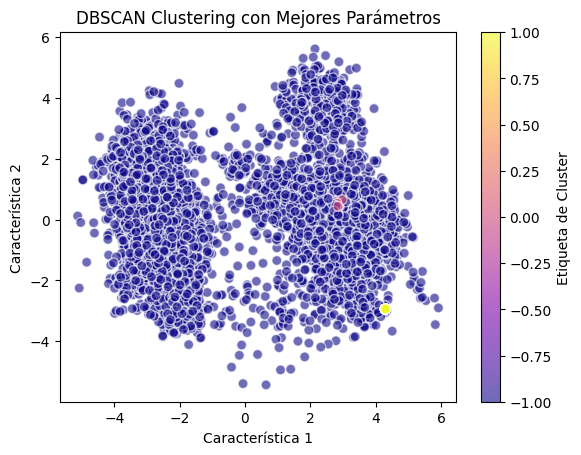

In [ ]:
best_eps = 0.5
best_min_samples = 30

dbscan = DBSCAN(eps=best_eps,min_samples=best_min_samples)
train_labels = dbscan.fit_predict(X_train_df)

plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], c=train_labels, cmap='plasma', s=50, alpha=0.6, edgecolors='w')
plt.title("DBSCAN Clustering con Mejores Parámetros")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.colorbar(label='Etiqueta de Cluster')
plt.show()

Gráficamente se observa que el algoritmo es incapaz de asignar una cantidad considerable de puntos a un clúster, incluso cuando algunas separaciones se podrían hacer (como las dos nubes de puntos en torno a $característica1 = 0$, o la nube de la derecha en torno a $característica2 = 2$). Por ello, aunque las métricas puedan ser buenas, el modelo parece no capturar las relaciones entre los puntos.

Como nota adicional, la cantidad de clústeres que se formarían visualmente con esta representación coincide con el número de clústeres que da mejores métricas en KMeans.

In [ ]:
dbscan = DBSCAN(eps=best_eps,min_samples=best_min_samples)
validationModel(dbscan,X_test_df_tras_apc)

Evaluación de métricas propias de X
Silhouette Score: No aplicable
Calinski-Harabasz Index: No aplicable
Davies-Bouldin Score: No aplicable

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


Obsérvese que aunque para los valores seleccionados de épsilon y número de vecinos en un conjunto sí se ha podido evaluar la métrica de Silhouette Score, en el segundo conjunto el algoritmo no ha podido asignar ningún punto a ningún clúster (por ello no se puede calcular Silhouette Score). Los resultados dados en el primer conjunto dan a entender que el algoritmo está "sobreajustándose" en exceso, por lo que se puede entender que sea incapaz de generalizar a otros datos. Sin embargo, se tratará de volver a evaluar las métricas haciendo una combinación entre ambos conjuntos, y se comprobará qué ocurre.

In [ ]:
X_combined = np.vstack((X_train_df, X_test_df_tras_apc))

dbscan = DBSCAN(eps=best_eps,min_samples=best_min_samples)
validationModel(dbscan,X_combined)

Evaluación de métricas propias de X
Silhouette Score: 0.7314947857776073
Calinski-Harabasz Index: 24562.2982767307
Davies-Bouldin Score: 1.0712380348852395

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


Los resultados arrojados dan a entender que el algoritmo dará buenas métricas en función de los datos dados. De Silhouette Score, teniendo en cuenta que los hiperparámetros son siempre los mismos, se desprende que el valor se obtiene del primer conjunto de entrenamiento, y el restante es por la existencia de valores del segundo conjunto. Por ello, para este problema el algoritmo DBSCAN no es un buen modelo para entender la relación entre los datos, pues gracias a haber separado en dos conjuntos, se ha obtenido que el algoritmo es muy bueno para unos datos y muy malo para otros datos, hecho que no se hubiese comprobado si se hubiese usado todo el conjunto, tal y como se ha hecho en el código anterior.

**Agglomerative Clustering**

In [ ]:
n_clusters = [i for i in range(2,23)]
affinities = ['euclidean','l1','l2','manhattan']
linkages = ['ward','complete','average','single']

scores = {}

for n in n_clusters:
    for affinity in affinities:
        for linkage in linkages:
            # 'ward' solo funciona con 'euclidean'
            if linkage == 'ward' and affinity != 'euclidean':
                continue
            model = AgglomerativeClustering(n_clusters=n, affinity=affinity, linkage=linkage)
            labels = model.fit_predict(X_train_df)
            # Solo calcular el score si hay más de un cluster y menos de todos en un solo cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_train_df, labels)
                scores[(n, affinity, linkage)] = score
                print(f"n_clusters={n}, affinity={affinity}, linkage={linkage}, Silhouette Score: {score:.2f}")
            else:
                scores[(n, affinity, linkage)] = -1
                print(f"n_clusters={n}, affinity={affinity}, linkage={linkage}, no se puede calcular Silhouette Score.")

# Encuentra la mejor configuración basada en Silhouette Score
best_setting = max(scores, key=scores.get)
best_score = scores[best_setting]
print(f"Best setting: n_clusters={best_setting[0]}, affinity={best_setting[1]}, linkage={best_setting[2]} con Silhouette Score: {best_score:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=euclidean, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=euclidean, linkage=single, Silhouette Score: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l1, linkage=average, Silhouette Score: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l1, linkage=single, Silhouette Score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l2, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=l2, linkage=single, Silhouette Score: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=manhattan, linkage=average, Silhouette Score: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=2, affinity=manhattan, linkage=single, Silhouette Score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=euclidean, linkage=ward, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=euclidean, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=euclidean, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=euclidean, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l1, linkage=complete, Silhouette Score: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l1, linkage=average, Silhouette Score: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l1, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l2, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l2, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=l2, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=manhattan, linkage=complete, Silhouette Score: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=manhattan, linkage=average, Silhouette Score: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=3, affinity=manhattan, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=euclidean, linkage=complete, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=euclidean, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=euclidean, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l1, linkage=complete, Silhouette Score: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l1, linkage=average, Silhouette Score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l1, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l2, linkage=complete, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l2, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=l2, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=manhattan, linkage=complete, Silhouette Score: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=manhattan, linkage=average, Silhouette Score: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=4, affinity=manhattan, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=euclidean, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=euclidean, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=euclidean, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l1, linkage=complete, Silhouette Score: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l1, linkage=average, Silhouette Score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l1, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l2, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l2, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=l2, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=manhattan, linkage=complete, Silhouette Score: 0.77


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=manhattan, linkage=average, Silhouette Score: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=5, affinity=manhattan, linkage=single, Silhouette Score: 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=euclidean, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=euclidean, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=euclidean, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l1, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l1, linkage=average, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l1, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l2, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l2, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=l2, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=manhattan, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=manhattan, linkage=average, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=6, affinity=manhattan, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=euclidean, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=euclidean, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l1, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l1, linkage=average, Silhouette Score: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l1, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l2, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=l2, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=manhattan, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=manhattan, linkage=average, Silhouette Score: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=7, affinity=manhattan, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=euclidean, linkage=complete, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=euclidean, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l1, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l1, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l2, linkage=complete, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=l2, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=manhattan, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=8, affinity=manhattan, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=euclidean, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l1, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=l2, linkage=single, Silhouette Score: 0.60


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=9, affinity=manhattan, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=euclidean, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l1, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=l2, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=10, affinity=manhattan, linkage=single, Silhouette Score: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=11, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=euclidean, linkage=ward, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=euclidean, linkage=complete, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l1, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l2, linkage=complete, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=manhattan, linkage=complete, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=12, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=euclidean, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l2, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=13, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=euclidean, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l2, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=14, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=15, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=euclidean, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l1, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l2, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=16, affinity=manhattan, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=euclidean, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l1, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l1, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l2, linkage=average, Silhouette Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=manhattan, linkage=average, Silhouette Score: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=17, affinity=manhattan, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=euclidean, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l1, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=l2, linkage=single, Silhouette Score: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=18, affinity=manhattan, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=euclidean, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l1, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l1, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=l2, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=manhattan, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=19, affinity=manhattan, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=euclidean, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l1, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l1, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=l2, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=manhattan, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=20, affinity=manhattan, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=euclidean, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l1, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l1, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l1, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=l2, linkage=single, Silhouette Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=manhattan, linkage=complete, Silhouette Score: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=manhattan, linkage=average, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=21, affinity=manhattan, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=euclidean, linkage=ward, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=euclidean, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=euclidean, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=euclidean, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l1, linkage=complete, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l1, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l1, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l2, linkage=complete, Silhouette Score: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l2, linkage=average, Silhouette Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=l2, linkage=single, Silhouette Score: 0.49


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=manhattan, linkage=complete, Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=manhattan, linkage=average, Silhouette Score: 0.81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


n_clusters=22, affinity=manhattan, linkage=single, Silhouette Score: 0.49
Best setting: n_clusters=3, affinity=euclidean, linkage=ward con Silhouette Score: 0.85


Tras varias ejecuciones, se observa que el mejor modelo (mayor Silhouette Score, además de más simple) es aquel con los hiperparámetros `n_clusters=3`, `affinity='euclidean'` y `linkage='ward'`. Esto es una prueba de que no necesariamente un modelo complejo va a dar mejores resultados: para solo $3$ clústeres, obtenido de un rango de $2$ a $23$ (este rango se ha justificado anteriormente), usando como métrica la distancia euclídea, y forma de calcular la distancia entre clústeres (método Ward), en que se minimiza la varianza, se ha obtenido un mejor Silhouette Score. Modelos más complejos han dado resultados similares, pero este es mejor por suponer menor gasto computacional.

Obsérvese además que, para el conjunto de número de clústeres que se ha usado, los mejores resultados vienen dados por $3$ clústeres, coincidiendo con el número óptimo de clústeres en KMeans y con el número de clústeres extraidos de la interpretación gráfica de la nube de puntos.

In [ ]:
mejor_n = 3
mejor_affinity = 'euclidean'
mejor_linkage='ward'

ag = AgglomerativeClustering(n_clusters=mejor_n, affinity=mejor_affinity, linkage=mejor_linkage)

Ahora se validará el modelo en sendos conjuntos.

In [ ]:
validationModel(ag,X_train_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Evaluación de métricas propias de X
Silhouette Score: 0.8542960691078797
Calinski-Harabasz Index: 46182.45161468041
Davies-Bouldin Score: 1.095285537103792

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


In [ ]:
validationModel(ag,X_test_df_tras_apc)

Evaluación de métricas propias de X
Silhouette Score: 0.3393849469423237
Calinski-Harabasz Index: 522.7562125939454
Davies-Bouldin Score: 1.2010920214928877

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


De los presentes resultados, el primero que llama la atención es el Silhouette Score. Es bastante menor en test que en entrenamiento, lo que da a entender que el modelo, para el conjunto de datos en particular, no está generalizando bien para los hiperparámetros del primer conjunto.

El resto de métricas parecen indicar que las propiedades de relación entre la dispersión de los clústeres y la total (Calinski-Harabasz) y la similitud media de cada clúster con el que más se le asemeja (Davies-Bouldin) son buenas si solo se observase el conjunto de test. Si se hacen las comparaciones oportunas con las métricas en el conjunto de entrenamiento, se puede observar que el modelo explica mejor unos datos que otros, lo cual no es deseable.

**MeanShift**

Como el ancho de banda representa el radio de una bola en el espacio de características, se opta por calcular la media de cada característica y aplicar un valor absoluto.

In [ ]:
bandwidths = np.linspace(X_train_df.min(),X_train_df.max(),num=20)

best_score = -1
best_bandwidth = None

for bandwidth in bandwidths:
  print("Bandwith mean: "+str(abs(np.mean(bandwidth))))
  clustering = MeanShift(bandwidth=abs(np.mean(bandwidth)))
  labels = clustering.fit_predict(X_train_df)

  if len(set(labels)) > 1:
    score = silhouette_score(X_train_df,labels)
    if score > best_score:
      best_score = score
      best_bandwidth = abs(np.mean(bandwidth))

print("-----------------------------------------------------------------------------------------------------")

print(f"Best Bandwidth: {best_bandwidth}. Silhouette Score: {best_score}")

Bandwith mean: 3.7143970283040932
Bandwith mean: 3.283982638935838
Bandwith mean: 2.8535682495675827
Bandwith mean: 2.423153860199328
Bandwith mean: 1.9927394708310733
Bandwith mean: 1.5623250814628185
Bandwith mean: 1.1319106920945632
Bandwith mean: 0.7014963027263083
Bandwith mean: 0.2710819133580535
Bandwith mean: 0.15933247601020145
Bandwith mean: 0.5897468653784562
Bandwith mean: 1.0201612547467112
Bandwith mean: 1.4505756441149664
Bandwith mean: 1.8809900334832208
Bandwith mean: 2.311404422851476
Bandwith mean: 2.741818812219731
Bandwith mean: 3.1722332015879857
Bandwith mean: 3.6026475909562397
Bandwith mean: 4.033061980324495
Bandwith mean: 4.46347636969275
-----------------------------------------------------------------------------------------------------
Best Bandwidth: 3.7143970283040932. Silhouette Score: 0.8279428508032746


Se escoge el ancho de banda medio que mejor Silhouette Score da.

In [ ]:
best_bandwidth = 3.7143970283040932
MS = MeanShift(bandwidth=best_bandwidth)
best_labels = MS.fit_predict(X_train_df)

Visualización según las dos primeras características.

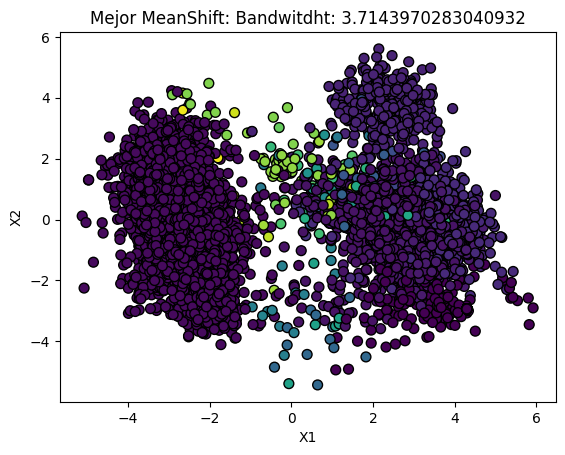

In [ ]:
plt.scatter(X_train_df.iloc[:, 0], X_train_df.iloc[:, 1], c=best_labels, cmap='viridis', edgecolor='k', s=50)
plt.title(f"Mejor MeanShift: Bandwitdht: {best_bandwidth}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

En primer lugar, gráficamente la asignación de clústeres es bastante inusual: asigna puntos distantes al mismo clúster y los puntos en medio de ellos a un clúster distinto. No parece ser un buen modelo para el problema enfrentado.

In [ ]:
validationModel(MS,X_train_df)

Evaluación de métricas propias de X
Silhouette Score: 0.827942868945434
Calinski-Harabasz Index: 3688.3555619752756
Davies-Bouldin Score: 1.5149854495341337

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


In [ ]:
validationModel(MS,X_test_df_tras_apc)

Evaluación de métricas propias de X
Silhouette Score: 0.19327929263458057
Calinski-Harabasz Index: 80.33703756476103
Davies-Bouldin Score: 1.0512205604341416

No se proporcionaron etiquetas verdaderas para evaluar métricas extrínsecas.


Respecto a las métricas, ocurre lo mismo que con el resto de modelos. En el primer conjunto los resultados son bastante buenos (si se observa la métrica de Silhouette Score, que se compara con su límite máximo $100$). Por el contrario, en el segundo conjunto la diferencia con las métricas del primer conjunto son incluso más distantes que en KMeans o Agglomerative Clustering, siendo MeanShift incluso peor modelo por solo tener la capacidad de explicar unos datos mejor que otros (aunque mejor que DBSCAN, que no puede asignar a ningún clúster ciertos datos).

**Resumen.**

Para resolver el problema se ha hecho uso de $4$ modelos:

- KMeans: Sus mejores hiperparámetros son el número de clústeres a $3$ (el resto por defecto). Su capacidad de generalizar a otros datos no es muy buena.

- DBSCAN: Sus mejores hiperparámetros son un épsilon de $0.5$ y número de vecinos a $30$, con el resto por defecto. Con estos valores, es muy bueno en algunos conjuntos, pero incapaz de hacer asignaciones para otros. Si se observan los valores de las métricas, puede parecer que para cada conjunto hay valores mejores que otros, que no permiten siquiera asignar ningún clúster. Esto no es deseable para modelos predictivos. Sin embargo, gráficamente se observó que, aunque para el primer conjunto diese buenas métricas, asignaba un número muy pequeño de puntos a algún clúster,

- Agglomerative Clustering: Aunque evaluando Silhouette Score pueda parecer que la situación es similar a KMeans, el resto de métricas son ligeramente mejores (hay menor diferencia entre los valores de los dos conjuntos). Aunque se ha hecho un estudio para tres hiperparámetros, el más importante que es el número de clústeres, es $3$ (igual que en KMeans).

- MeanShift: Se han estudiado varios valores para el ancho de banda medio óptimo según los valores de las características del conjunto. Silhouette Score y la métrica de Davies-Bouldin tienen resultados peores que Agglomerative Clustering, pero la métrica de Calinski-Harabasz presenta una diferencia menor (aunque un valor menor que Agglomerative Clustering en el segundo conjunto).


Tras los expuesto anteriormente, parece intuirse que los mejores modelos sean Agglomerative Clustering y MeanShift. Sin embargo, el empate se rompe en favor de **Agglomerative Clustering**. Además, de presentar Silhouette Score mejor (y una diferencia menor que la de MeanShift), la métrica que tenía menor diferencia en MeanShift (Calinski-Harabasz) solo da a entender que no hay tanta diferencia en la densidad de clústeres, siendo mejor esta propiedad en Agglomerative Clustering por dar mayores valores.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [ ]:
!pip install pyod

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

0         1         2         3         4         5
0  2.396090  2.092611  2.073392  1.988262  1.953473  2.450997
1  1.631040  1.746182  1.898050  2.380148  1.967332  1.858916
2  1.824683  2.131412  2.028829  1.703454  2.502966  2.119108
3  2.106098  2.165173  2.340826  2.170109  1.749139  1.678661
4  1.829647  1.775596  1.829438  2.054768  1.577190  1.594549

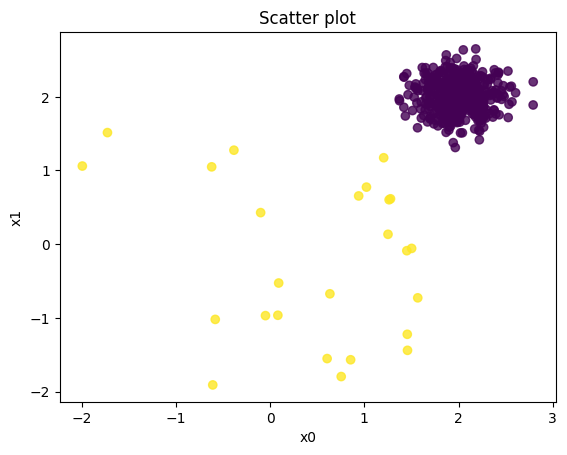

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [ ]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.768822919360872e-15
The training data: {0: 475, 1: 25}
The training data: {0: 473, 1: 27}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [ ]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

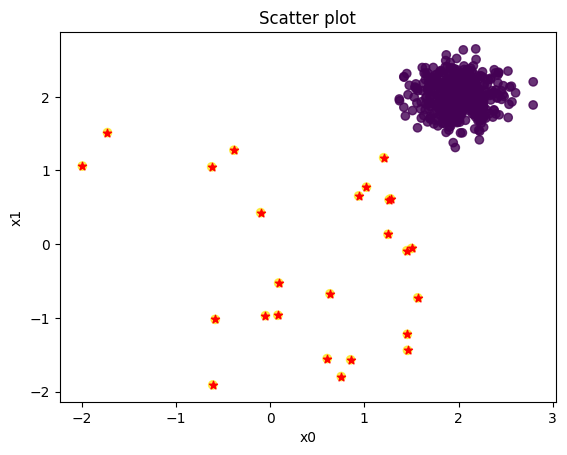

In [ ]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [ ]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [ ]:
isft_vi = isft.feature_importances_
isft_vi

array([0.16316205, 0.13513838, 0.16511349, 0.18192033, 0.14952662,
       0.20513912])

In [ ]:
np.sum(isft_vi)

1.0

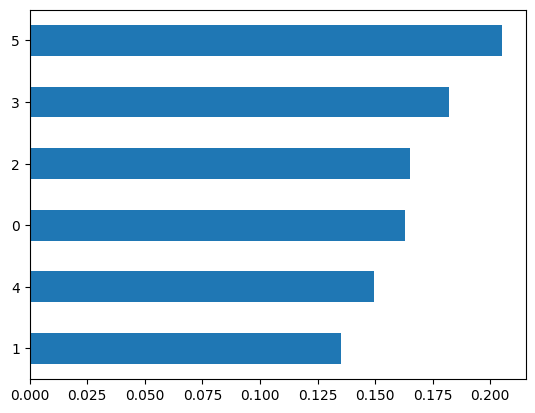

In [ ]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

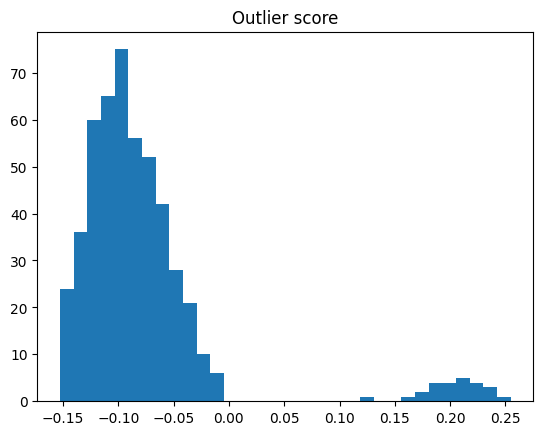

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [ ]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

Group  Count  Count %      0      1      2      3      4      5  \
0   Normal    475     95.0  2.003  2.011  2.006  1.991  2.008  1.985   
1  Outlier     25      5.0  0.454 -0.209 -0.475 -0.231 -0.035 -0.056   

   Anomaly_Score  
0         -0.092  
1          0.204

In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

Group  Count  Count %      0      1      2      3      4     5  \
0   Normal    473     94.6  2.015  2.015  2.010  1.989  2.007  2.00   
1  Outlier     27      5.4  0.180 -0.377 -0.052  0.078  0.080  0.29   

   Anomaly_Score  
0          -0.09  
1           0.19

In [ ]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [ ]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred      0   1
Actual         
0.0     475   0
1.0       0  25

### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

In [ ]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [ ]:
df

0    1    2   3   4    5    6   7   8    9   ...   26   27  28   29  \
0     92  115  120  94  84  102  106  79  84  102  ...  134  104  88  121   
1     84  102  106  79  84  102  102  83  80  102  ...  128  100  84  107   
2     84  102  102  83  80  102  102  79  84   94  ...  113   87  84   99   
3     80  102  102  79  84   94  102  79  80   94  ...  104   79  84   99   
4     84   94  102  79  80   94   98  76  80  102  ...  104   79  84  103   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ...  ...  ...  ...  ..  ...   
6430  60   83   96  85  64   87  100  88  64   83  ...  104   92  66   87   
6431  64   79  100  85  56   71   96  85  56   68  ...  100   85  66   83   
6432  56   68   91  81  56   64   91  81  53   64  ...  100   81  59   87   
6433  56   68   87  74  60   71   91  81  60   64  ...   96   74  59   83   
6434  60   71   91  81  60   64  104  99  56   64  ...   92   74  59   83   

       30   31  32   33   34  35  
0     128  100  84  107  113  87  
1     113   87  84   99  104  79  
2     104   79  84   99  104  79  
3     104   79  84  103  104  79  
4     104   79  79  107  109  87  
...   ...  ...  ..  ...  ...  ..  
6430  108   89  63   83  104  85  
6431  100   85  63   83  100  81  
6432   96   81  63   83   92  74  
6433   92   74  59   83   92  70  
6434   92   70  63   79  108  92  

[6435 rows x 36 columns]

**Análisis exploratorio de datos**

In [ ]:
print(df.describe())

                0            1            2            3            4   \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     69.400000    83.594872    99.290598    82.592696    69.150272   
std      13.605871    22.882234    16.645944    18.897674    13.561197   
min      39.000000    27.000000    53.000000    33.000000    39.000000   
25%      60.000000    71.000000    85.000000    69.000000    60.000000   
50%      68.000000    87.000000   101.000000    81.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   104.000000   

                5            6            7            8            9   ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     83.243512    99.110645    82.497125    68.912354    82.893085  ...   
std      22.886495    16.664088    18.940923    13.470599    22.862255  ...   
min      27.00000

El presente problema para detectar outliers cuenta con un total de $6435$ muestras, con $36$ características cada una. Gracias a `.describe()` se puede empezar a intuir si algunas características en las muestras tienen algún valor anómalo. Basta observar el tercer cuartil y el máximo para pensar que algunos outliers presentes pueden deberse a características como la $7$ o la $27$, pues la diferencia entre el dato que deja por debajo al $75$% de los valores y el máximo de estos es mayor. De igual manera, características como la $35$ presentan un primer cuartil y mínimo con mayor distancia que otras características.



Ahora se verá el tipo de dato de las características.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6435 non-null   uint8
 1   1       6435 non-null   uint8
 2   2       6435 non-null   uint8
 3   3       6435 non-null   uint8
 4   4       6435 non-null   uint8
 5   5       6435 non-null   uint8
 6   6       6435 non-null   uint8
 7   7       6435 non-null   uint8
 8   8       6435 non-null   uint8
 9   9       6435 non-null   uint8
 10  10      6435 non-null   uint8
 11  11      6435 non-null   uint8
 12  12      6435 non-null   uint8
 13  13      6435 non-null   uint8
 14  14      6435 non-null   uint8
 15  15      6435 non-null   uint8
 16  16      6435 non-null   uint8
 17  17      6435 non-null   uint8
 18  18      6435 non-null   uint8
 19  19      6435 non-null   uint8
 20  20      6435 non-null   uint8
 21  21      6435 non-null   uint8
 22  22      6435 non-null   uint8
 23  23      6435 

Todos los datos son numéricos, por lo que no hay que hacer ningún cambio.

In [ ]:
print(df.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
dtype: int64


Con esta ejecución, se observa que tampoco hay valores perdidos que tratar.

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, ...,
        <Axes: xlabel='33', ylabel='0'>, <Axes: xlabel='34', ylabel='0'>,
        <Axes: xlabel='35', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, ...,
        <Axes: xlabel='33', ylabel='1'>, <Axes: xlabel='34', ylabel='1'>,
        <Axes: xlabel='35', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, ...,
        <Axes: xlabel='33', ylabel='2'>, <Axes: xlabel='34', ylabel='2'>,
        <Axes: xlabel='35', ylabel='2'>],
       ...,
       [<Axes: xlabel='0', ylabel='33'>, <Axes: xlabel='1', ylabel='33'>,
        <Axes: xlabel='2', ylabel='33'>, ...,
        <Axes: xlabel='33', ylabel='33'>,
        <Axes: xlabel='34', ylabel='33'>,
        <Axes: xlabel='35', ylabel='33'>],
       [<Axes: xlabel='0', ylabel='34'>, <

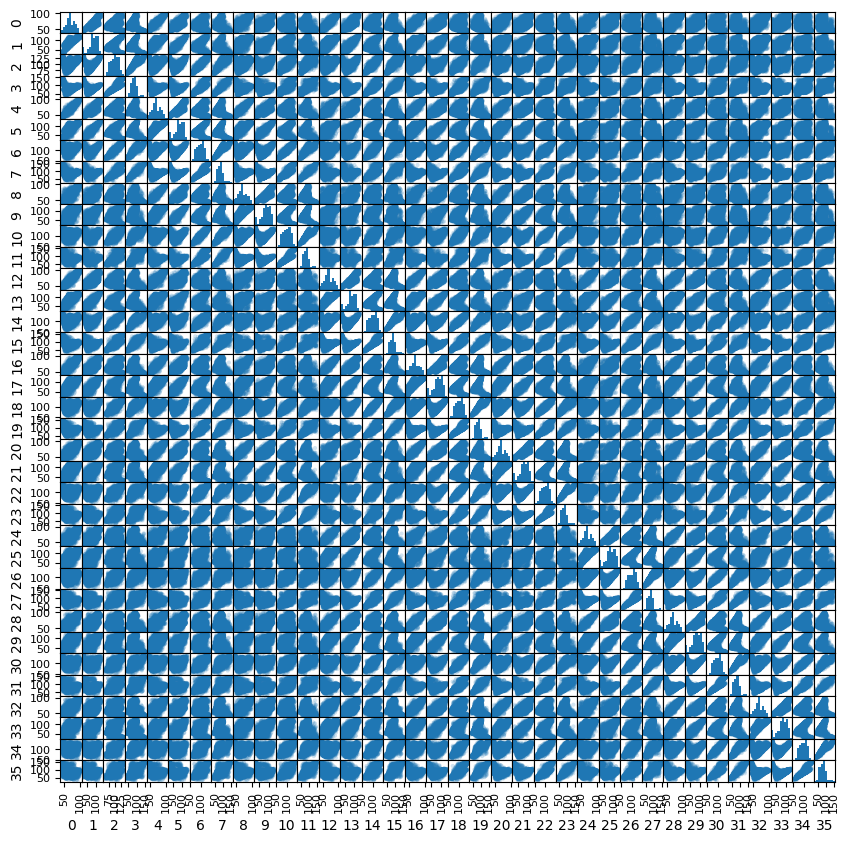

In [ ]:
pd.plotting.scatter_matrix(df,alpha=0.2,figsize=(10, 10))

Dada la gran cantidad de características presentes, la matriz de dispersión no es muy útil para poder identificar correctamente las correlaciones entre las variables. No se dibujará un histograma como en el ejemplo, que muestre la importancia de cada característica, debido a que se puede obtener una gráfica que sea poco interpretable como la de la matriz de dispersión.

**Histograma para distribución de características**

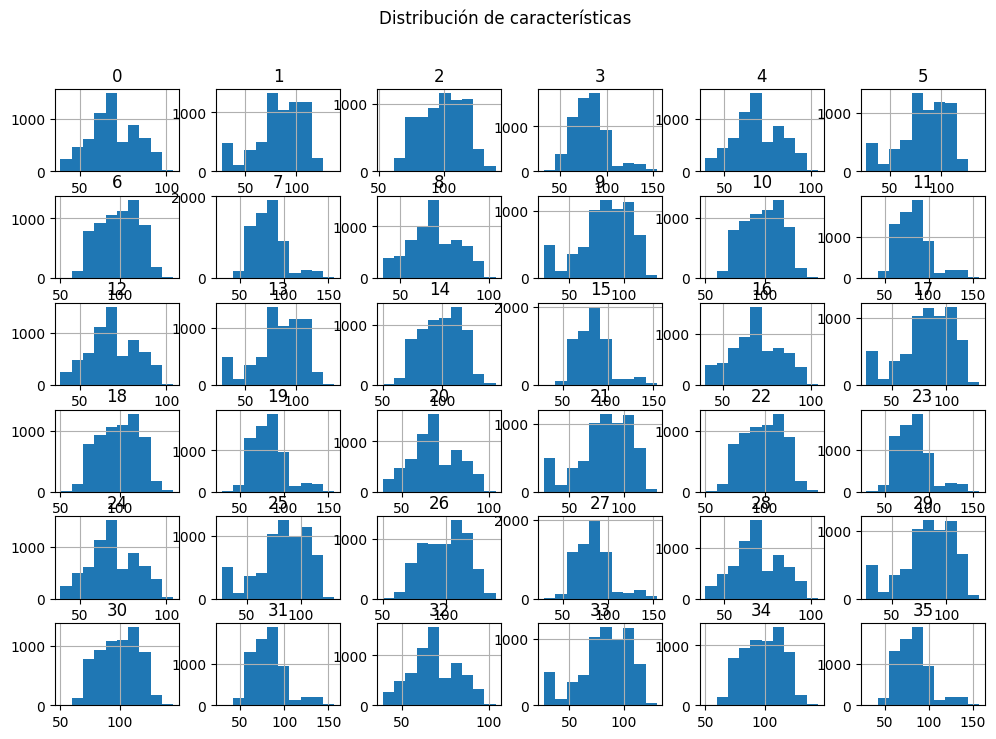

In [ ]:
df.hist(figsize=(12,8))
plt.suptitle('Distribución de características')
plt.show()

Con la gráfica presentada para la distribución de los valores de las características, se puede comprobar lo explicado en la sección de `describe()`. Hay características como la $7$ cuya distribución no está completamente centrada, decantando gran parte de los valores a la izquierda. Por el contrario, se observa que características como la $34$ parecen estar centradas y pueden no sesgar en exceso.

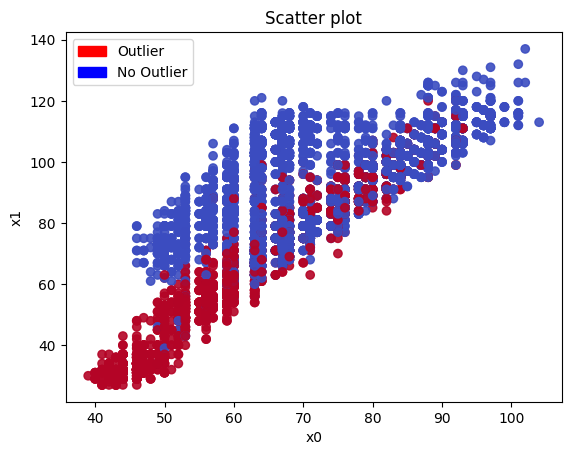

In [ ]:
import matplotlib.patches as mpatches

# Creación del scatter plot
scatter = plt.scatter(df[0], df[1], c=Y, alpha=0.9, cmap='coolwarm')

plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')

# Crear leyendas
outlier_patch = mpatches.Patch(color='red', label='Outlier')
no_outlier_patch = mpatches.Patch(color='blue', label='No Outlier')

# Añadir la leyenda al gráfico
plt.legend(handles=[outlier_patch, no_outlier_patch])

# Mostrar el gráfico
plt.show()


Si se fijan las dos primeras características, se observan que los outliers se concentran en la parte inferior izquierda, con algunos puntos ligeramente distribuidos por el resto de la nube. Se intuye que si se representa la nube para el resto de características, la distribución será similar.

**Matriz de correlación**

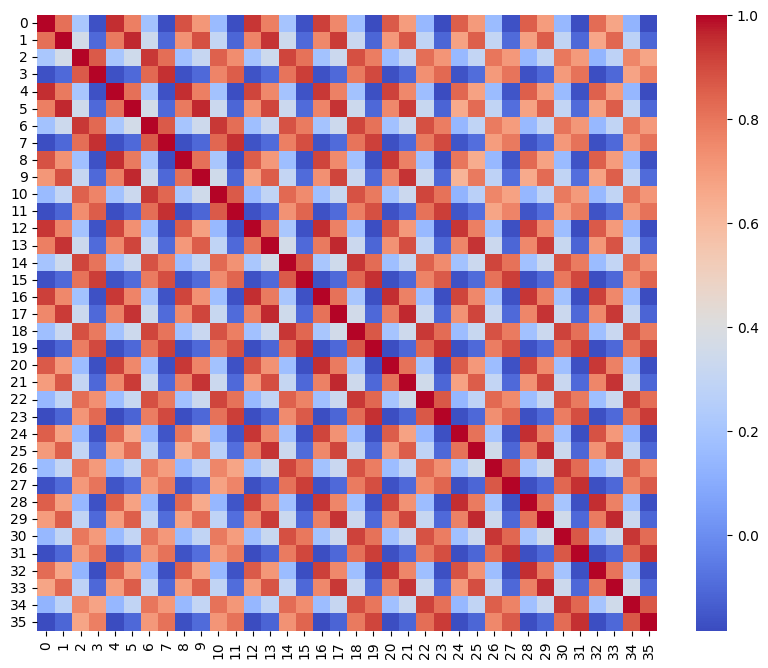

In [ ]:
import seaborn as sns
# Matriz de correlación
corr_matrix = df.corr()

# Uso de heatmap para visualizarla
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,fmt=".2f",cmap="coolwarm")
plt.show()

La matriz de correlaciones tiene una distribución curiosa: si se fija una característica, tiene correlación positiva (resp. negativa) con la siguiente o anterior, volviéndola a tener cada dos características. En general muestra que hay bastantes dependencias entre las variables.

**Boxplot**

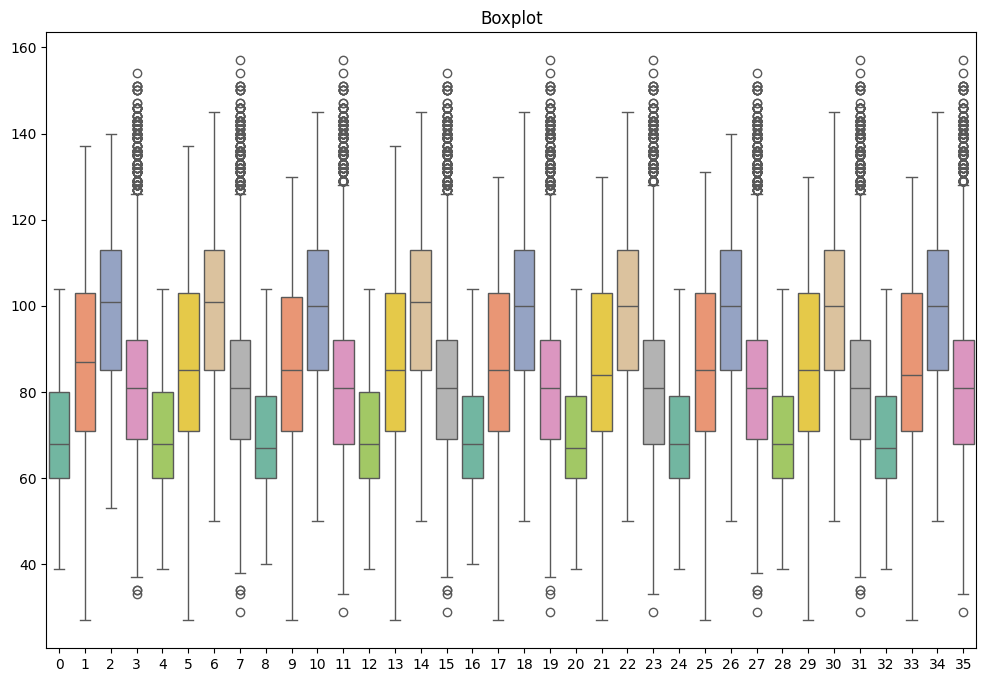

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,palette="Set2")
plt.title("Boxplot")
plt.show()

Hay bastantes outliers por encima del tercer cuartil con respecto a los que hay por debajo del primer cuartil. Es normal dado el objetivo del problema enfrentado.

**Violin Boxplot**

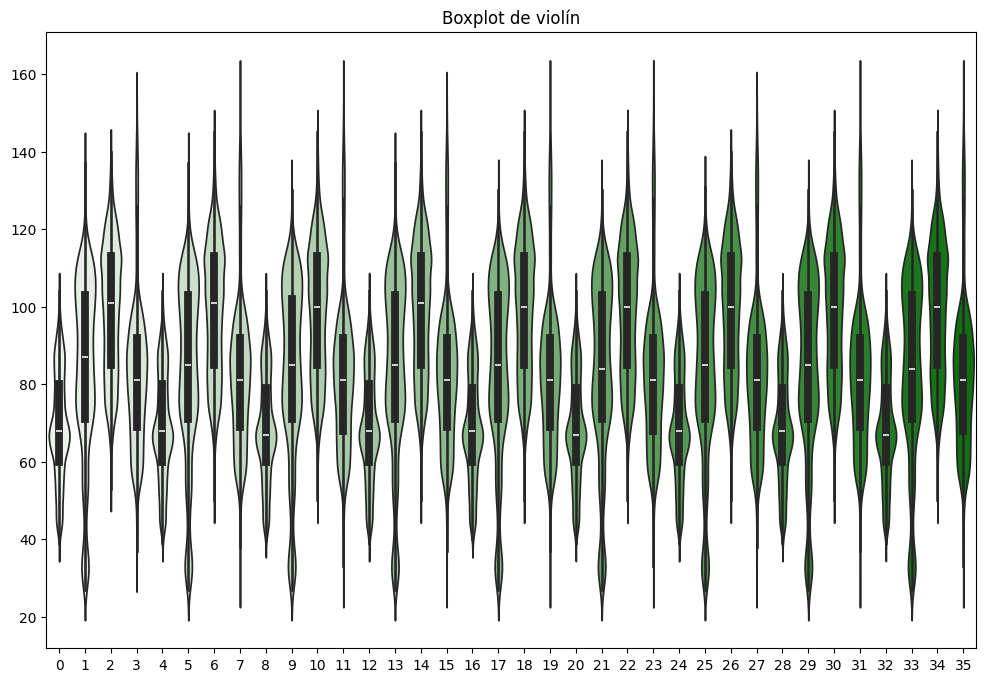

In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df,palette="light:g")
plt.title("Boxplot de violín")
plt.show()

Con este boxplot se enriquece la información dada. No solo indica la cantidad de outliers fuera de los cuartiles, sino que indica la densidad de puntos en cada caso. Por ejemplo, con el boxplot simple se vio que hay más outliers por encima, pero con este boxplot se deduce que están más distribuidos, mientras que los pocos que hay por debajo están más concentrados en torno un cierto punto.

**Nota**: Como se busca un modelo que aprenda a detectar outliers en el conjunto de datos dado, no se considera oportuno hacer la separación entre entrenamiento y test. Para validar el comportamiento del modelo, se usarán las etiquetas del conjunto (previo entrenamiento de algoritmos de aprendizaje no supervisado).

****

Configuración por defecto de un Isolation Forest y un  Angle-Based Outlier Detection (ABOD), por no ser la dimensión de las muestras muy alta.

In [ ]:
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest

isft = IForest(contamination=0.32, behaviour='new')
abod = ABOD(n_neighbors=10,contamination=0.32)

El algoritmo ABOD es un algoritmo de detección de outliers. Calcula la variación angular entre puntos de datos en el espacio de características y es eficaz para identificar outliers en conjuntos de datos multidimensionales. La idea de usar la variación angular es que los outliers tienden a estar menos alineados con el resto de puntos. Esta operación se puede llevar a cabo frente a tres escenarios:

- Datos multidimensionales.

- Detección de outliers locales, es decir, detecta outliers en función a un vecindario.

- No hay muchos outliers globales, pues es menor sensible a este tipo de datos que pueden influir en la media y varianza.

Los hiperparámetros principales son:

- `method`: Indica el método específico para hacer el cálculo del ángulo. Ofrece opciones como `fast` (por defecto), `default`, `l2` y `haversine`. El hiperparámetro por defecto es `fast` pues usa una aproximación eficiente para el cálculo.

- `n_neighbors`: Tal y como se indicó, es un algoritmo de detección de outliers locales. Este hiperparámetro indica el número de muestras más cercanas al punto candidato para calcular el ángulo. Por defecto está a $10$.

- `contamination`: Especifica  la proporicón de outliers en el conjunto, y está en el intervalo $[0,1]$, donde $0$ indica que no hay outliers y $1$ que todos son outliers. Por defecto está a $0.1$.

- `n_jobs`: Por defecto a $1$, indica el número de CPUs disponibles para ejecución en paralelo. Si vale $-1$, se usan todas las CPUs.

La justificación de usar este algoritmo y no otro es la visualización del $scatter plot$ anterior, por considerarse que no hay outliers globales por estar, en general, los puntos muy cercanos, donde la diferencia es la forma de clasificar al punto (algunos se encuentran en un clúster de color distinto, esto es, clasificación distinta).

Entrenamiento del modelo y obtención de las puntuaciones asociadas a anomalía

In [ ]:
# Entrenamiento
isft.fit(df)
abod.fit(X.astype('float32'))    # Se cambia el tipo de dato para que la biblioteca Numba pueda operar bien

# Puntuaciones de anomalía
isft_pred = isft.decision_function(df)
abod_pred = abod.decision_function(df)

Visualización de puntuaciones de anomalía para `IForest` y para `ABOD`.

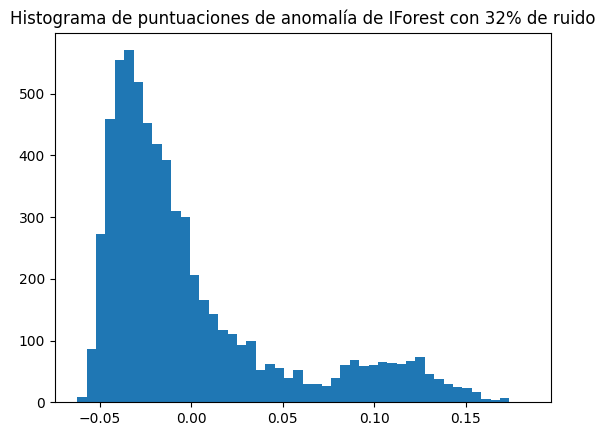

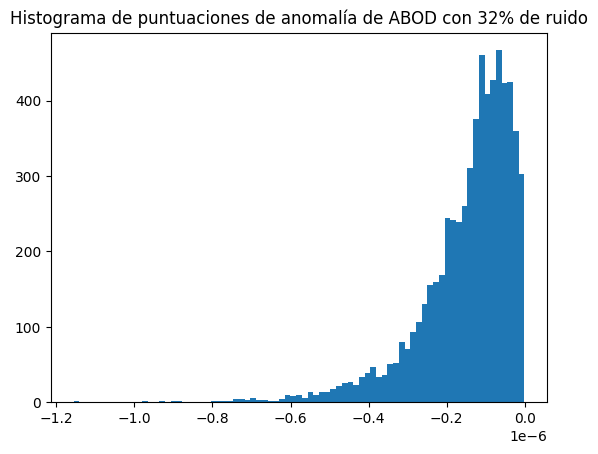

In [ ]:
plt.hist(isft_pred,bins='auto')
plt.title("Histograma de puntuaciones de anomalía de IForest con 32% de ruido")
plt.show()

plt.hist(abod_pred,bins='auto')
plt.title("Histograma de puntuaciones de anomalía de ABOD con 32% de ruido")
plt.show()

Se analiza el histograma para cada algoritmo:

- `IForest`: Para este histograma, la separación entre lo que podría ser considerado outlier no es completamente clara, más allá de que la mayoría de muestras parecen estar concentradas en $[0.15,0.2]$. Habiendo considerado un $32$% de outliers, se podría asignar un threshold de, aproximadamente, $0.17$.

- `ABOD`: La distribución de las muestras tiende a estar concentrada a la derecha. Por ello, podría considerarse que valores menores a $-0.5 \cdot 10^{-6}$ son outliers.

A continuación se calcula el threshold aportado por cada algoritmo, para comprobar si los thresholds calculados visualmente son correctos. Dada la salida para ABOD, se facilita la interpretación dando el valor en la misma escala según la notación en base $10$.

In [ ]:
threshold_isft = isft.threshold_ #np.percentile(isft_pred,95)
threshold_abod = abod.threshold_ #np.percentile(abod_pred,95)

print("El umbral para IForest es ",threshold_isft)
print("El umbral para ABOD es ",threshold_abod*100)

El umbral para IForest es  1.10565857583064e-17
El umbral para ABOD es  -7.639604916067054e-06


Se han obtenido dos situaciones: mientras que la predicción visual del threshold para IForest es correcta, para ABOD ha resultado ser una centésima menor con respecto a $-0.5 \cdot 10^{-6}$. Por ello, aunque para IForest se use solo un threshold, en ABOD se analizarán los resultados para los dos thresholds.

Con el umbral, vemos cuáles son los outliers

In [ ]:
outliers_isft2 = isft_pred > threshold_isft
outliers_isft1 = isft_pred > 0.17
print("Cantidad de outliers con IForest 1 encontrados: ",np.sum(outliers_isft1))
print("Cantidad de outliers con IForest 2 encontrados: ",np.sum(outliers_isft2))

outliers_abod1 = abod_pred > -0.5*10**(-6)
outliers_abod2 = abod_pred > threshold_abod

if (abs(0.17 - threshold_isft) < 10**(-5)):
  print("La diferencia entre el threshold real de IForest y el predicho es menor a 10^(-5)")
else:
  print("La diferencia entre el threshold reali de IForest y el predicho es grande")

if (abs(-0.5*10**(-6)-threshold_abod) < 10**(-5)):
  print("La diferencia entre el threshold real de ABOD y el predicho es menor a 10^(-5)")
else:
  print("La direncia entre el treshold real de ABOD y el predicho es grande")

print("Cantidad de outliers con ABOD 1 encontrados: ",np.sum(outliers_abod1))
print("Cantidad de outliers con ABOD 2 encontrados: ",np.sum(outliers_abod2))

Cantidad de outliers con IForest 1 encontrados:  4
Cantidad de outliers con IForest 2 encontrados:  2059
La diferencia entre el threshold reali de IForest y el predicho es grande
La diferencia entre el threshold real de ABOD y el predicho es menor a 10^(-5)
Cantidad de outliers con ABOD 1 encontrados:  6315
Cantidad de outliers con ABOD 2 encontrados:  2049


La diferencia entre el threshold predicho visualmente y el dado por el algoritmo ABOD es bastante pequeño, tal y como se indica. Sin embargo, se puede comprobar que detecta muchos más outliers el threshold predicho con el histograma. Dado que con el threshold predicho por el algoritmo, la cantidad de outliers es similar a la de IForest, se da por errónea la predicción hecha en el histograma, ya que ciertamente supera al $32$% de ruido indicado en la declaración del algoritmo. Mismos comentarios en IForest, pero prediciendo muchos menos outliers.

A continuación se verifica si los resultados dados con respecto a los outliers es cierto.

In [ ]:
print("Porcentaje de outliers de IForest visual: ",np.sum(outliers_isft1)*100/len(X))
print("Porcentaje de outliers de IForest: ",np.sum(outliers_isft2)*100/len(X))
print("Porcentaje de outliers de ABOD con threshold visual: ",np.sum(outliers_abod1)*100/len(X))
print("Porcentaje de outliers de ABOD con threshold del modelo: ",np.sum(outliers_abod2)*100/len(X))

Porcentaje de outliers de IForest visual:  0.06216006216006216
Porcentaje de outliers de IForest:  31.996891996891996
Porcentaje de outliers de ABOD con threshold visual:  98.13519813519814
Porcentaje de outliers de ABOD con threshold del modelo:  31.84149184149184


Se observa que los resultados arrojados para los thresholds predichos por los modelos se ajusten bastante mejor al $32$% de outliers que se ha supuesto en el conjunto de datos. Véase que el threshold predicho para ABOD de forma visual apenas se distanciaba del threshold predicho por ABOD. Sin embargo, considera que básicamente todos los datos del conjunto son outliers. Por el contrario, con la interpretación visual del threshold para IForest el algoritmo considera que casi ningún dato es un outlier.

Tanto con el threshold real de ABOD como el de IForest se detecta casi la misma cantidad de outliers en el conjunto de datos.

Se expone en un `scatter plot` qué valores han sido considerados como outliers según los algoritmos usados.

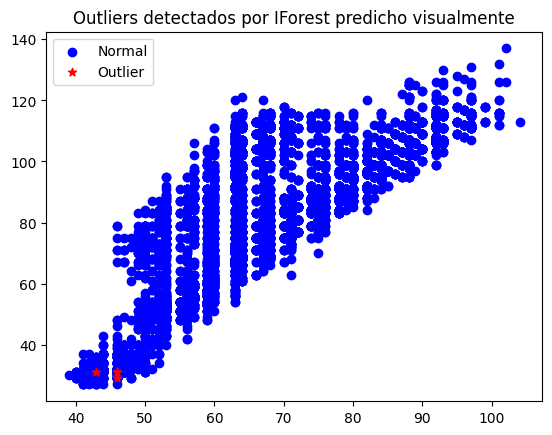

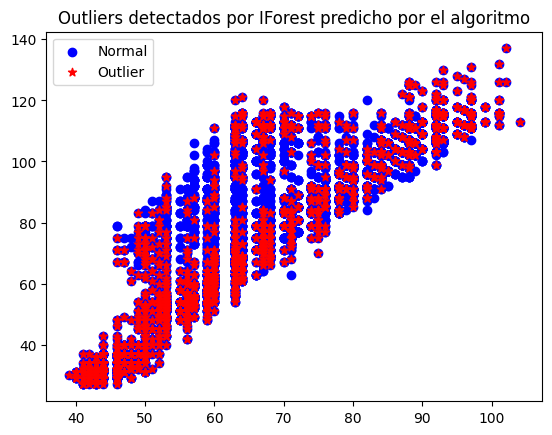

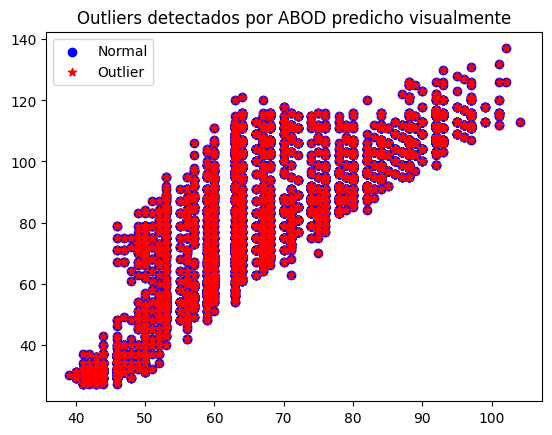

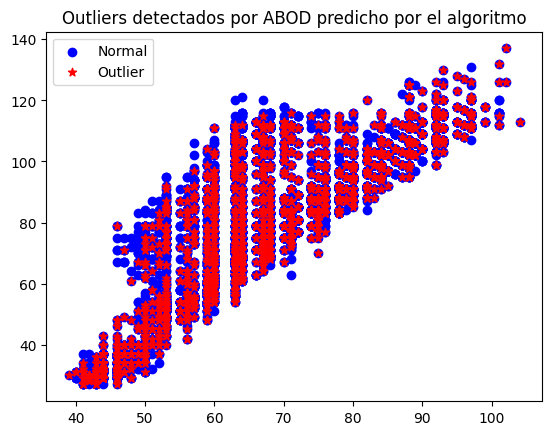

In [ ]:
plt.scatter(df[0],df[1],c='blue',label='Normal')
plt.scatter(df[outliers_isft1][0],df[outliers_isft1][1],c='red',label='Outlier',marker='*')
plt.title('Outliers detectados por IForest predicho visualmente')
plt.legend()
plt.show()

plt.scatter(df[0],df[1],c='blue',label='Normal')
plt.scatter(df[outliers_isft2][0],df[outliers_isft2][1],c='red',label='Outlier',marker='*')
plt.title('Outliers detectados por IForest predicho por el algoritmo')
plt.legend()
plt.show()

plt.scatter(df[0],df[1],c='blue',label='Normal')
plt.scatter(df[outliers_abod1][0],df[outliers_abod1][1],c='red',label='Outlier',marker='*')
plt.title('Outliers detectados por ABOD predicho visualmente')
plt.legend()
plt.show()

plt.scatter(df[0],df[1],c='blue',label='Normal')
plt.scatter(df[outliers_abod2][0],df[outliers_abod2][1],c='red',label='Outlier',marker='*')
plt.title('Outliers detectados por ABOD predicho por el algoritmo')
plt.legend()
plt.show()

Visualmente se puede ver la distribución de los puntos considerados como outliers por los algoritmos. Mientras que IForest detecta la mayoría de outliers a la cola de la nube de puntos (zona inferior izquierda), ABOD con el threshold predicho por el algoritmo muestra una distribución de outliers más uniforme con respecto a la distribución de todos los puntos. Esto se debe a la propiedad de búsqueda de outliers locales.

Tal y como se esperaba de la predicción visual del threshold en ABOD, prácticamente todos los puntos han sido marcados como outliers. Por lo tanto, la fiabilidad en este modelo es prácticamente nula, aunque ello se sustentará con resultados en las predicciones.

Del mismo modo, la predicción visual del threshold en IForest ha sido bastante mala: casi ningún punto se considera outlier.

En resumen, ambos algoritmos detectan casi la misma cantidad de outliers (cercano al $32$% tal y como se expone en el enunciado). Sin embargo, la distribución de estos es más dispersa que la que aparece en la gráfica scatter mostrada al inicio del ejercicio.

Por último, vemos la tasa de acierto con Y para cada algoritmo.

In [ ]:
accuracy_isft1 = np.mean(outliers_isft1 == (Y==1))
accuracy_isft2 = np.mean(outliers_isft2 == (Y==1))
accuracy_abod1 = np.mean(outliers_abod1 == (Y==1))
accuracy_abod2 = np.mean(outliers_abod2 == (Y==1))

print("Precisión IForest predicción visual: ",accuracy_isft1)
print("Precisión IForest predicción algoritmo: ",accuracy_isft2)
print("Precicisón ABOD predicción visual: ",accuracy_abod1)
print("Precisión ABOD predicción algoritmo: ",accuracy_abod2)

Precisión IForest predicción visual:  0.6833770252884472
Precisión IForest predicción algoritmo:  0.566109315013744
Precicisón ABOD predicción visual:  0.32324246589980854
Precisión ABOD predicción algoritmo:  0.5666799608058349


En la fase de validación con las etiquetas disponibles se puede comprobar lo comentado previamente: la tasa de aciertos tanto de IForest como de ABOD con el threshold dado por el algoritmo es prácticamente idéntica. Pasando a una visión global de dicha tasa, sendos algoritmos no parecen predecir perfectamente los outliers en el conjunto de datos estudiado, aunque los resultados son satisfactorios.

Por otro lado, tal y como se esperaba, ABOD con la predicción visual del threshold ha dado resultados bastante malos al evaluar los aciertos en el conjunto de test. Como conclusión, se podría usar un histograma para intuir el posible valor del threshold en este tipo de algoritmos, pero es mejor usar el dado por el algoritmo para evitar que pequeñas variaciones respecto al threshold real concluyan en un modelo mucho más malo de lo esperado. Los mismos comentarios respecto IForest, aunque en este caso la precisión es mayor, lo cual era lógico dado que casi ningún dato es considerado outlier, y así eran la mayoría de los datos en el conjunto.

Por último, se muestran las matrices de confusión por algoritmo.

In [ ]:
Y_cm = Y.ravel()
cm_isft1 = confusion_matrix_threshold(Y_cm,isft_pred,0.17)
cm_isft2 = confusion_matrix_threshold(Y_cm,isft_pred,threshold_isft)
cm_abod1 = confusion_matrix_threshold(Y_cm,abod_pred,-0.5*10**(-6))
cm_abod2 = confusion_matrix_threshold(Y_cm,abod_pred,threshold_abod)

print("Matriz de confusión de IForest con predicción visual de threshold")
print(cm_isft1)
print("Matriz de confusión de IForest con predicción del algoritmo del threshold")
print(cm_isft2)
print("Matriz de confusión de ABOD con predicción visual de threshold")
print(cm_abod1)
print("Matriz de confusión de ABOD con predicción del algoritmo del threshold")
print(cm_abod2)

Matriz de confusión de IForest con predicción visual de threshold
Pred       0  1
Actual         
0       4399  0
1       2032  4
Matriz de confusión de IForest con predicción del algoritmo del threshold
Pred       0     1
Actual            
0       3550   849
1        826  1210
Matriz de confusión de ABOD con predicción visual de threshold
Pred     0     1
Actual          
0       89  4310
1       31  2005
Matriz de confusión de ABOD con predicción del algoritmo del threshold
Pred       0     1
Actual            
0       3178  1221
1       1208   828


Observando las matrices de confusión se entiende el valor de la tasa de acierto en test antes mostrada:

- Matriz de confusión de IForest con predicción visual del algoritmo: Gran parte de los datos no han sido considerados outliers cuando por hipótesis debería haber considerado bastantes más.

- Matriz de confusión de IForest con predicción del algoritmo del threshold: Muchos datos que no son outliers han sido clasificados como no outliers. Sin embargo, $826$ eran outliers y han sido clasificados como no outliers, la cual es una cifra considerable. Ello demuestra porqué en test la precisión no era tan alta como se podría preveer.

- Matriz de confusión de ABOD con predicción visual del threshold: Muchos valores que no eran outliers han sido predichos como outliers. Podría deberse a que como el threshold manual era algo mayor del real, en realidad se ha marcado como threshold una posición que separaba bastantes muestras, como si se hubiese colocado una zona crucial de la distribución de los datos.

- Matriz de confusión de ABOD con predicción del algoritmo del threshold: Los resultados son similares a los de la matriz de confusión de IForest en cuanto a las proporciones, aunque tiene ligeramente peor tasa de acierto (menos puntos que no son outliers o sí lo son han sido clasificados correctamente, mientras que la cantidad de falsos outliers o falsos puntos no outliers ha crecido).